# NEO

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
import numpy as np
from sklearn.model_selection import train_test_split

# Append the directory
sys.path.append('/Volumes/Maestria/GitHub/NEO/NEO/API_test')

import dataprocess as dp


C:\Users\LIR3060\AppData\Local\Temp\ipykernel_24744\3386924969.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 5 features

#### SMOTE

In [2]:
#df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = pd.read_csv('D:\\GitHub\\NEO\\NEO\\API_test\\CSV\\nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [7]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitsmote()

X_train

array([[-1.45404797,  1.00029444,  1.00029444,  2.94828885,  0.99407991],
       [-0.0623231 , -0.25558438, -0.25558438, -0.46849131, -1.16590105],
       [ 1.35001992, -0.45106847, -0.45106847, -0.82729836,  0.3156564 ],
       ...,
       [-1.17003103,  0.52987977,  0.52987977,  1.35582123,  1.07960313],
       [-0.91446618,  0.23592784,  0.23592784,  1.46790682, -0.76595789],
       [-0.78072583,  0.11702279,  0.11702279,  0.07343211,  0.8156806 ]])

##### Models

In [11]:
print(len(X_test), len(y_test))

67635 67635


In [ ]:
# subsamplenum = 1

# X_train, _, y_train, _, = train_test_split(X_train, y_train, train_size=subsamplenum, stratify=y_train, random_state=42)

# print(len(X_train), len(y_train))

c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

Best parameters: {'C': 0.001, 'fit_intercept': True, 'n_jobs': 8, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'warm_start': True}
Best Score: 0.8008168047852571
Best Estimator: LogisticRegression(C=0.001, n_jobs=8, penalty='l1', random_state=42,
                   solver='liblinear', warm_start=True) 
The accuracy score is 0.7326827825829821
 The recall score is 0.3076395334759272
 The f1 score is 0.45748064574206326
 The ROC AUC score is 0.80077264510652

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.71      0.82     59088
           1       0.31      0.89      0.46      8547

    accuracy                           0.73     67635
   macro avg       0.64      0.80      0.64     67635
weighted avg       0.89      0.73      0.78     67635


Cross validation score: [0.20389954 0.20890113 0.20761275 0.20371312 0.20769752 0.19320109
 0.20252628 0.20083079 0.19209902 0.19871143]

Mean cross validation score: 0.2

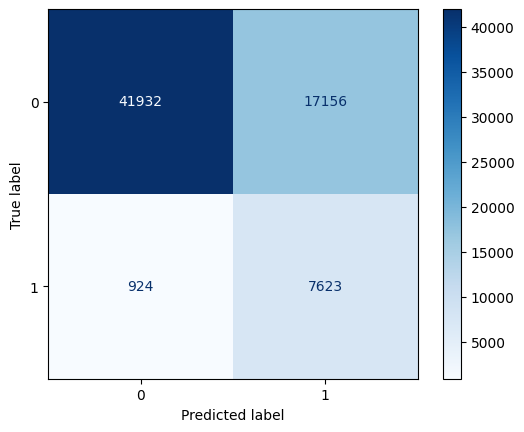

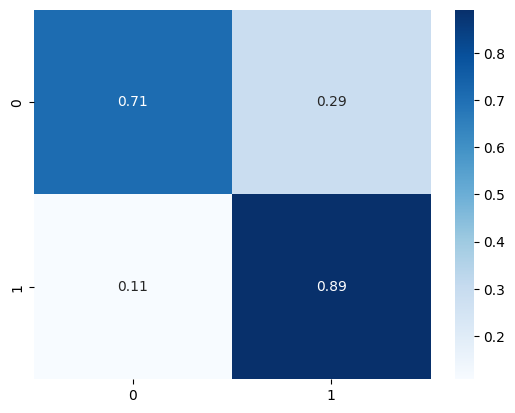

In [10]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

In [9]:
svm = dp.supportvm(X_train, X_test, y_train, y_test)

svm.fit()

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l2'}
Best Score: 0.815609911009961
Best Estimator: SGDClassifier(eta0=0.01, learning_rate='constant') 
The accuracy score is 0.6989428550306794
 The recall score is 0.2899704909873076
 The f1 score is 0.44478377051862356
 The ROC AUC score is 0.8081327728210345

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     59088
           1       0.29      0.95      0.44      8547

    accuracy                           0.70     67635
   macro avg       0.64      0.81      0.62     67635
weighted avg       0.90      0.70      0.75     67635


Cross validation score: [0.29392815 0.27570202 0.22778908 0.26754832 0.20905392 0.23465582
 0.22931502 0.26246185 0.22728043 0.2543235 ]

Mean cross validation score: 0.24820581201150277



Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}
Best Score: 0.9439749921055662
Best Estimator: RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=42, warm_start=True) 


c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


The accuracy score is 0.9101352849855844
 The recall score is 0.631511665068712
 The f1 score is 0.6610906657745065
 The ROC AUC score is 0.817518444270069

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     59088
           1       0.63      0.69      0.66      8547

    accuracy                           0.91     67635
   macro avg       0.79      0.82      0.80     67635
weighted avg       0.91      0.91      0.91     67635




c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
c:\Users\LIR3060\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate

Cross validation score: [0.7960771  0.79764541 0.79348932 0.79047982 0.7905646 ]

Mean cross validation score: 0.7936512510028401



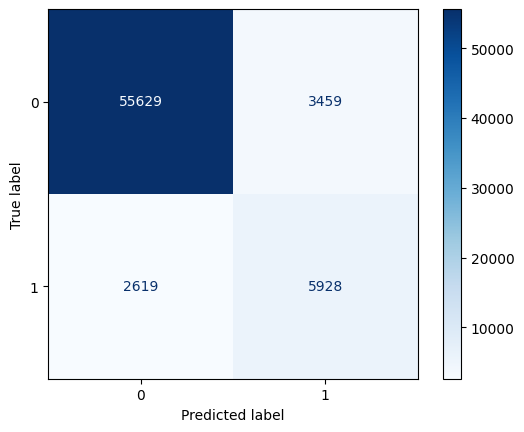

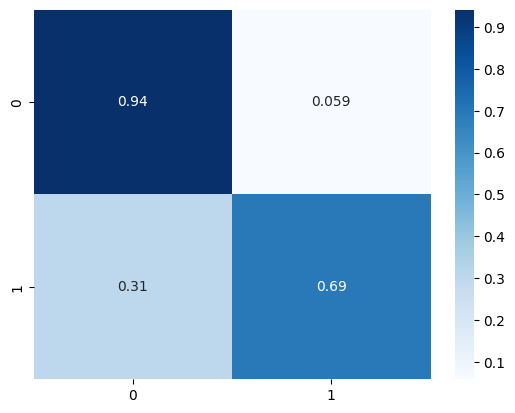

In [4]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.7245656834479189
 The recall score is 0.31288047512991835
 The f1 score is 0.47504720038323894
 The ROC AUC score is 0.8364577431646887

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.48      8547

    accuracy                           0.72     67635
   macro avg       0.65      0.84      0.64     67635
weighted avg       0.91      0.72      0.77     67635


Cross validation score: [0.35529676 0.35427948 0.35554425 0.34884707 0.35868091]

Mean cross validation score: 0.3545296931376907



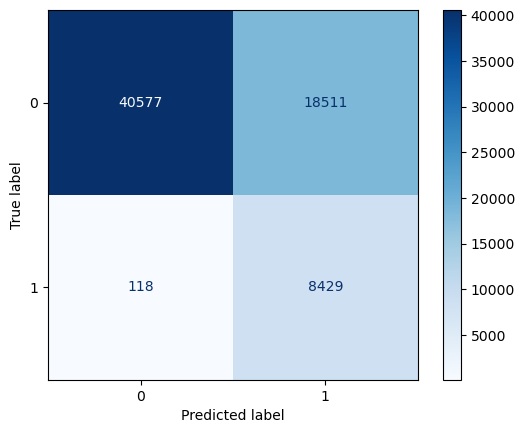

In [7]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.7386412360464256
 The recall score is 0.3231716764797025
 The f1 score is 0.4855804208014434
 The ROC AUC score is 0.8402102474756821

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82     59088
           1       0.32      0.98      0.49      8547

    accuracy                           0.74     67635
   macro avg       0.66      0.84      0.66     67635
weighted avg       0.91      0.74      0.78     67635


Cross validation score: [0.37979633 0.38573048 0.38246016 0.37470329 0.38347745]

Mean cross validation score: 0.3812335420059848



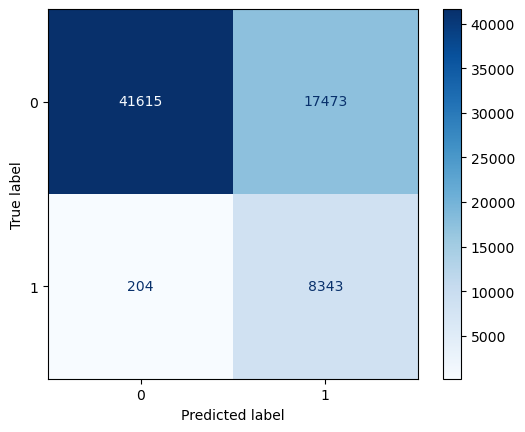

In [8]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

In [9]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9084793376210542
 The recall score is 0.6201447650117239
 The f1 score is 0.66278056221399
 The ROC AUC score is 0.8243266113392026

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     59088
           1       0.62      0.71      0.66      8547

    accuracy                           0.91     67635
   macro avg       0.79      0.82      0.80     67635
weighted avg       0.91      0.91      0.91     67635




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.79578039 0.7941697  0.79310783 0.7905646  0.79476094]

Mean cross validation score: 0.793676691347841



In [10]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
The accuracy score is 0.7242551933170696
 The recall score is 0.31277565694377524
 The f1 score is 0.4750619229903175
 The ROC AUC score is 0.8367804231431362

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.48      8547

    accuracy                           0.72     67635
   macro avg       0.66      0.84      0.64     67635
weighted avg       0.91      0.72      0.77     67635


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
Cross validation score: [0.35754326 0.35673791 0.35757884 0.35011868 0.35846897]

Mean cross validation score: 0.35

The accuracy score is 0.7307311303319287
 The recall score is 0.3173036936221693
 The f1 score is 0.47962740728041603
 The ROC AUC score is 0.8381850066963795

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82     59088
           1       0.32      0.98      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.78     67635


Cross validation score: [0.36067988 0.35889964 0.36046117 0.35503561 0.35986775]

Mean cross validation score: 0.3589888106284101



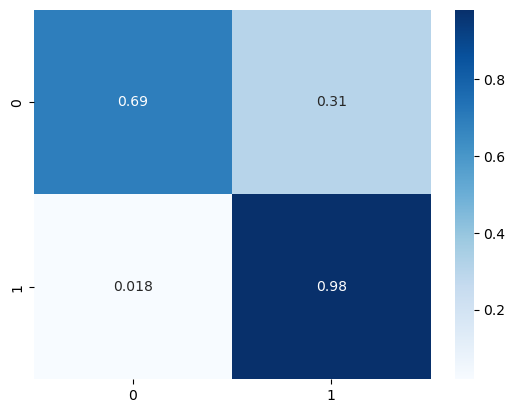

In [11]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### ADASYN

In [4]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [5]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitadasyn()

X_train

array([[-1.45404797,  1.00029444,  1.00029444,  2.94828885,  0.99407991],
       [-0.0623231 , -0.25558438, -0.25558438, -0.46849131, -1.16590105],
       [ 1.35001992, -0.45106847, -0.45106847, -0.82729836,  0.3156564 ],
       ...,
       [-0.52015275, -0.06039604, -0.06039604, -1.09064189,  1.23799834],
       [-0.51666325, -0.06239603, -0.06239603, -1.07397814,  1.26728867],
       [-0.52359604, -0.05852162, -0.05852162, -1.03655663,  1.22766022]])

##### Models

The accuracy score is 0.5898277519036003
 The recall score is 0.2351610143767764
 The f1 score is 0.3805653552449426
 The ROC AUC score is 0.7639974904140217

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.53      0.69     59088
           1       0.24      1.00      0.38      8547

    accuracy                           0.59     67635
   macro avg       0.62      0.76      0.54     67635
weighted avg       0.90      0.59      0.65     67635


Cross validation score: [0.05212165 0.04507285 0.04472949 0.04949361 0.04606001]

Mean cross validation score: 0.047495526402899224



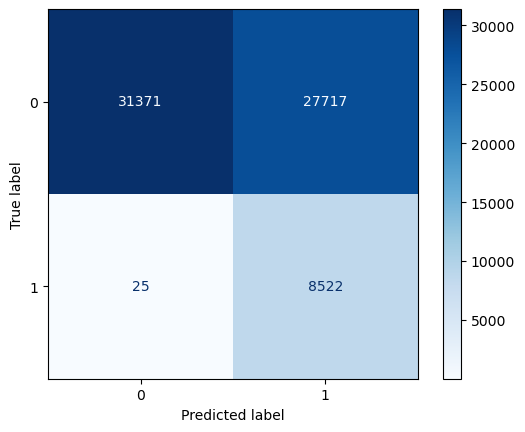

In [6]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

In [7]:
# svm = dp.supportvm(X_train, X_test, y_train, y_test)

# svm.fit()

In [8]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9104162046277815
 The recall score is 0.6295563424286607
 The f1 score is 0.6661524050911896
 The ROC AUC score is 0.8235336795196665

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     59088
           1       0.63      0.71      0.67      8547

    accuracy                           0.91     67635
   macro avg       0.79      0.82      0.81     67635
weighted avg       0.92      0.91      0.91     67635


Cross validation score: [0.79480161 0.79617291 0.78844731 0.79046455 0.79231011]

Mean cross validation score: 0.792439295205631



The accuracy score is 0.7235455015894138
 The recall score is 0.312372925215334
 The f1 score is 0.4747457722343952
 The ROC AUC score is 0.8369246684386813

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.47      8547

    accuracy                           0.72     67635
   macro avg       0.65      0.84      0.64     67635
weighted avg       0.91      0.72      0.77     67635


Cross validation score: [0.3419574  0.33727223 0.33808771 0.33855983 0.34143547]

Mean cross validation score: 0.3394625318561172



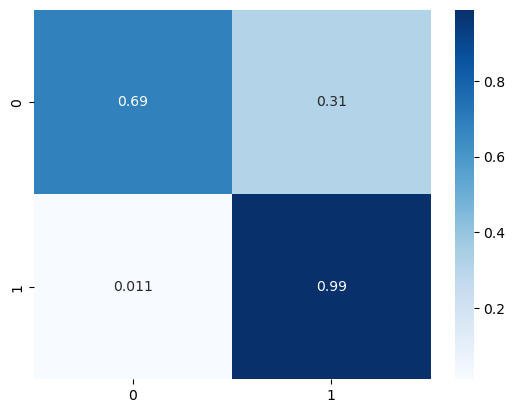

In [9]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.7345013676351002
 The recall score is 0.3200627199020958
 The f1 score is 0.4824326271797089
 The ROC AUC score is 0.8391418907513546

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82     59088
           1       0.32      0.98      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.78     67635


Cross validation score: [0.36474768 0.36040612 0.35980524 0.36001984 0.36182248]

Mean cross validation score: 0.3613602696619925



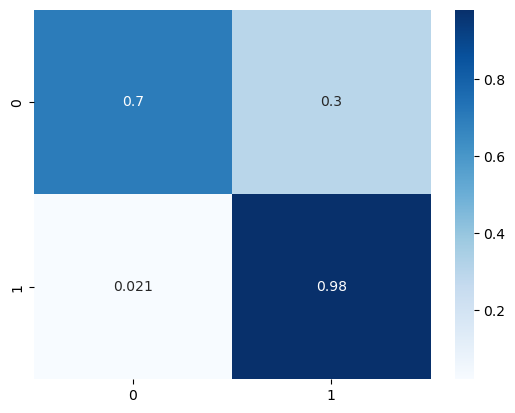

In [10]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

In [11]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

# dump(ada, '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_5.sav' )

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.905921490352628
 The recall score is 0.6065573770491803
 The f1 score is 0.6614525139664804
 The ROC AUC score is 0.8295177608743814

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     59088
           1       0.61      0.73      0.66      8547

    accuracy                           0.91     67635
   macro avg       0.78      0.83      0.80     67635
weighted avg       0.91      0.91      0.91     67635




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.79789182 0.79604415 0.78183762 0.78750307 0.78866191]

Mean cross validation score: 0.7903877125965637



[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
The accuracy score is 0.7249057440674207
 The recall score is 0.31328655752310947
 The f1 score is 0.4756509976327359
 The ROC AUC score is 0.8371527491653404

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.48      8547

    accuracy                           0.72     67635
   macro avg       0.66      0.84      0.64     67635
weighted avg       0.91      0.72      0.77     67635


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
Cross validation score: [0.34260119 0.33894611 0.34036247 0.34023371 0.34182175]

Mean cross validation score: 0.34

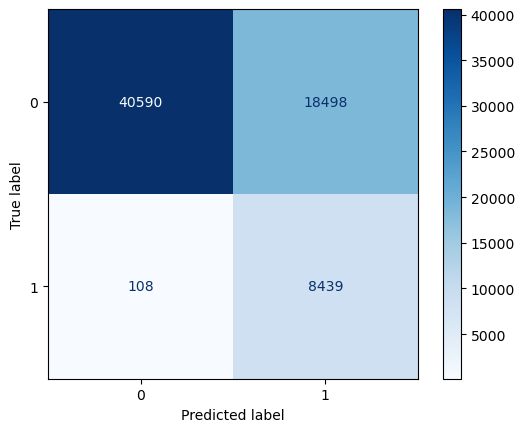

In [12]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.7274340208471946
 The recall score is 0.31510845175766644
 The f1 score is 0.47756964321138096
 The ROC AUC score is 0.8379492481340574

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82     59088
           1       0.32      0.99      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.77     67635


Cross validation score: [0.34380294 0.33881735 0.33928947 0.34014787 0.34302351]

Mean cross validation score: 0.34101623210024284



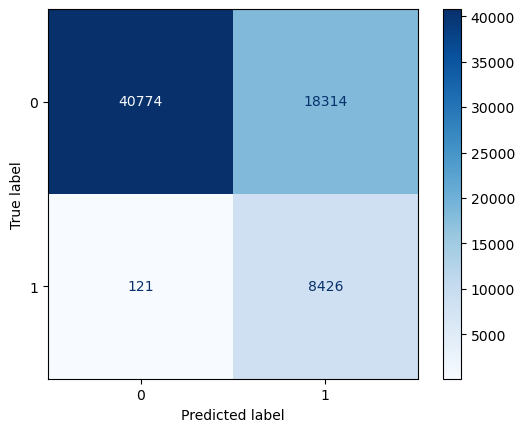

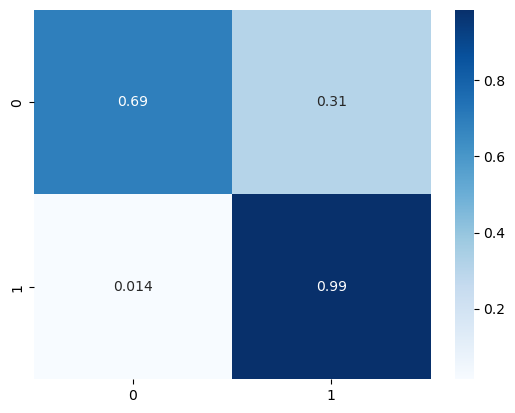

In [13]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### Random Under Sample

In [2]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [3]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitrus()

X_train.shape

(69230, 5)

##### Models

The accuracy score is 0.6020995046943151
 The recall score is 0.24055604215522844
 The f1 score is 0.38752844788347746
 The ROC AUC score is 0.7706206082780006

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.55      0.71     59088
           1       0.24      1.00      0.39      8547

    accuracy                           0.60     67635
   macro avg       0.62      0.77      0.55     67635
weighted avg       0.90      0.60      0.67     67635


Cross validation score: [0.07987867 0.06947855 0.10443449 0.09807887 0.07814531]

Mean cross validation score: 0.08600317781308679



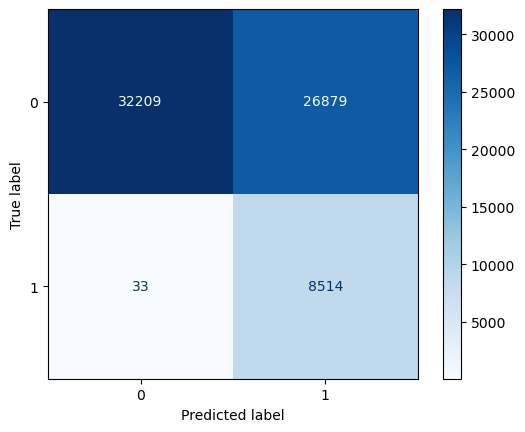

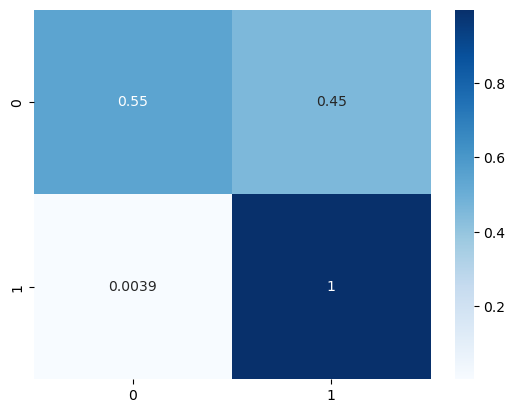

In [4]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

In [5]:
# svm = dp.supportvm(X_train, X_test, y_train, y_test)

# svm.fit()

The accuracy score is 0.8251053448658239
 The recall score is 0.41462907085631046
 The f1 score is 0.57402139075948
 The ROC AUC score is 0.8710315480217998

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     59088
           1       0.41      0.93      0.57      8547

    accuracy                           0.83     67635
   macro avg       0.70      0.87      0.73     67635
weighted avg       0.92      0.83      0.85     67635


Cross validation score: [0.47017189 0.45399393 0.4733497  0.47999422 0.4589051 ]

Mean cross validation score: 0.46728296981077566



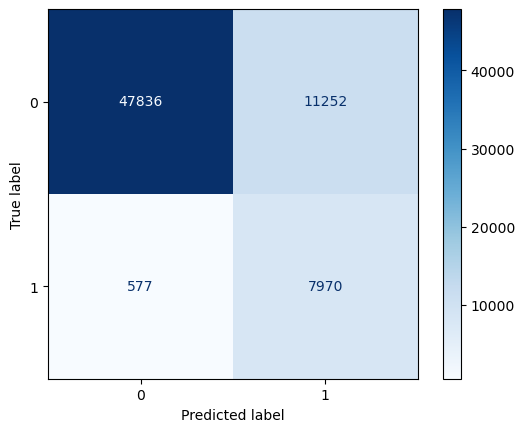

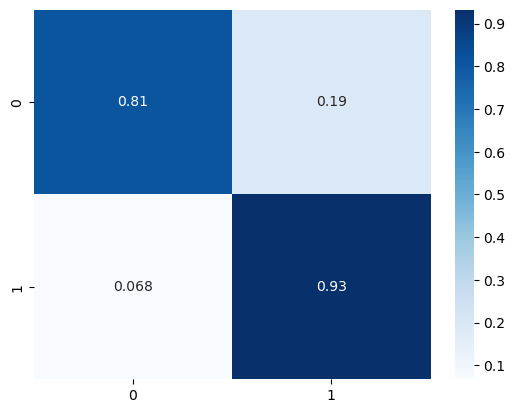

In [6]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.7245361129592667
 The recall score is 0.3130238077579174
 The f1 score is 0.47537521471010613
 The ROC AUC score is 0.837041276495988

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.48      8547

    accuracy                           0.72     67635
   macro avg       0.66      0.84      0.64     67635
weighted avg       0.91      0.72      0.77     67635


Cross validation score: [0.36039289 0.34392604 0.35808176 0.36183735 0.35259281]

Mean cross validation score: 0.3553661707352304



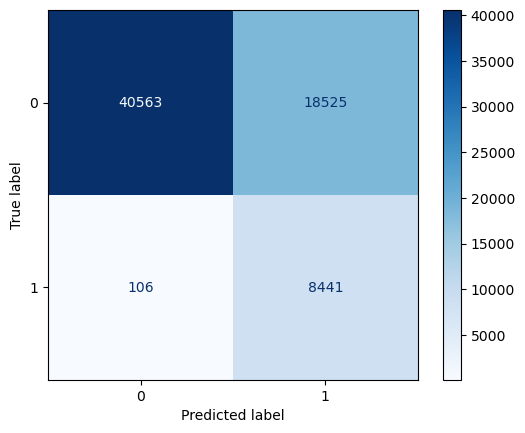

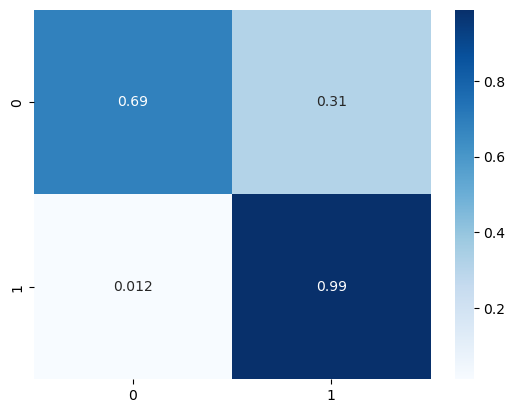

In [7]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.7335255415095735
 The recall score is 0.31964217738865625
 The f1 score is 0.4823505758681104
 The ROC AUC score is 0.8399844686146473

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82     59088
           1       0.32      0.98      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.78     67635


Cross validation score: [0.38234869 0.360104   0.37772642 0.3710819  0.37657085]

Mean cross validation score: 0.3735663729596995



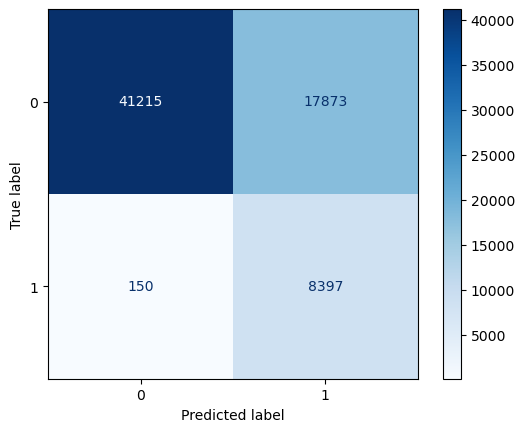

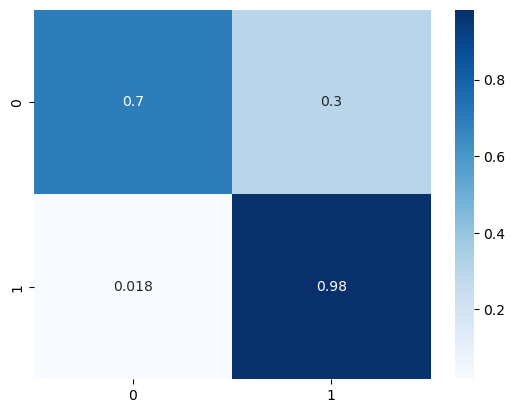

In [8]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.8182449914984845
 The recall score is 0.40568982880161125
 The f1 score is 0.5672545499348752
 The ROC AUC score is 0.8714585158787027

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.80      0.88     59088
           1       0.41      0.94      0.57      8547

    accuracy                           0.82     67635
   macro avg       0.70      0.87      0.73     67635
weighted avg       0.92      0.82      0.84     67635




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.47046078 0.45023834 0.46814965 0.47941644 0.46034956]

Mean cross validation score: 0.46572295247724976



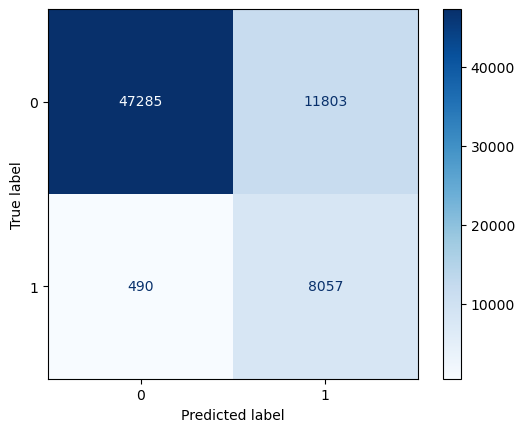

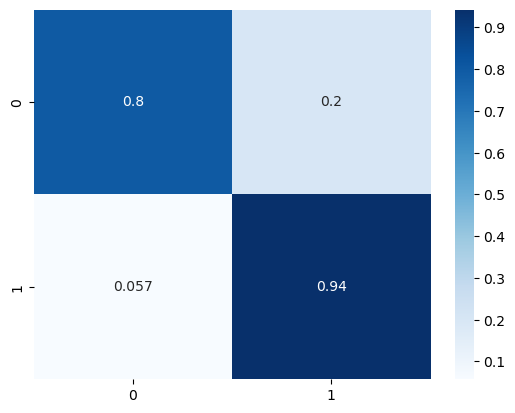

In [9]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
The accuracy score is 0.7237081392770015
 The recall score is 0.312375101768929
 The f1 score is 0.4746267817481515
 The ROC AUC score is 0.8365674070131827

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.81     59088
           1       0.31      0.99      0.47      8547

    accuracy                           0.72     67635
   macro avg       0.65      0.84      0.64     67635
weighted avg       0.91      0.72      0.77     67635


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
Cross validation score: [0.35952622 0.34739275 0.3566373  0.36097068 0.35692619]

Mean cross validation score: 0.3562

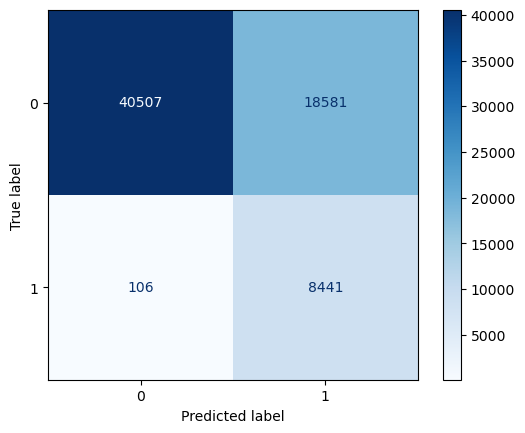

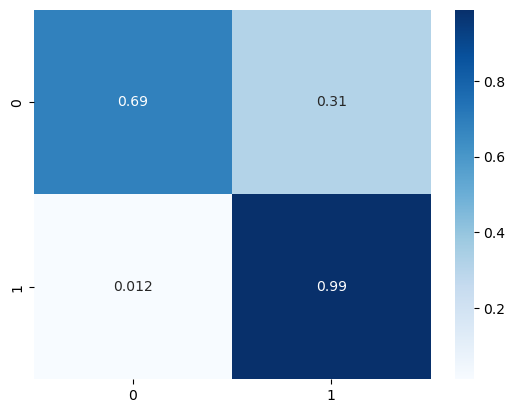

In [10]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.7308641975308642
 The recall score is 0.31727348421769735
 The f1 score is 0.4794532300037176
 The ROC AUC score is 0.8377607832573308

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82     59088
           1       0.32      0.98      0.48      8547

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.78     67635


Cross validation score: [0.360104   0.34421494 0.36299292 0.35779286 0.36299292]

Mean cross validation score: 0.3576195291058789



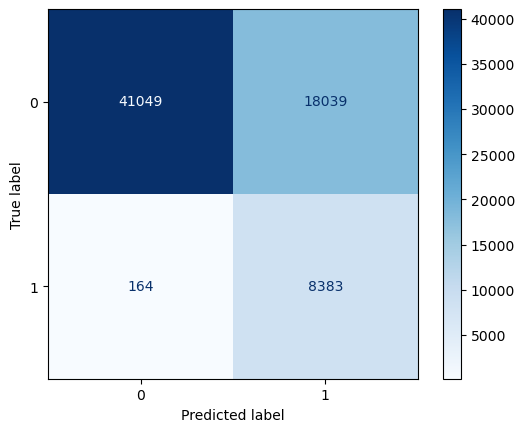

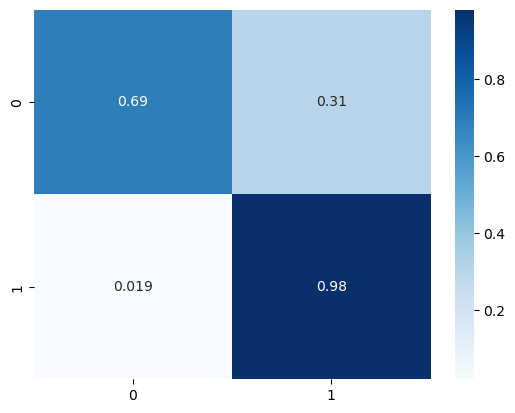

In [11]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### Imbalanced

In [4]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [5]:
# 5 feature Columns
#df = dp.OverallProcessor(df).smote()
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplitimbalance()

X_train

array([[-1.45404797,  1.00029444,  1.00029444,  2.94828885,  0.99407991],
       [-0.0623231 , -0.25558438, -0.25558438, -0.46849131, -1.16590105],
       [ 1.35001992, -0.45106847, -0.45106847, -0.82729836,  0.3156564 ],
       ...,
       [-0.49874053, -0.07266834, -0.07266834, -1.06775914,  1.26553828],
       [ 1.56994682, -0.45992017, -0.45992017, -1.10872422,  0.68628737],
       [ 1.39812893, -0.45323358, -0.45323358,  0.32798519,  1.29980553]])

##### Models

The accuracy score is 0.6070821320322318
 The recall score is 0.24021557438469077
 The f1 score is 0.3854780899525957
 The ROC AUC score is 0.7645154666123392

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.55      0.71     59088
           1       0.24      0.98      0.39      8547

    accuracy                           0.61     67635
   macro avg       0.62      0.76      0.55     67635
weighted avg       0.90      0.61      0.67     67635


Cross validation score: [-2.50807315 -2.49499713 -2.50609499 -2.51503953 -2.49317509]

Mean cross validation score: -2.503475977731491



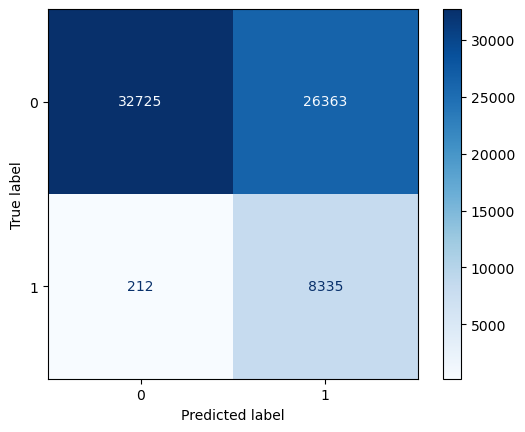

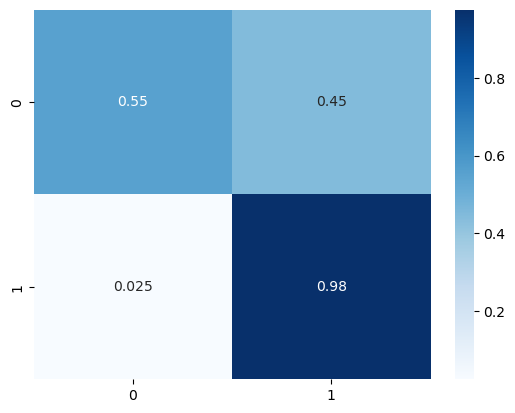

In [6]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

In [7]:
# svm = dp.supportvm(X_train, X_test, y_train, y_test)

# svm.fit()

The accuracy score is 0.9174539809270348
 The recall score is 0.7176850763807285
 The f1 score is 0.6364050797785737
 The ROC AUC score is 0.7695674082250036

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     59088
           1       0.72      0.57      0.64      8547

    accuracy                           0.92     67635
   macro avg       0.83      0.77      0.79     67635
weighted avg       0.91      0.92      0.91     67635


Cross validation score: [0.21238548 0.22546888 0.24799588 0.23242575 0.23656674]

Mean cross validation score: 0.23096854704129574



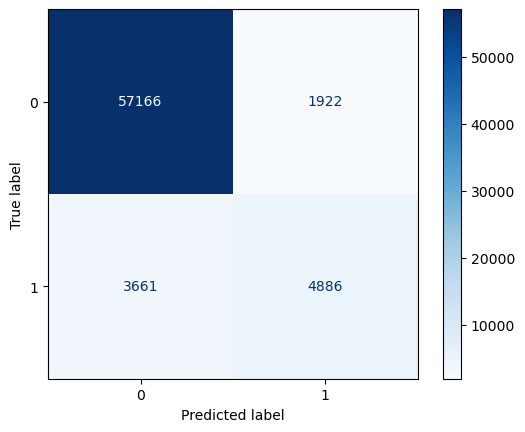

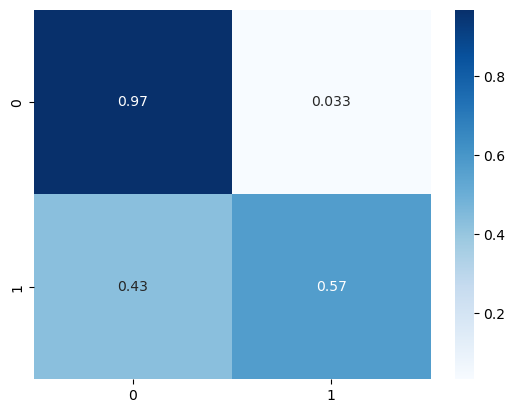

In [8]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.884630738522954
 The recall score is 0.7616033755274262
 The f1 score is 0.21727354799879628
 The ROC AUC score is 0.5604869605935812

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     59088
           1       0.76      0.13      0.22      8547

    accuracy                           0.88     67635
   macro avg       0.82      0.56      0.58     67635
weighted avg       0.87      0.88      0.85     67635


Cross validation score: [-0.04319584 -0.0387264  -0.04121099 -0.04220483 -0.04435815]

Mean cross validation score: -0.04193924182036759



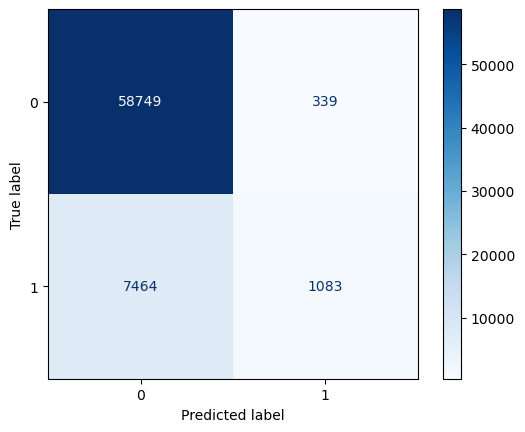

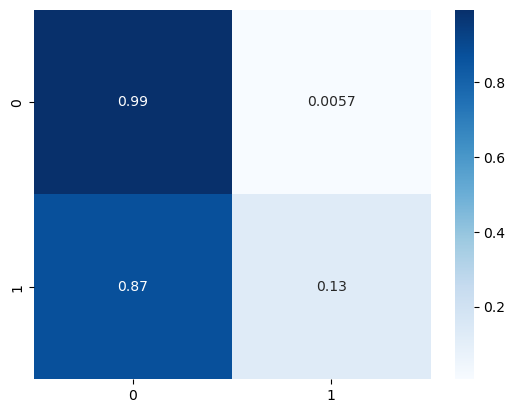

In [9]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.8872181562800325
 The recall score is 0.7134231305155597
 The f1 score is 0.28710280373831776
 The ROC AUC score is 0.5846350635901814

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     59088
           1       0.71      0.18      0.29      8547

    accuracy                           0.89     67635
   macro avg       0.80      0.58      0.61     67635
weighted avg       0.87      0.89      0.86     67635


Cross validation score: [-0.01122747 -0.00924254 -0.01421173 -0.00957382 -0.0090769 ]

Mean cross validation score: -0.010666488639131133



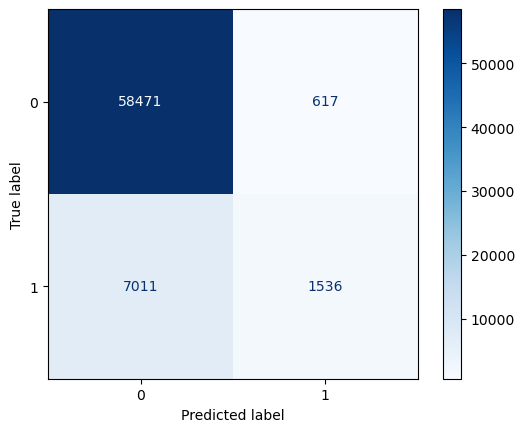

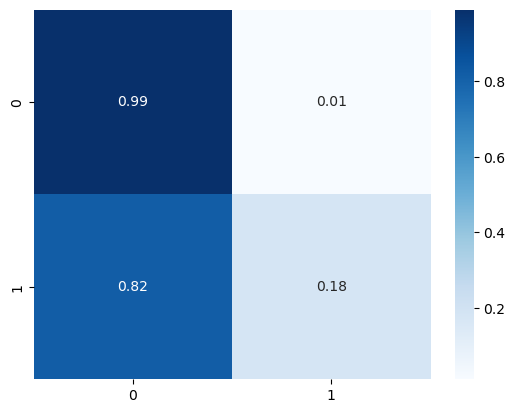

In [10]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9204110297922673
 The recall score is 0.7413793103448276
 The f1 score is 0.6435335408251109
 The ROC AUC score is 0.7699087704418736

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     59088
           1       0.74      0.57      0.64      8547

    accuracy                           0.92     67635
   macro avg       0.84      0.77      0.80     67635
weighted avg       0.91      0.92      0.92     67635




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.22497407 0.24518    0.25925938 0.25395891 0.24319233]

Mean cross validation score: 0.24531293601347728



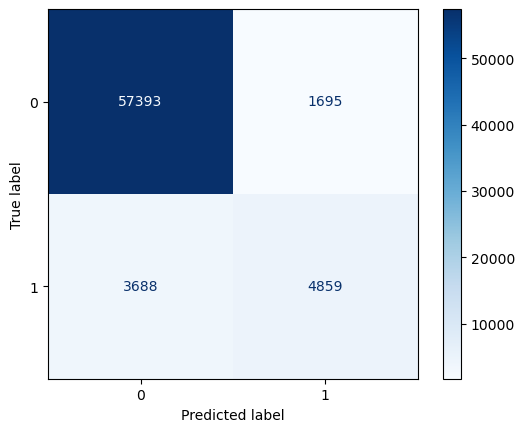

In [11]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.3825 val_loss=0.0000 scale=1.0000 norm=2.0000
The accuracy score is 0.8846455237672802
 The recall score is 0.8101582014987511
 The f1 score is 0.19963069347558474
 The ROC AUC score is 0.5549912311691352

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     59088
           1       0.81      0.11      0.20      8547

    accuracy                           0.88     67635
   macro avg       0.85      0.55      0.57     67635
weighted avg       0.88      0.88      0.84     67635


[iter 0] loss=0.3825 val_loss=0.0000 scale=1.0000 norm=2.0000
[iter 0] loss=0.3825 val_loss=0.0000 scale=1.0000 norm=2.0000
[iter 0] loss=0.3825 val_loss=0.0000 scale=1.0000 norm=2.0000
[iter 0] loss=0.3825 val_loss=0.0000 scale=1.0000 norm=2.0000
[iter 0] loss=0.3825 val_loss=0.0000 scale=1.0000 norm=2.0000
Cross validation score: [-0.04915885 -0.04535198 -0.04435815 -0.04535198 -0.04618018]

Mean cross validation score:

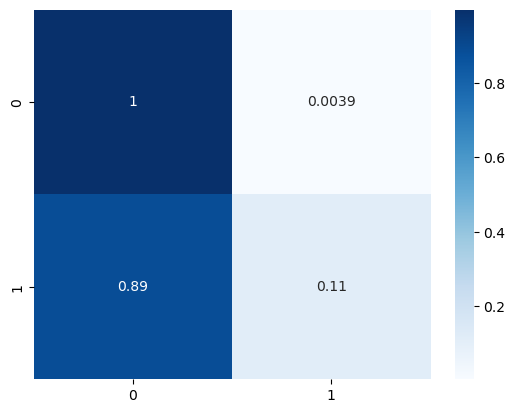

In [12]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.8854587122052192
 The recall score is 0.6846722068328717
 The f1 score is 0.27685988985344906
 The ROC AUC score is 0.580976071456372

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     59088
           1       0.68      0.17      0.28      8547

    accuracy                           0.89     67635
   macro avg       0.79      0.58      0.61     67635
weighted avg       0.87      0.89      0.85     67635


Cross validation score: [-0.0337544  -0.03160389 -0.03806384 -0.02795982 -0.03756692]

Mean cross validation score: -0.033789774962372565



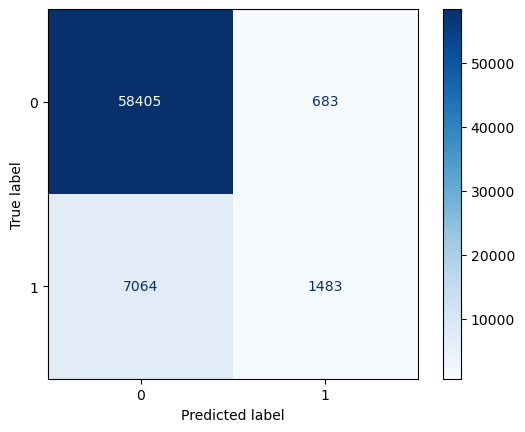

In [13]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

## 11 features

#### SMOTE

In [1]:
# 11 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df = dp.OverallProcessor(df).smote()
df.shape

NameError: name 'pd' is not defined

In [30]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

X_train.shape

(839801, 11)

##### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 11)

The accuracy score is 0.9318983953398651
 The recall score is 0.8854898894168246
 The f1 score is 0.9357831953002892
 The ROC AUC score is 0.931882611647221

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93    104948
           1       0.89      0.99      0.94    105003

    accuracy                           0.93    209951
   macro avg       0.94      0.93      0.93    209951
weighted avg       0.94      0.93      0.93    209951


Cross validation score: [0.725      0.71       0.699      0.715      0.73399993]

Mean cross validation score: 0.7165999866999967



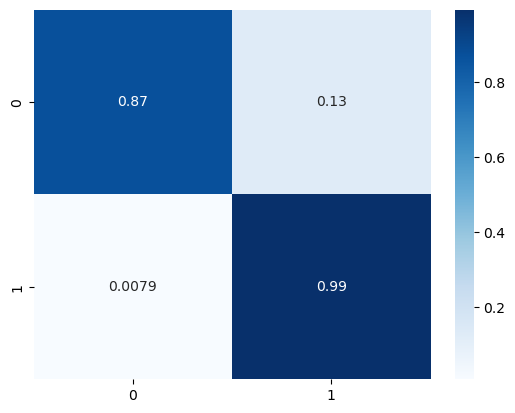

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9958371239003386
 The recall score is 0.9954984534856055
 The f1 score is 0.9958396405144756
 The ROC AUC score is 0.9958370337768127

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.969 0.981 0.985 0.977 0.985]

Mean cross validation score: 0.9793999992499998



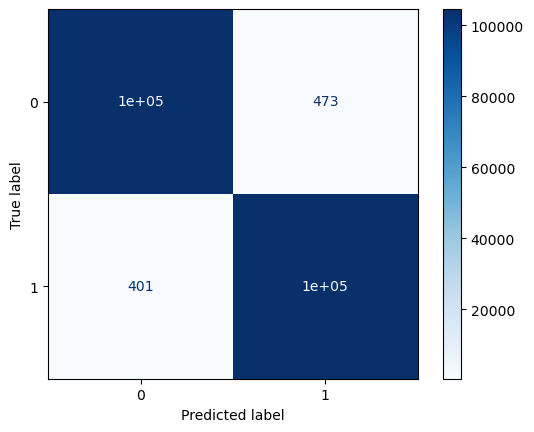

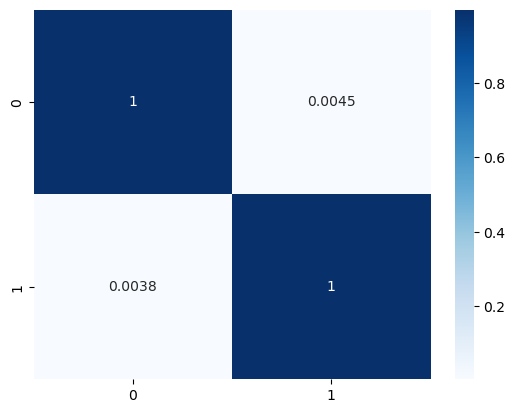

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9996856409352658
 The recall score is 0.9999142489638416
 The f1 score is 0.9996856514159975
 The ROC AUC score is 0.9996857008055886

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    0.998 1.   ]

Mean cross validation score: 0.9982



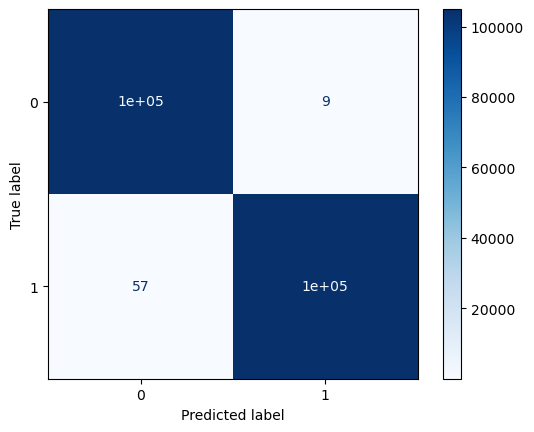

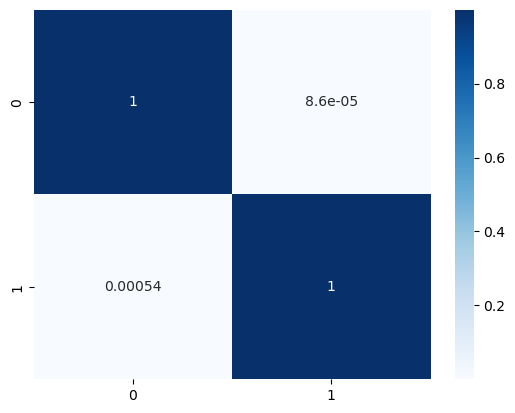

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9987854308862544
 The recall score is 0.9991422689844465
 The f1 score is 0.998785315174986
 The ROC AUC score is 0.9987855243839907

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.993 0.996 0.992 0.992]

Mean cross validation score: 0.9925999996



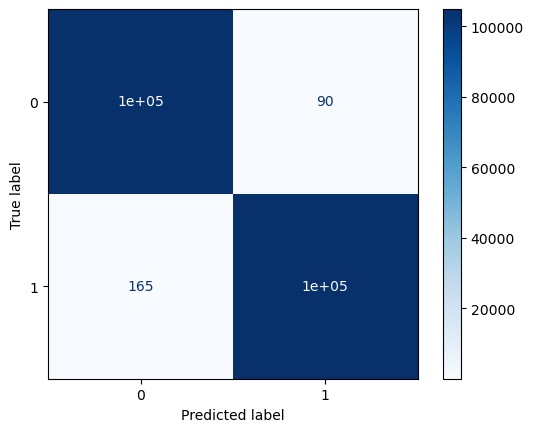

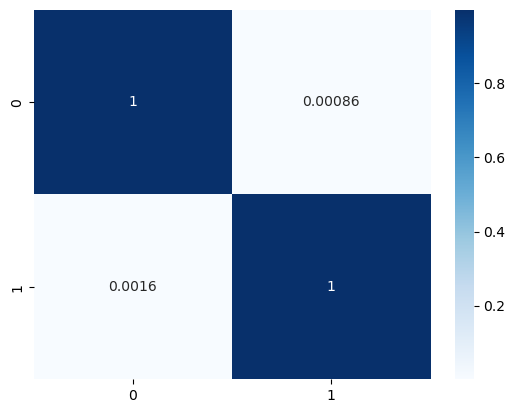

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9996427737900748
 The recall score is 0.9998666107702275
 The f1 score is 0.9996427874013498
 The ROC AUC score is 0.999642832409708

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    0.998 1.   ]

Mean cross validation score: 0.9982



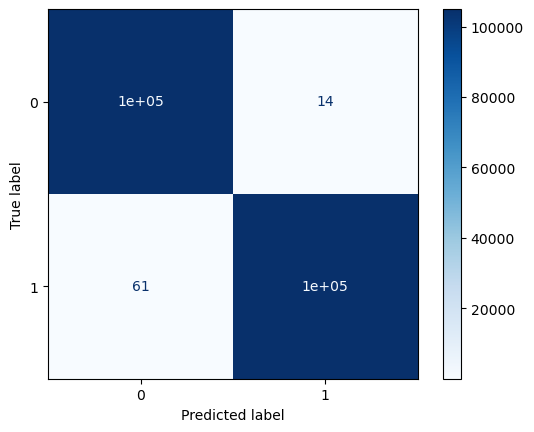

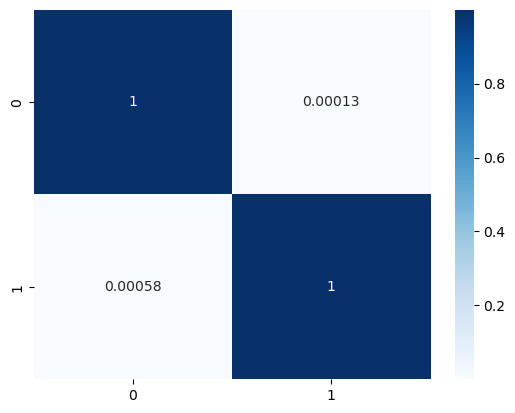

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9996951669675305
 The recall score is 0.9999333034787
 The f1 score is 0.9996951742269808
 The ROC AUC score is 0.9996952293340027

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.995 0.998 1.    0.999 1.   ]

Mean cross validation score: 0.9984



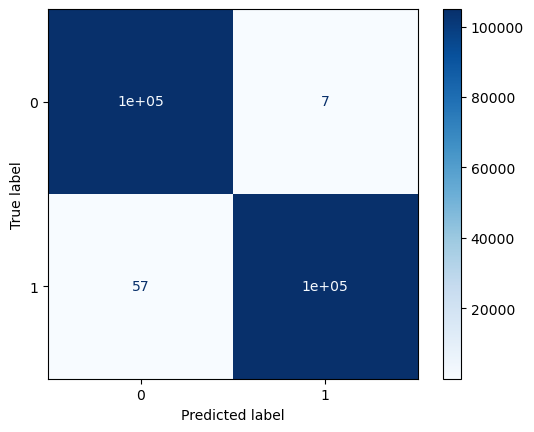

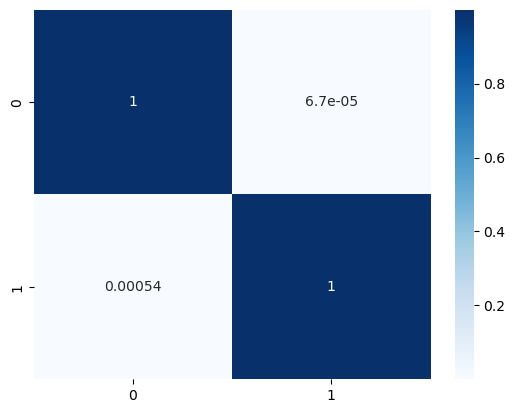

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9991045529671209
 The recall score is 0.9987722821276637
 The f1 score is 0.9991050857784801
 The ROC AUC score is 0.9991044655633214

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.992 0.996 0.998 0.996 0.995]

Mean cross validation score: 0.9953999997499998



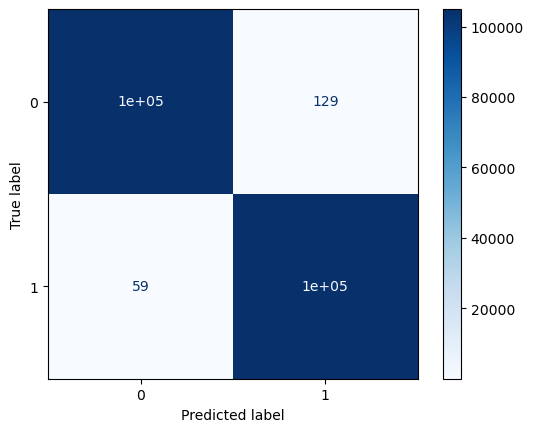

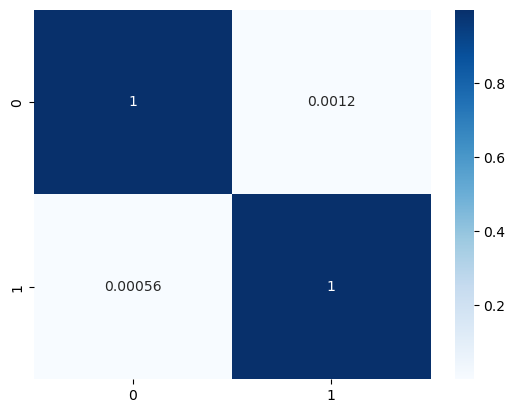

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9985710951602993
 The recall score is 0.9978223866262207
 The f1 score is 0.9985725433471003
 The ROC AUC score is 0.9985708979180814

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.984 0.988 0.996 0.99  0.994]

Mean cross validation score: 0.9903999996999999



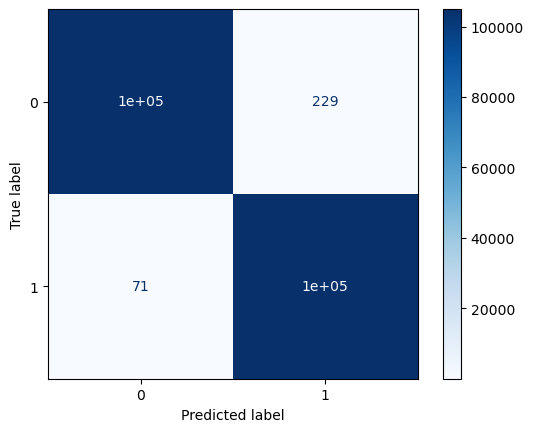

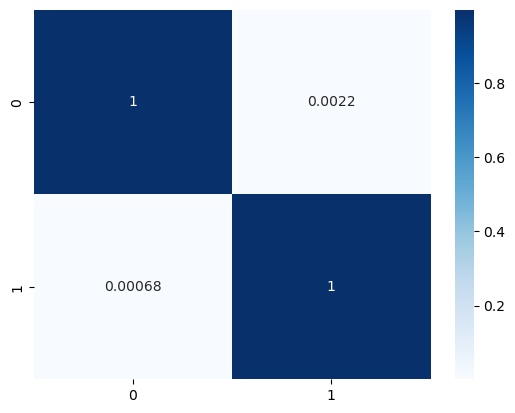

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

##### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 11)

The accuracy score is 0.891312734876233
 The recall score is 0.8690146916196703
 The f1 score is 0.8945317735800221
 The ROC AUC score is 0.8913048004754643

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89    104948
           1       0.87      0.92      0.89    105003

    accuracy                           0.89    209951
   macro avg       0.89      0.89      0.89    209951
weighted avg       0.89      0.89      0.89    209951


Cross validation score: [0.55  0.565 0.505 0.505 0.545]

Mean cross validation score: 0.534



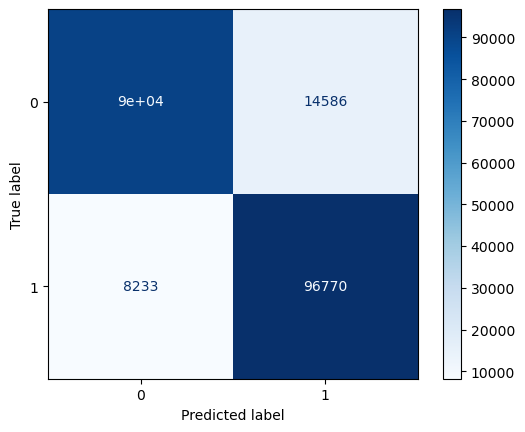

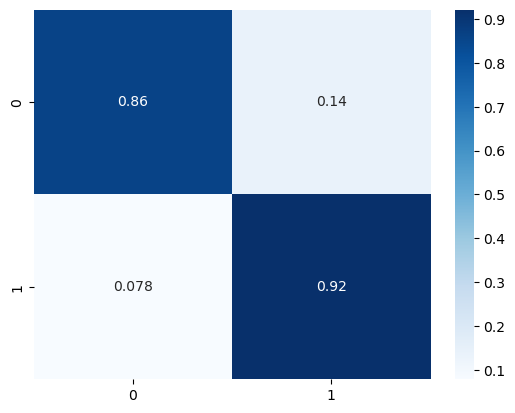

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9854775638125086
 The recall score is 0.9874170539077888
 The f1 score is 0.985452480807676
 The ROC AUC score is 0.9854780831267362

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    104948
           1       0.99      0.98      0.99    105003

    accuracy                           0.99    209951
   macro avg       0.99      0.99      0.99    209951
weighted avg       0.99      0.99      0.99    209951


Cross validation score: [0.955 0.94  0.93  0.935 0.93 ]

Mean cross validation score: 0.9380000000000001



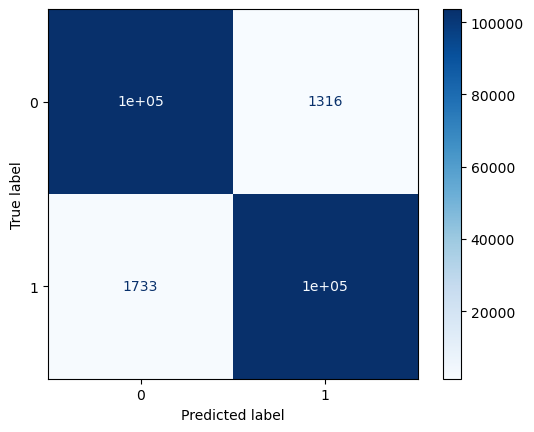

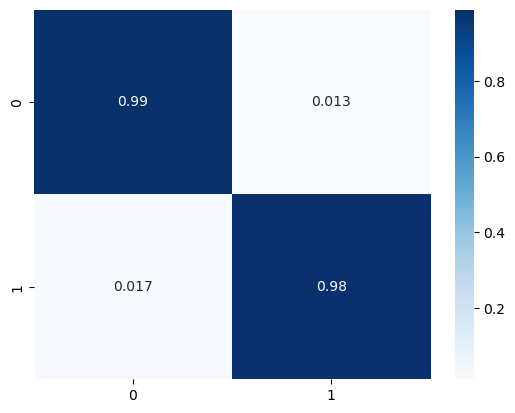

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9994570161609138
 The recall score is 0.9995332755484012
 The f1 score is 0.9994571170055717
 The ROC AUC score is 0.9994570360876162

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.985 0.985 1.    0.995 0.99 ]

Mean cross validation score: 0.991



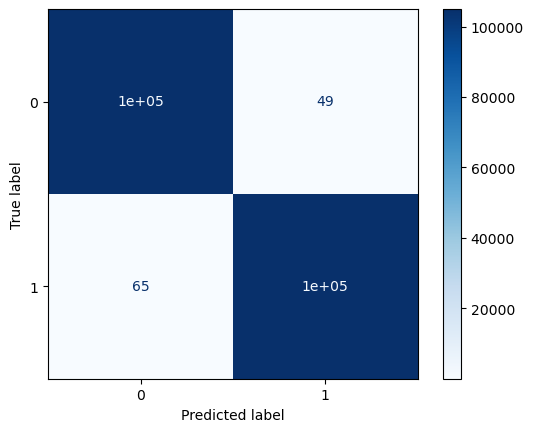

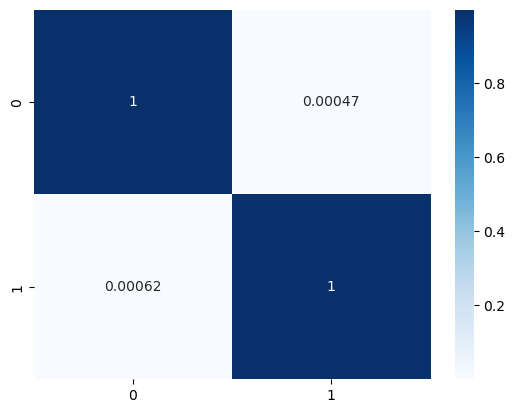

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9987997199346514
 The recall score is 0.9981642999134462
 The f1 score is 0.9988007994670219
 The ROC AUC score is 0.9987995526540713

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.985 1.    0.98  0.99 ]

Mean cross validation score: 0.9890000000000001



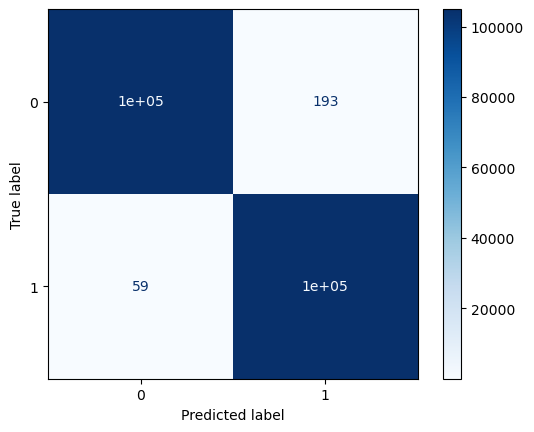

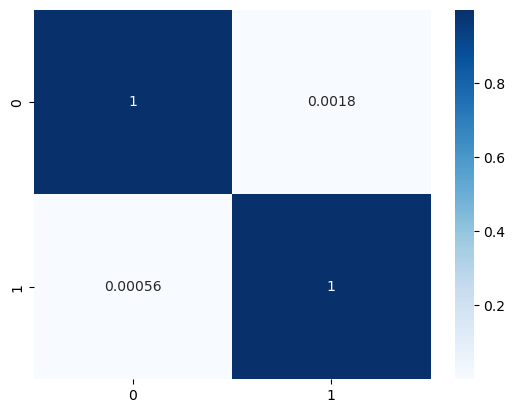

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.999276021547885
 The recall score is 0.9993427882921068
 The f1 score is 0.9992761629014438
 The ROC AUC score is 0.9992760389666708

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.985 1.    0.995 0.99 ]

Mean cross validation score: 0.992



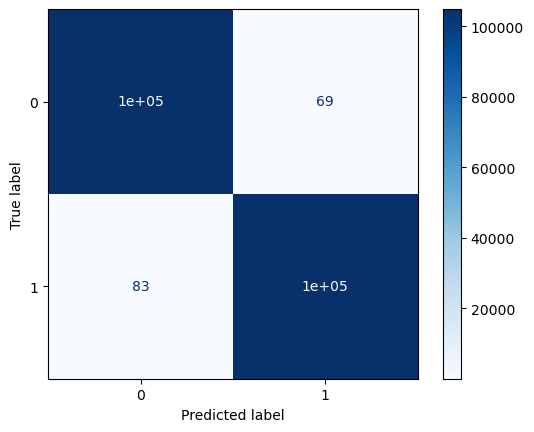

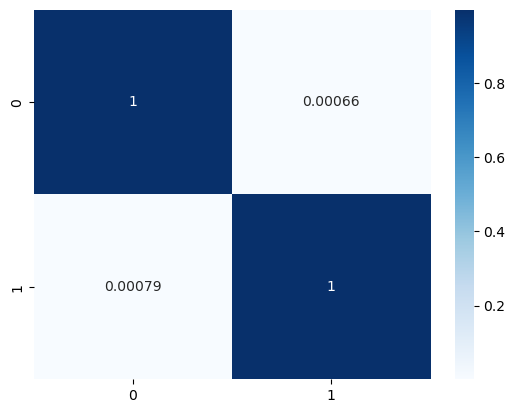

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9994713052093107
 The recall score is 0.9995523212618825
 The f1 score is 0.9994714008829034
 The ROC AUC score is 0.9994713263847416

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.985 0.985 1.    0.995 0.99 ]

Mean cross validation score: 0.991



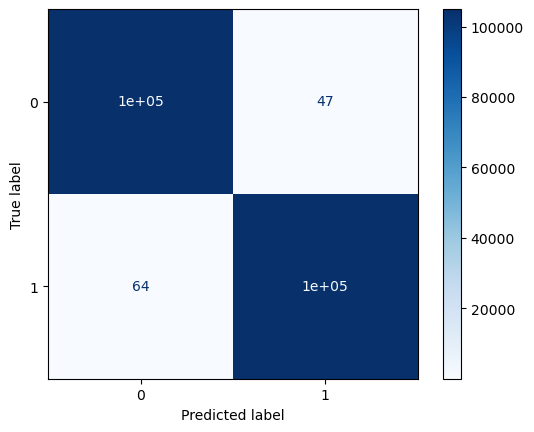

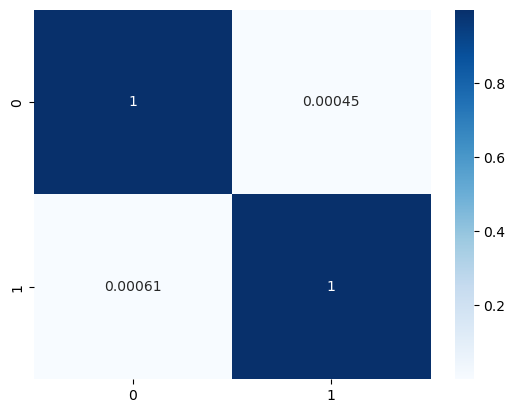

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


The accuracy score is 0.9989045062895628
 The recall score is 0.9988667853843883
 The f1 score is 0.9989048349157675
 The ROC AUC score is 0.9989044962324005

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.985 0.985 1.    0.995 0.98 ]

Mean cross validation score: 0.9890000000000001



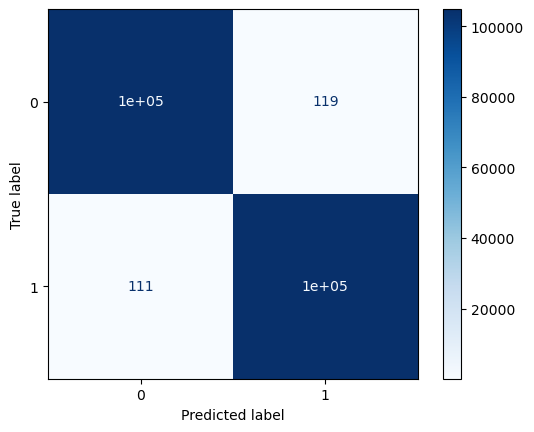

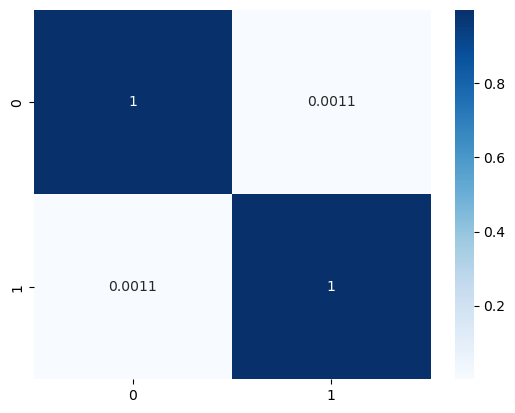

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9965039461588656
 The recall score is 0.9947708572567404
 The f1 score is 0.9965109756909124
 The ROC AUC score is 0.9965034867477425

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104948
           1       0.99      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.975 0.965 0.98  0.97  0.98 ]

Mean cross validation score: 0.9739999999999999



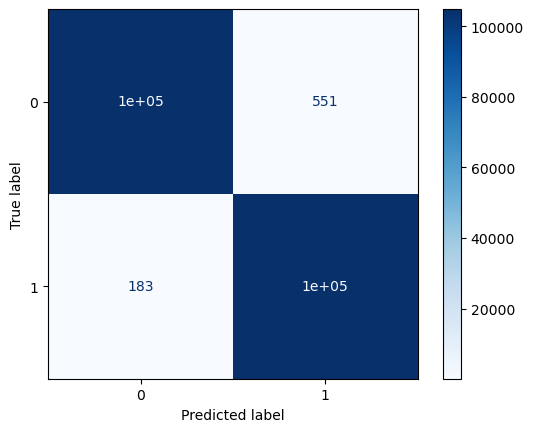

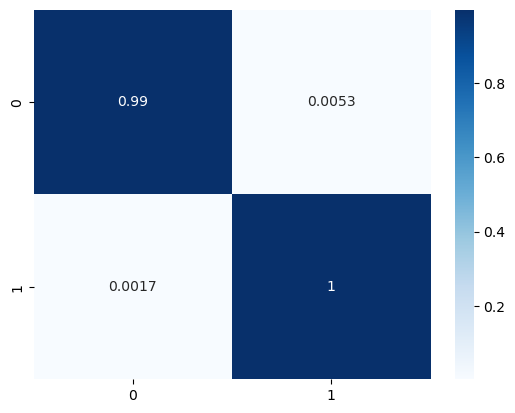

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### ADASYN

In [30]:
# 11 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df = dp.OverallProcessor(df).adasyn()
df.shape

(1048663, 12)

In [31]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

X_train.shape

(838930, 11)

##### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 11)

The accuracy score is 0.9332150877544306
 The recall score is 0.885501827143707
 The f1 score is 0.9370191680792802
 The ROC AUC score is 0.9332946907271726

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93    105002
           1       0.89      0.99      0.94    104731

    accuracy                           0.93    209733
   macro avg       0.94      0.93      0.93    209733
weighted avg       0.94      0.93      0.93    209733


Cross validation score: [0.72999973 0.71399971 0.72699973 0.72299972 0.72399972]

Mean cross validation score: 0.7235997235997237



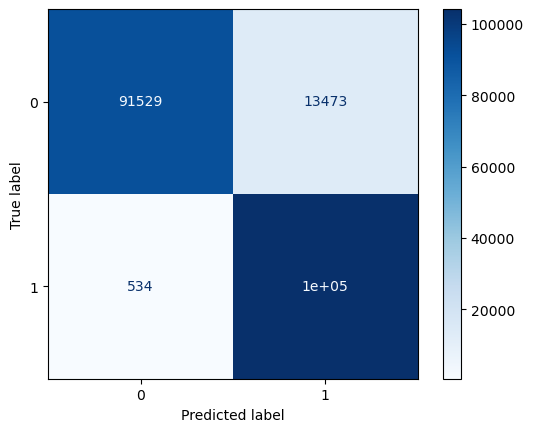

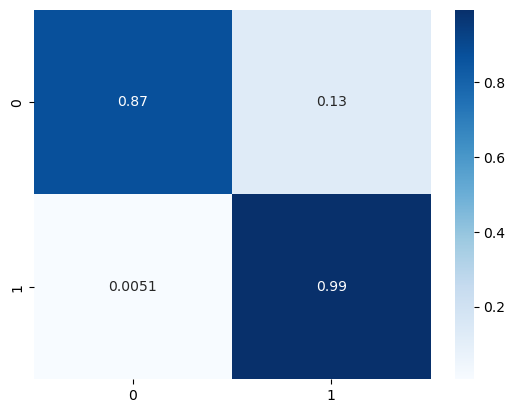

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.995890012539753
 The recall score is 0.996586443303405
 The f1 score is 0.9958817852604221
 The ROC AUC score is 0.995889093880751

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [0.97899998 0.97899998 0.98099998 0.97899998 0.97399997]

Mean cross validation score: 0.9783999783999784



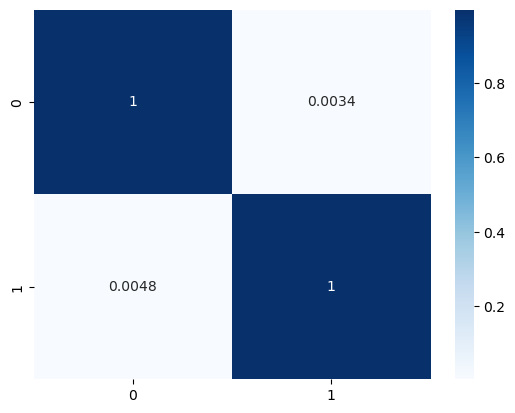

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9996614743507221
 The recall score is 0.999627642307472
 The f1 score is 0.9996610476967952
 The ROC AUC score is 0.9996615169110655

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [0.997 1.    0.999 0.999 0.997]

Mean cross validation score: 0.9983999983999985



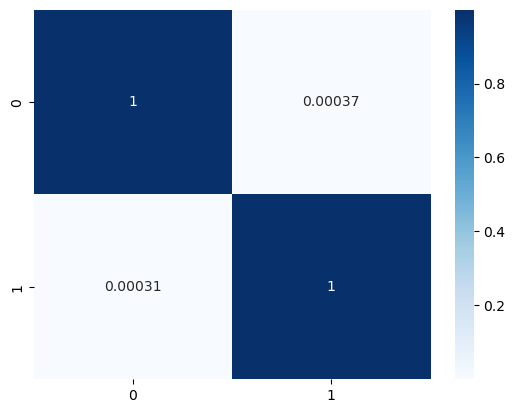

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9986220575684323
 The recall score is 0.9987964926356812
 The f1 score is 0.9986200310373642
 The ROC AUC score is 0.9986218273185868

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [0.99199999 1.         0.99499999 0.998      0.99199999]

Mean cross validation score: 0.9953999953999955



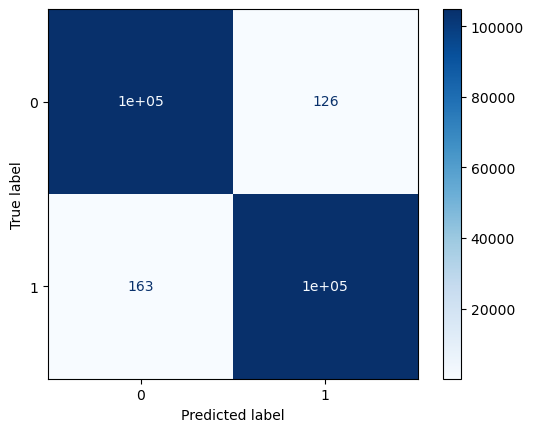

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9996948501189608
 The recall score is 0.9997039979375341
 The f1 score is 0.9996944524014132
 The ROC AUC score is 0.9996948372879083

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [0.997 1.    0.999 0.999 0.999]

Mean cross validation score: 0.9987999987999988



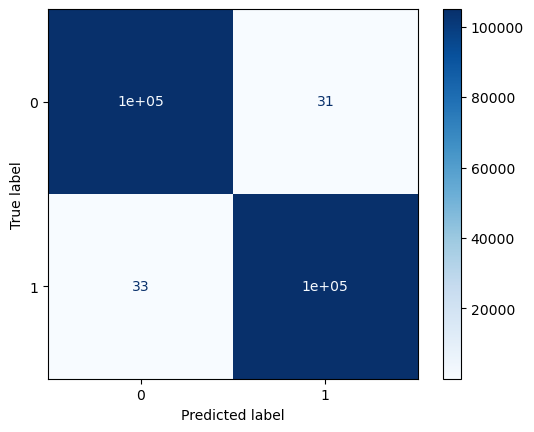

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9997091540196344
 The recall score is 0.9997326356396692
 The f1 score is 0.9997087707739536
 The ROC AUC score is 0.9997091227300904

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.997 1.    0.998 0.999 0.998]

Mean cross validation score: 0.9983999983999985



['/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_11.sav']

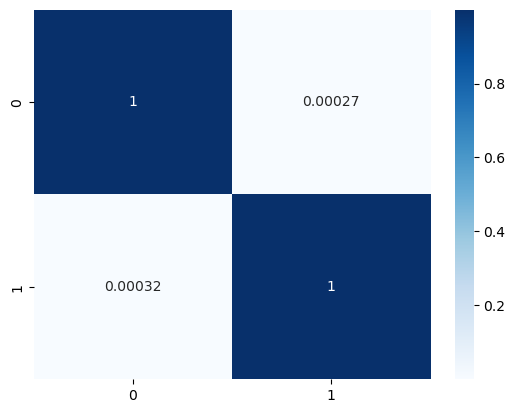

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

dump(ada, '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_11.sav' )

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9994040041385953
 The recall score is 0.99949384979754
 The f1 score is 0.9994031789078651
 The ROC AUC score is 0.9994038860885064

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99499999 1.         0.997      0.997      0.99499999]

Mean cross validation score: 0.9967999967999969



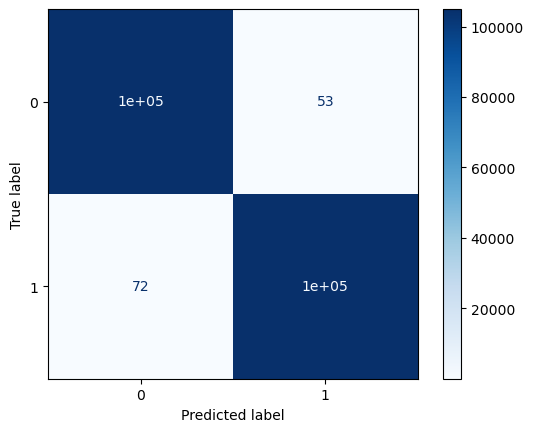

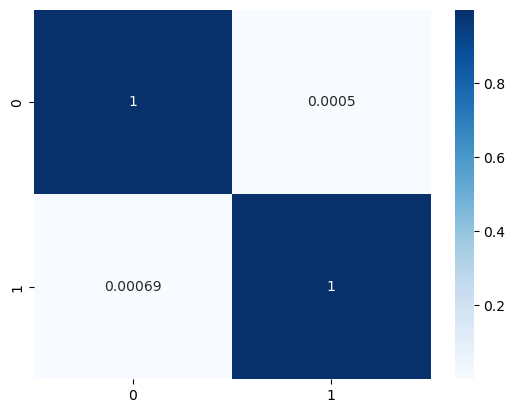

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9989224394825802
 The recall score is 0.9986448959337335
 The f1 score is 0.9989213440244368
 The ROC AUC score is 0.9989227950093925

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [0.98999999 0.997      0.996      0.996      0.98699999]

Mean cross validation score: 0.9931999931999933



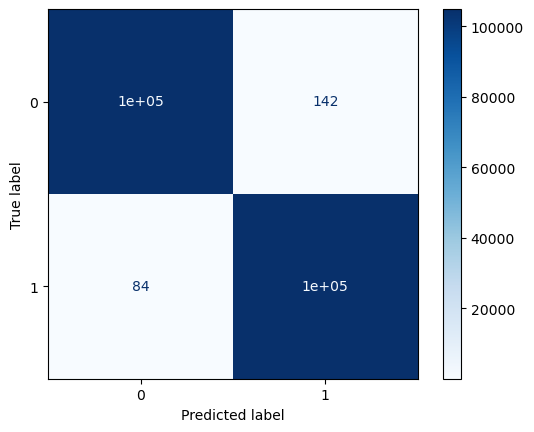

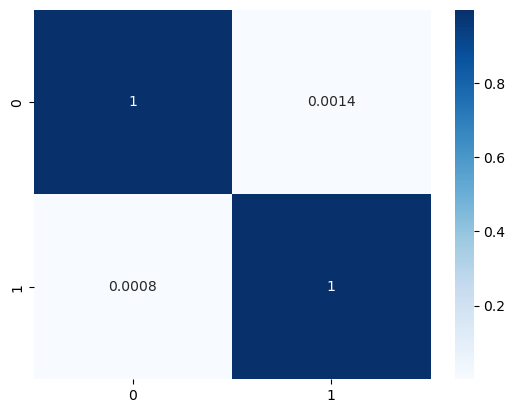

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

##### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 11)

The accuracy score is 0.8943943013259716
 The recall score is 0.867835444616673
 The f1 score is 0.8979238196188677
 The ROC AUC score is 0.8944404726403126

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89    105002
           1       0.87      0.93      0.90    104731

    accuracy                           0.89    209733
   macro avg       0.90      0.89      0.89    209733
weighted avg       0.90      0.89      0.89    209733


Cross validation score: [0.55999725 0.50999694 0.58       0.59       0.565     ]

Mean cross validation score: 0.5609988374927343



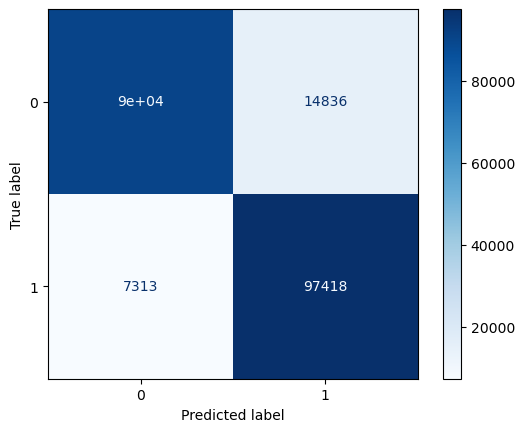

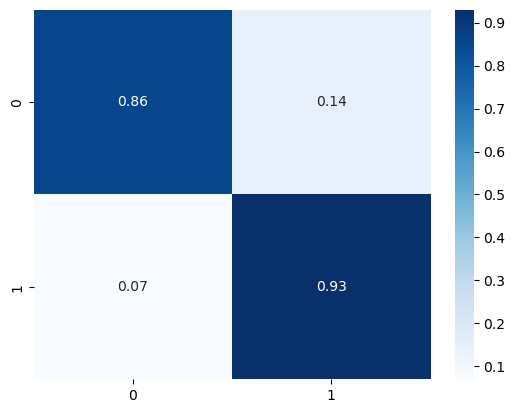

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9873982635064582
 The recall score is 0.9858279557611406
 The f1 score is 0.9874021077517791
 The ROC AUC score is 0.9874003063319166

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    105002
           1       0.99      0.99      0.99    104731

    accuracy                           0.99    209733
   macro avg       0.99      0.99      0.99    209733
weighted avg       0.99      0.99      0.99    209733


Cross validation score: [0.93499959 0.92499953 0.945      0.935      0.945     ]

Mean cross validation score: 0.9369998249989063



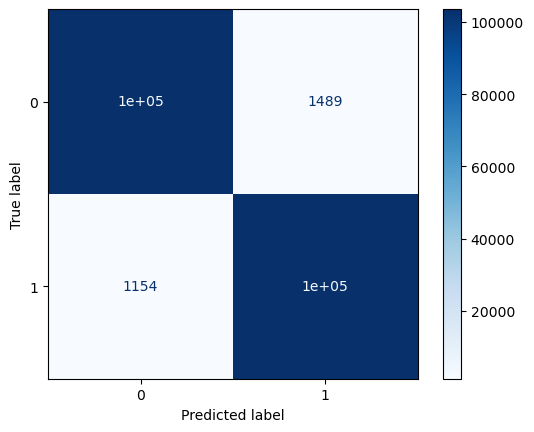

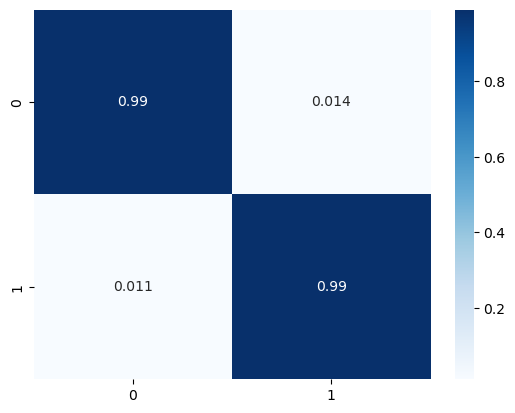

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9989272074494715
 The recall score is 0.9982550156381113
 The f1 score is 0.9989265420819359
 The ROC AUC score is 0.9989280743298996

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [1.         0.98499991 0.99       1.         0.995     ]

Mean cross validation score: 0.9939999812498828



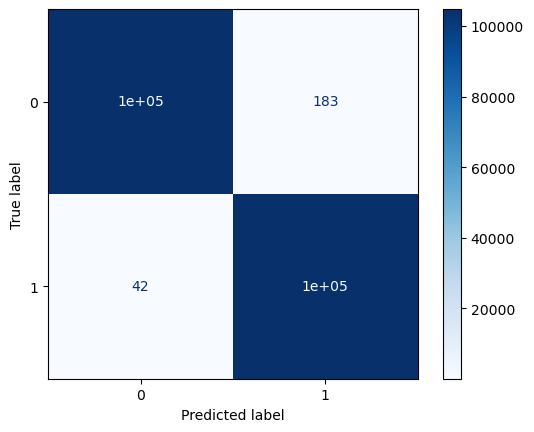

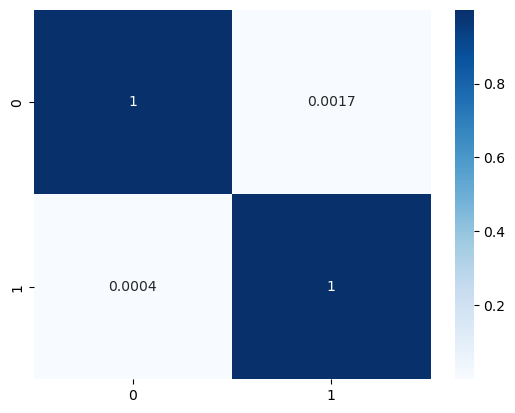

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.998798472343408
 The recall score is 0.9980740444113917
 The f1 score is 0.9987977902239354
 The ROC AUC score is 0.9987994067776046

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [1.         0.96499978 0.995      1.         1.        ]

Mean cross validation score: 0.9919999562497266



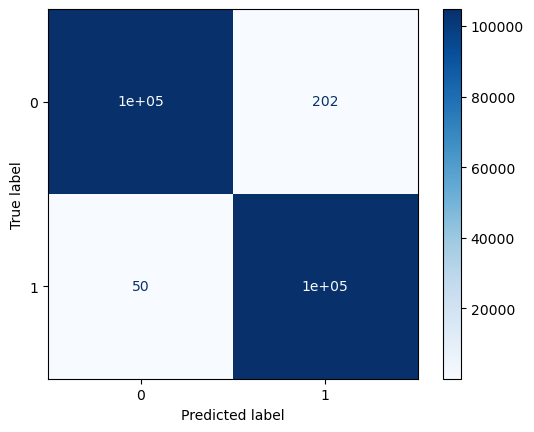

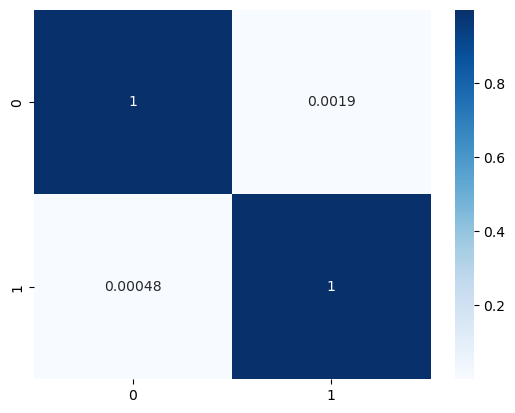

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9994040041385953
 The recall score is 0.9991887455142399
 The f1 score is 0.9994033612242073
 The ROC AUC score is 0.9994042803791322

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [1.         0.98499991 0.985      1.         0.995     ]

Mean cross validation score: 0.9929999812498828



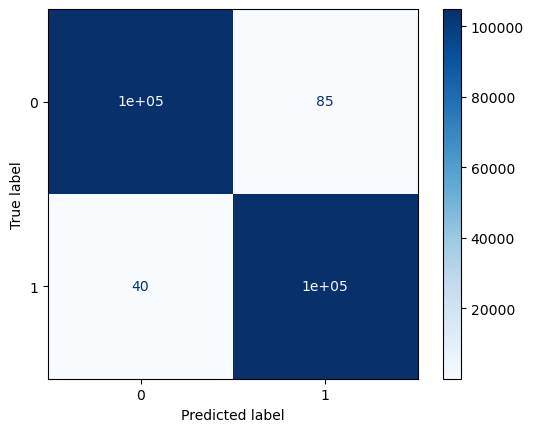

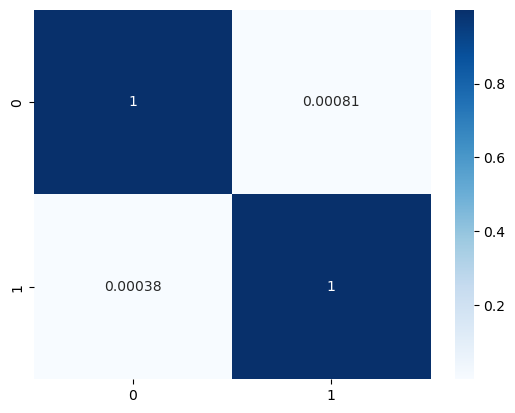

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9989224394825802
 The recall score is 0.9982359952324196
 The f1 score is 0.9989217865900786
 The ROC AUC score is 0.998923324837421

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         0.98499991 0.99       1.         0.995     ]

Mean cross validation score: 0.9939999812498828



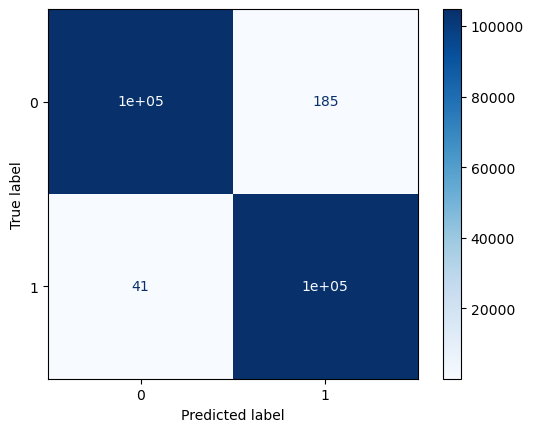

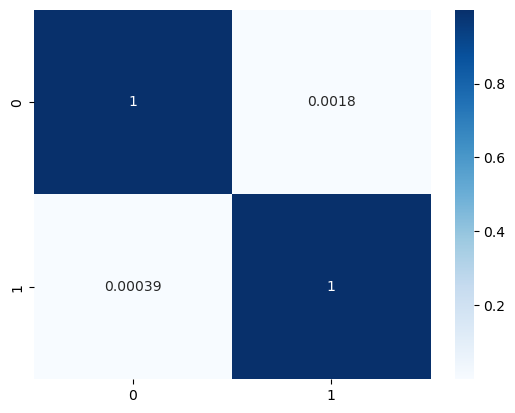

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9982978358198281
 The recall score is 0.9991678463480889
 The f1 score is 0.9982941432250727
 The ROC AUC score is 0.9982967055531801

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733




/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=512.0000 norm=1024.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99499997        nan 0.985      1.         0.995     ]

Mean cross validation score: nan



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/ngboost/ngboost.py", line 250, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ngboost/ngboost.py", line 383, in partial_fit
    grads = D.grad(Y_batch, natural=self.natural_gradient)
      

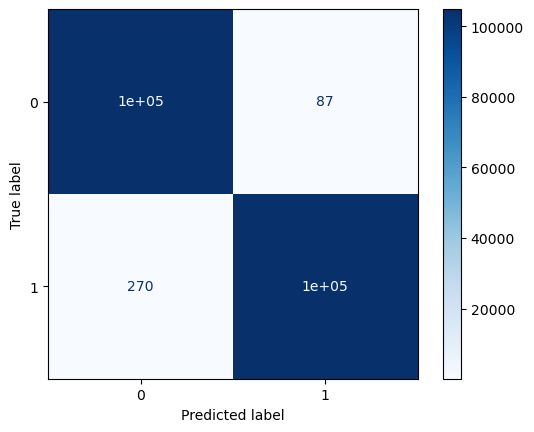

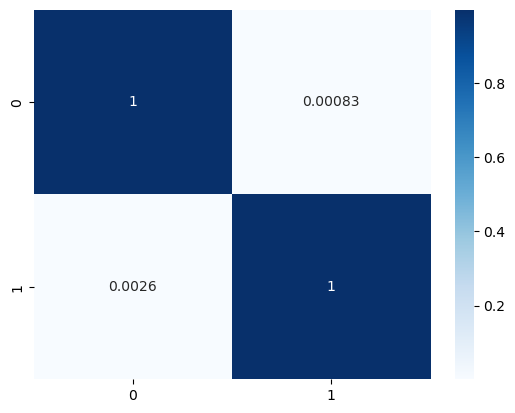

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9960998030829674
 The recall score is 0.9944423825429907
 The f1 score is 0.9961012716145883
 The ROC AUC score is 0.9961019528481586

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    105002
           1       0.99      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [0.98499991 0.98499991 0.99       0.97       1.        ]

Mean cross validation score: 0.9859999624997655



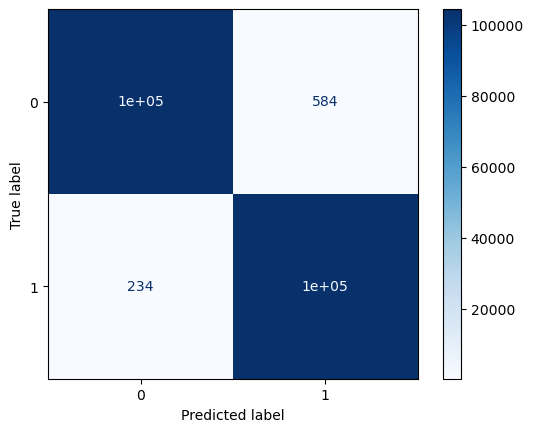

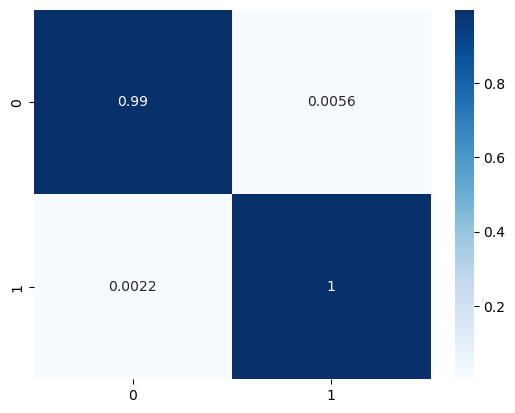

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### Random Under Sample

In [41]:
# 11 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df = dp.OverallProcessor(df).rus()
df.shape

(106502, 12)

In [42]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

X_train.shape

(85201, 11)

##### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 11)

The accuracy score is 0.9321628092577813
 The recall score is 0.8906129447063866
 The f1 score is 0.9349772757953472
 The ROC AUC score is 0.9326090821184689

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     10743
           1       0.89      0.98      0.93     10558

    accuracy                           0.93     21301
   macro avg       0.94      0.93      0.93     21301
weighted avg       0.94      0.93      0.93     21301


Cross validation score: [0.68199801 0.71599822 0.67899872 0.67199869 0.70899884]

Mean cross validation score: 0.6915984954922888



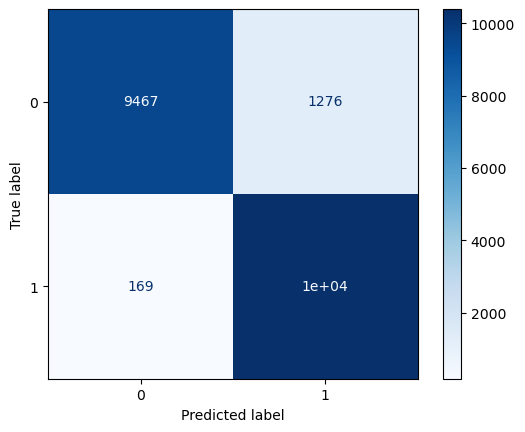

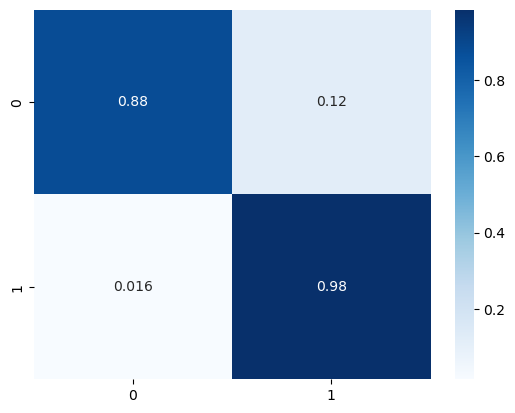

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.996150415473452
 The recall score is 0.994430809892392
 The f1 score is 0.9961232980332829
 The ROC AUC score is 0.9961648044338602

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     10743
           1       0.99      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.97199982 0.97899987 0.98299993 0.98199993 0.98199993]

Mean cross validation score: 0.9795998963494477



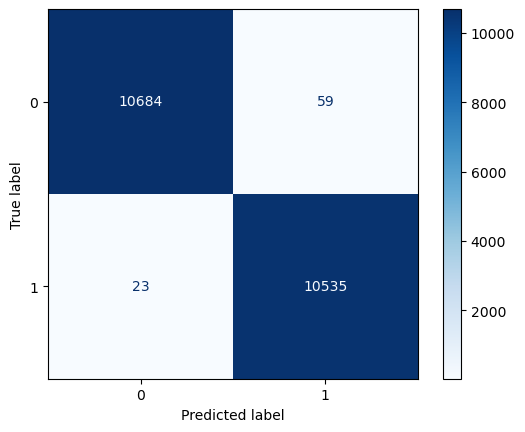

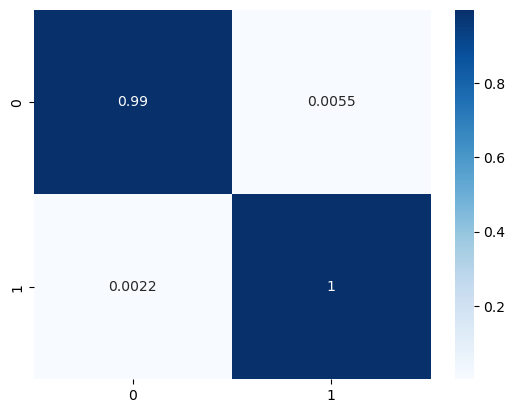

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9993897000140839
 The recall score is 0.9989590233746569
 The f1 score is 0.9993846153846154
 The ROC AUC score is 0.9993933238147629

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99899999 0.99899999 1.         1.         0.999     ]

Mean cross validation score: 0.9993999966999813



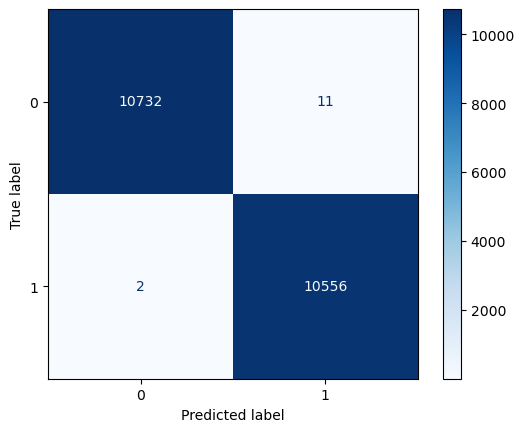

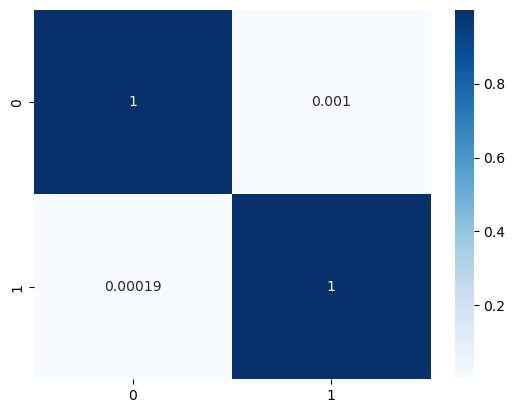

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9979813154312004
 The recall score is 0.9980107985223075
 The f1 score is 0.9979635330333886
 The ROC AUC score is 0.9979807553906695

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99299996 0.99299996 0.99299997 0.99499998 0.99399998]

Mean cross validation score: 0.9935999680998331



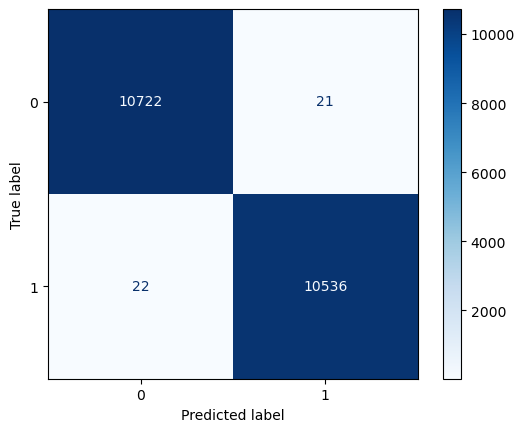

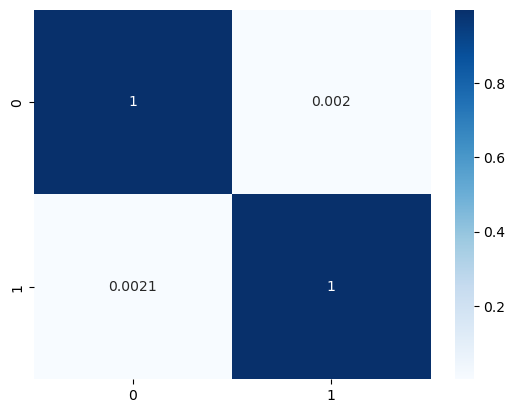

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9994366461668466
 The recall score is 0.9990535680484574
 The f1 score is 0.9994319257716342
 The ROC AUC score is 0.9994398657490456

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99899999 0.99799999 0.99699999 1.         0.999     ]

Mean cross validation score: 0.9985999930499638



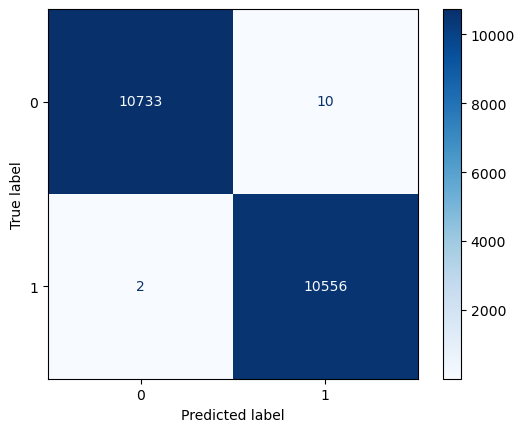

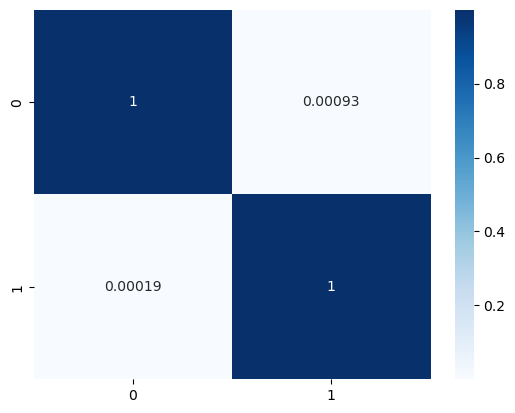

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9994366461668466
 The recall score is 0.9990535680484574
 The f1 score is 0.9994319257716342
 The ROC AUC score is 0.9994398657490456

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.99899999 0.99899999 1.         1.         0.999     ]

Mean cross validation score: 0.9993999966999813



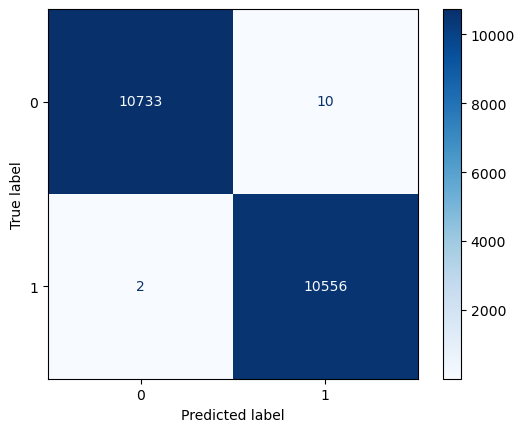

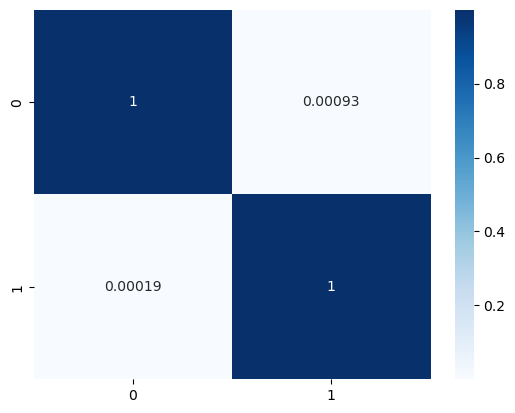

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9987324538754049
 The recall score is 0.9982022897152049
 The f1 score is 0.9987220144838358
 The ROC AUC score is 0.9987368436161209

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99599997 0.99699998 0.99699999 0.99699999 0.99499998]

Mean cross validation score: 0.9963999824499101



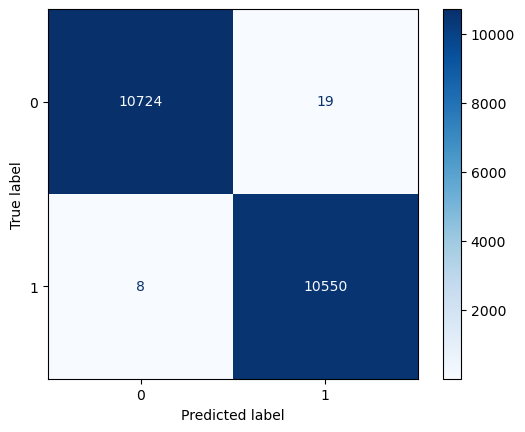

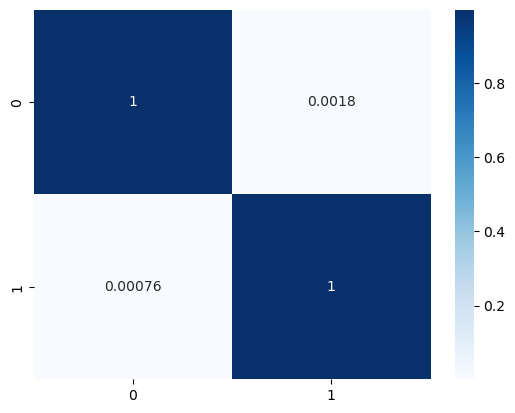

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9984038308060654
 The recall score is 0.9973534971644612
 The f1 score is 0.9983915223767622
 The ROC AUC score is 0.9984126811157024

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99099994 0.99199995 0.99299997 0.99199997 0.99499998]

Mean cross validation score: 0.9925999627498031



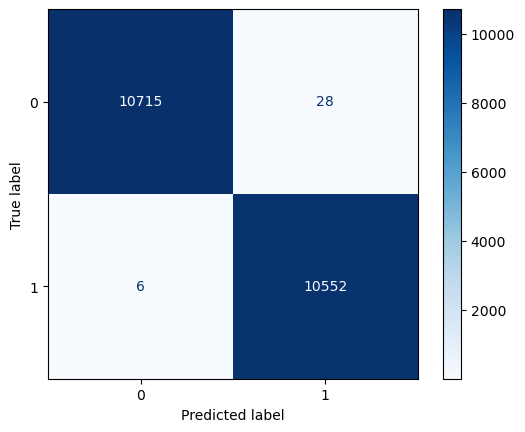

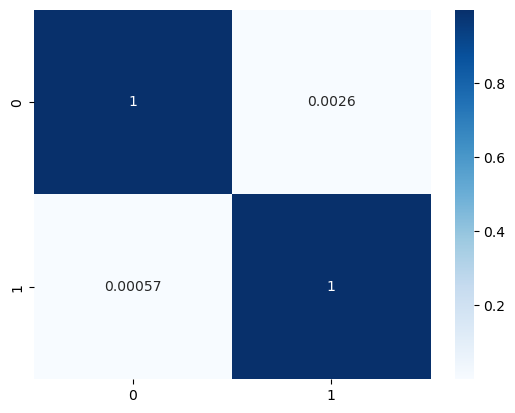

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

##### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 11)

The accuracy score is 0.8834327026900145
 The recall score is 0.87215411558669
 The f1 score is 0.884009903302658
 The ROC AUC score is 0.8835425674964285

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     10743
           1       0.87      0.90      0.88     10558

    accuracy                           0.88     21301
   macro avg       0.88      0.88      0.88     21301
weighted avg       0.88      0.88      0.88     21301


Cross validation score: [0.52999706 0.53499709 0.51499697 0.45999662 0.38      ]

Mean cross validation score: 0.48399754998468725



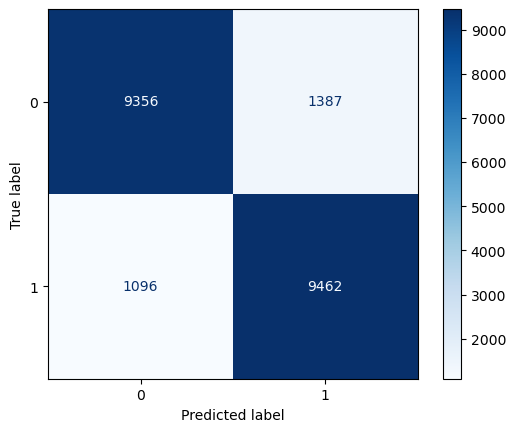

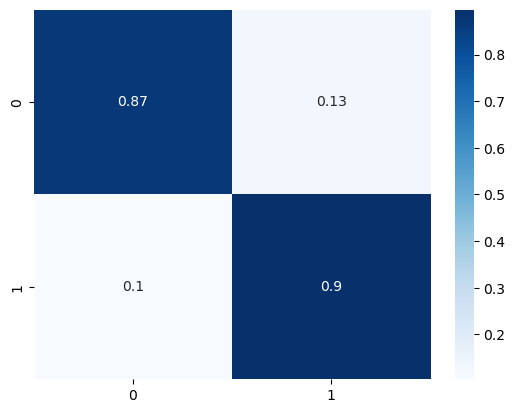

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9856814234073518
 The recall score is 0.9845005197996408
 The f1 score is 0.9855716921330243
 The ROC AUC score is 0.9856897217547015

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     10743
           1       0.98      0.99      0.99     10558

    accuracy                           0.99     21301
   macro avg       0.99      0.99      0.99     21301
weighted avg       0.99      0.99      0.99     21301


Cross validation score: [0.94999969 0.92499953 0.89499934 0.94999969 0.89      ]

Mean cross validation score: 0.9219996499978125



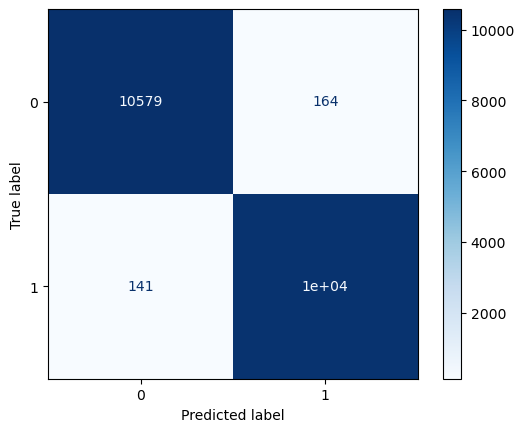

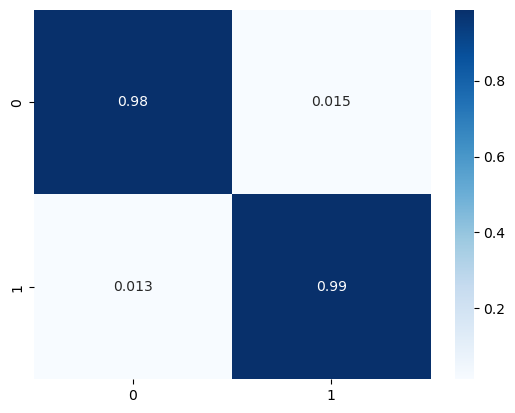

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9985916154171166
 The recall score is 0.9973544973544973
 The f1 score is 0.998581023555009
 The ROC AUC score is 0.9986021109319554

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [1.         0.98499991 0.98499991 1.         1.        ]

Mean cross validation score: 0.9939999624997655



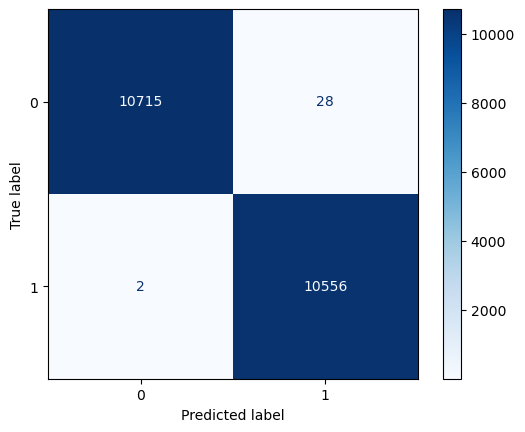

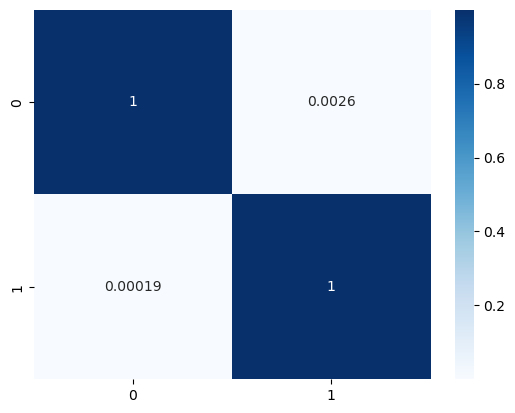

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.998075207736726
 The recall score is 0.9981999052581715
 The f1 score is 0.9980580684886089
 The ROC AUC score is 0.9980738392592351

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99499997 0.97999987 0.97499984 1.         0.995     ]

Mean cross validation score: 0.9889999374996095



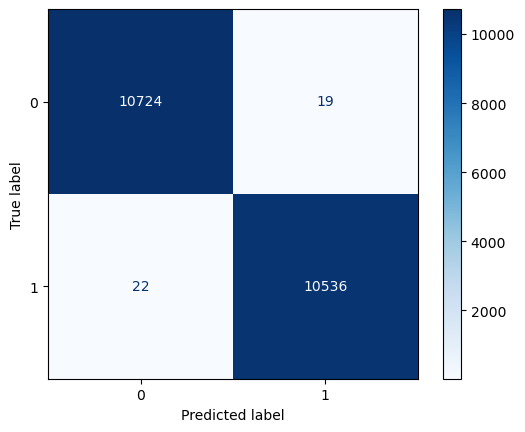

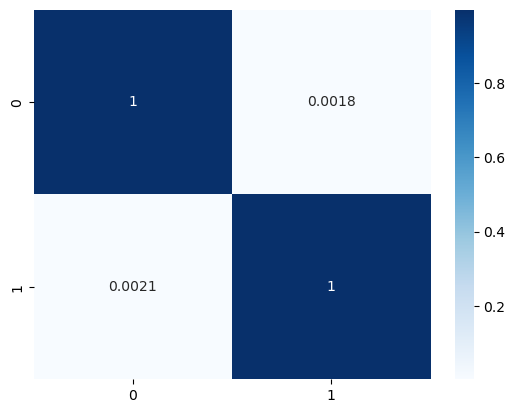

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9988732923336933
 The recall score is 0.9979202117602571
 The f1 score is 0.9988644965934897
 The ROC AUC score is 0.9988813625376521

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99499997 0.98499991 0.98999994 1.         1.        ]

Mean cross validation score: 0.9939999624997655



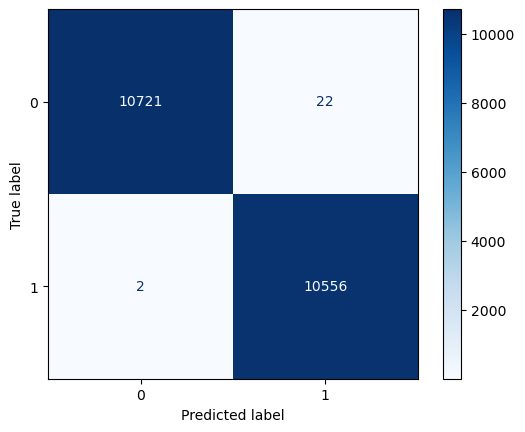

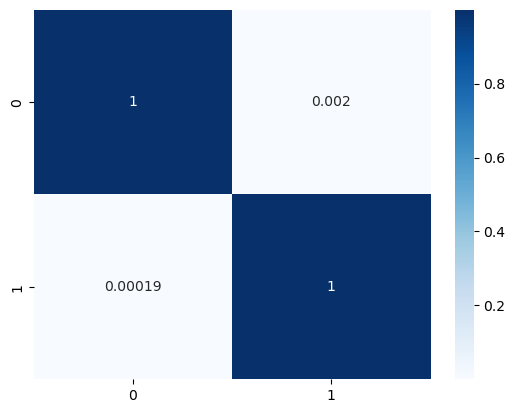

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9981221538894888
 The recall score is 0.9970699432892249
 The f1 score is 0.9981076733844262
 The ROC AUC score is 0.998130982950664

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.99499997 0.98499991 0.98499991 1.         1.        ]

Mean cross validation score: 0.9929999562497265



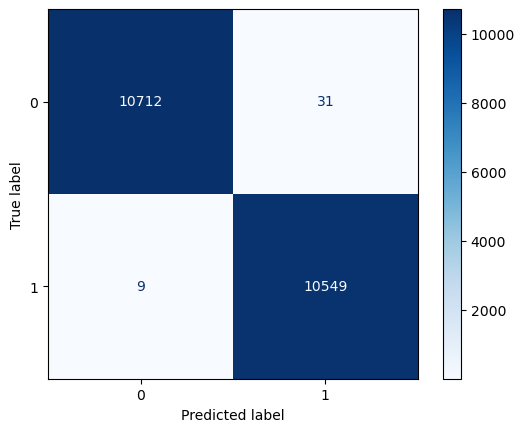

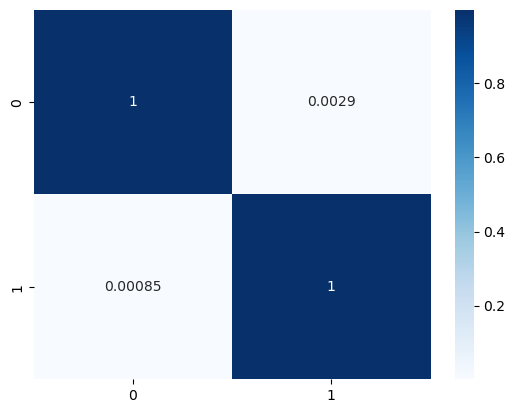

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


The accuracy score is 0.9977465846673865
 The recall score is 0.996973709097787
 The f1 score is 0.9977285633162976
 The ROC AUC score is 0.9977529388379384

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99499997 0.98499991 0.98499991 1.         1.        ]

Mean cross validation score: 0.9929999562497265



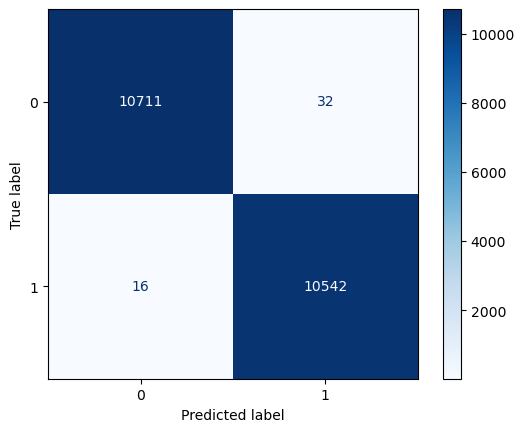

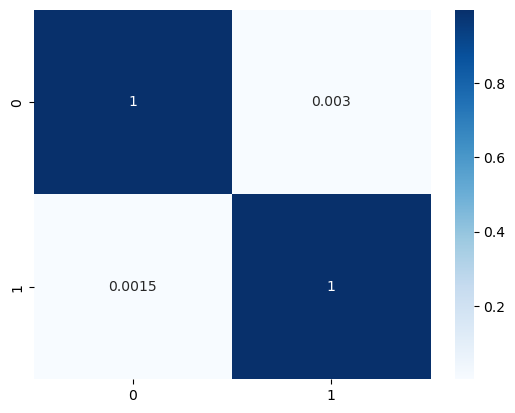

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9952584385709591
 The recall score is 0.9917238784914888
 The f1 score is 0.9952338256807135
 The ROC AUC score is 0.995288662880292

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     10743
           1       0.99      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.98499991 0.97999987 0.96999981 0.98999994 0.985     ]

Mean cross validation score: 0.981999906249414



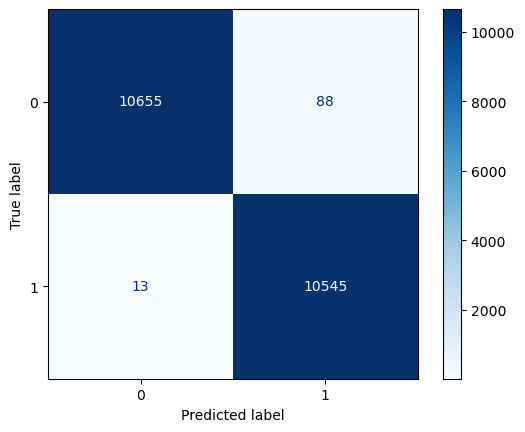

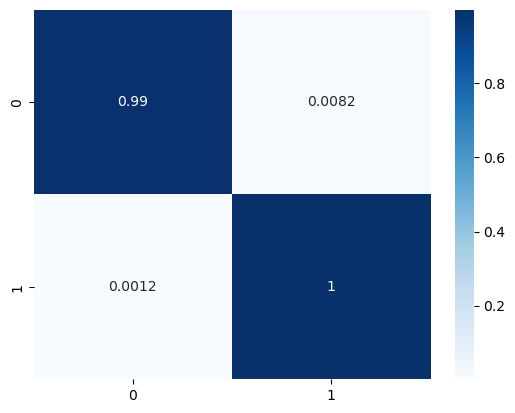

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### Imbalanced data

In [47]:
# 11 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df.shape

(578127, 12)

In [48]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

X_train.shape

(462501, 11)

##### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 11)

The accuracy score is 0.6463944095618632
 The recall score is 0.20618957014716732
 The f1 score is 0.3418858448958568
 The ROC AUC score is 0.8053158867112356

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.61      0.76    105006
           1       0.21      1.00      0.34     10620

    accuracy                           0.65    115626
   macro avg       0.60      0.81      0.55    115626
weighted avg       0.93      0.65      0.72    115626


Cross validation score: [-3.30652653 -3.1239705  -3.21244642 -3.09899995 -3.23632989]

Mean cross validation score: -3.1956546587780874



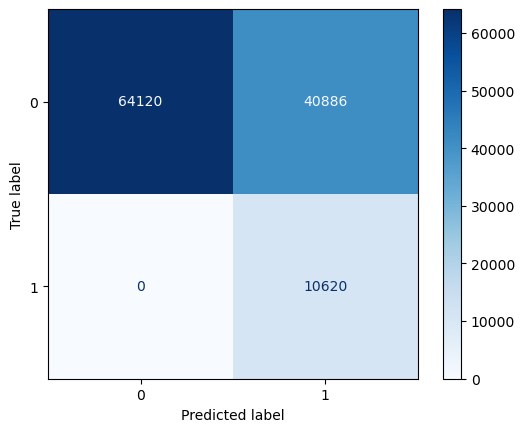

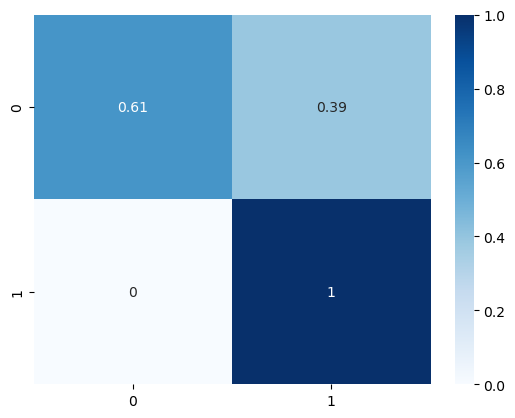

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9949146385760989
 The recall score is 0.9788087056128293
 The f1 score is 0.9721274175199089
 The ROC AUC score is 0.9817112791294896

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      0.97      0.97     10620

    accuracy                           0.99    115626
   macro avg       0.99      0.98      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.91620379 0.9311674  0.94924763 0.8925244  0.910437  ]

Mean cross validation score: 0.9199160454657015



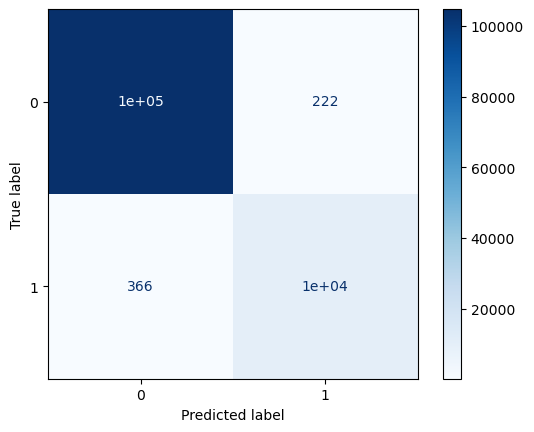

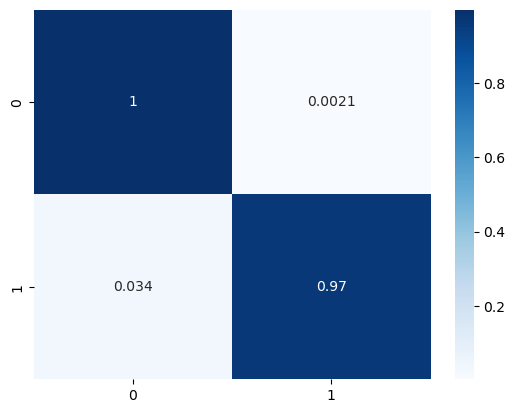

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9998356770968467
 The recall score is 0.9988705882352941
 The f1 score is 0.9991056719228054
 The ROC AUC score is 0.9996132935529861

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



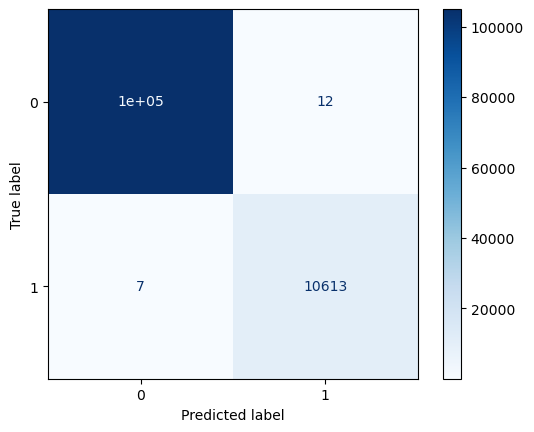

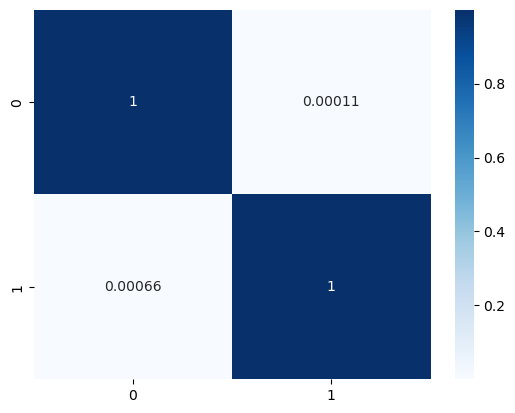

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9986767682009237
 The recall score is 0.9884274381707886
 The f1 score is 0.9928286852589642
 The ROC AUC score is 0.9980442091498458

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99401456 0.98503639 0.98805827 0.96716023 0.97910197]

Mean cross validation score: 0.9826742829912597



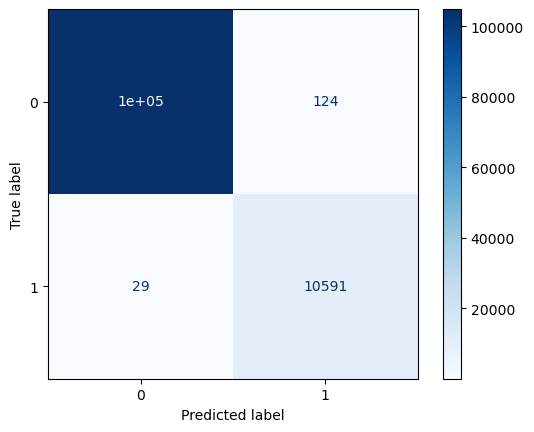

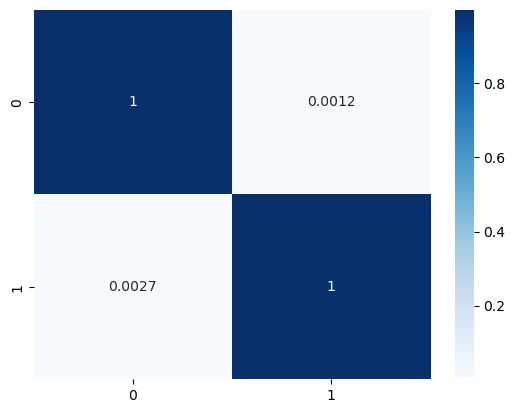

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9997924342275959
 The recall score is 0.9984007525870179
 The f1 score is 0.9988705882352941
 The ROC AUC score is 0.9995894853896431

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



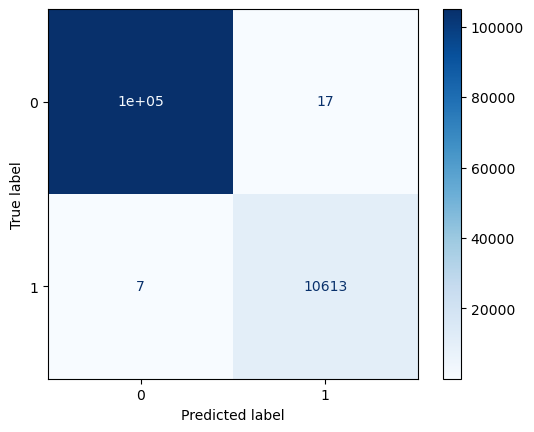

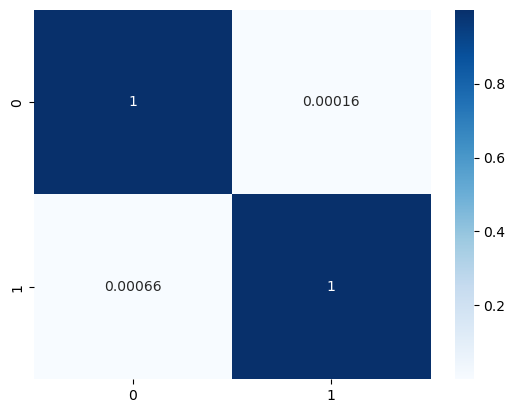

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9998616228183973
 The recall score is 0.9991527019393711
 The f1 score is 0.9992467752565671
 The ROC AUC score is 0.9996275784509919

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



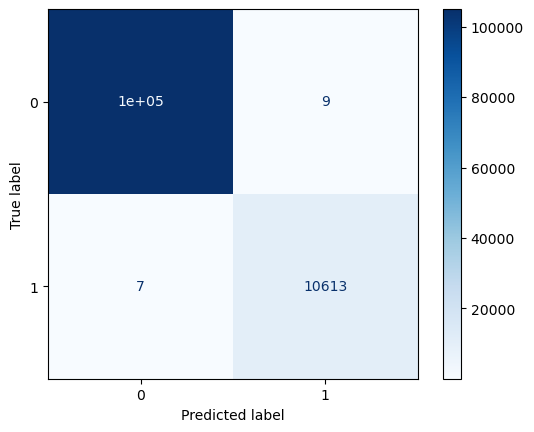

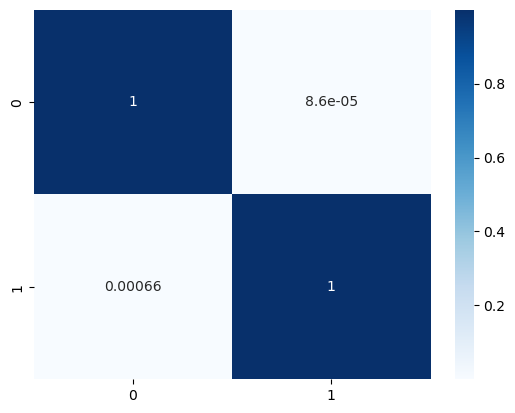

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.3075 val_loss=0.0000 scale=32.0000 norm=64.0000
The accuracy score is 0.9992302769273347
 The recall score is 0.9929781855631495
 The f1 score is 0.9958217924041125
 The ROC AUC score is 0.9989837438398732

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=32.0000 norm=64.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=16.0000 norm=32.0000
Cross validation score: [0.99401456 0.98802911 0.99402913 0.96716023 0.98507283]

Mean cross validation 

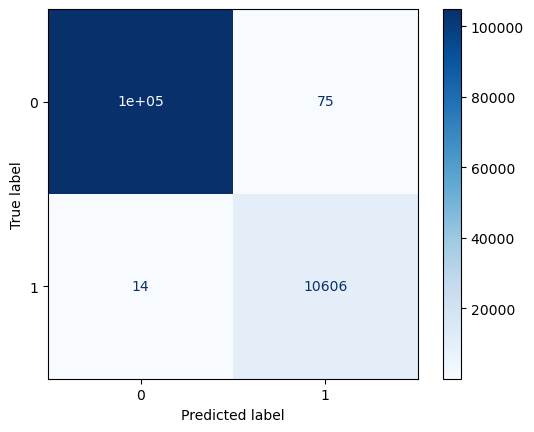

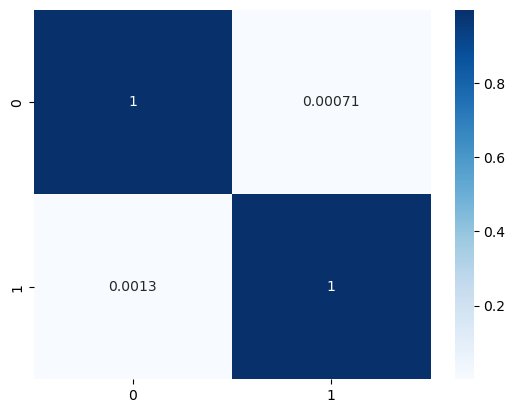

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.998642173905523
 The recall score is 0.9942371280113368
 The f1 score is 0.992596085828814
 The ROC AUC score is 0.9951897663959154

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      0.99      0.99     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.98204367 0.97905095 0.98507283 0.95223307 0.96716023]

Mean cross validation score: 0.9731121503013679



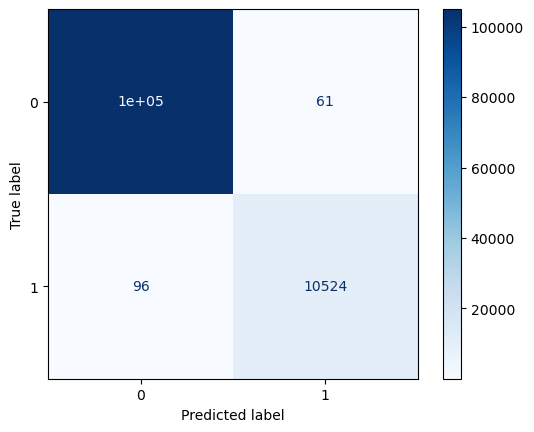

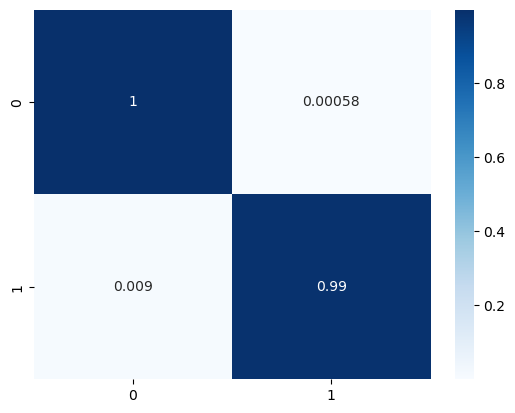

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

##### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 11)

The accuracy score is 0.6587878158891599
 The recall score is 0.21198681450404555
 The f1 score is 0.34976514215080345
 The ROC AUC score is 0.8117584322058111

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77    105006
           1       0.21      1.00      0.35     10620

    accuracy                           0.66    115626
   macro avg       0.61      0.81      0.56    115626
weighted avg       0.93      0.66      0.73    115626


Cross validation score: [-3.17553843 -2.99076763 -3.22902241 -2.78229469 -3.33325888]

Mean cross validation score: -3.1021764075443454



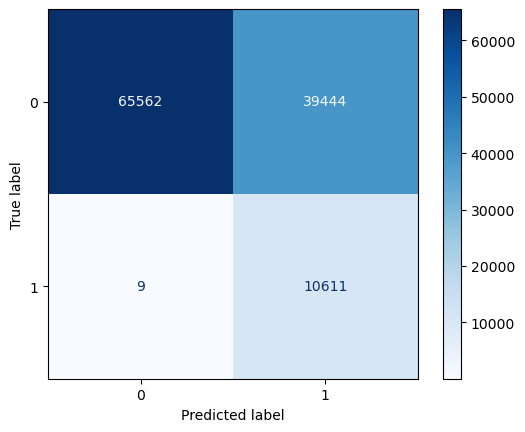

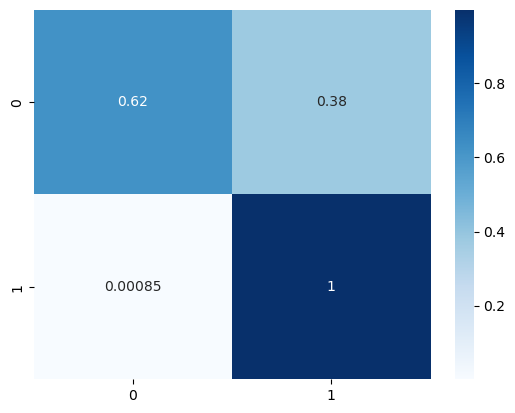

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9831439295660146
 The recall score is 0.9190913484775254
 The f1 score is 0.9070355354161698
 The ROC AUC score is 0.9436604644921555

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    105006
           1       0.92      0.90      0.91     10620

    accuracy                           0.98    115626
   macro avg       0.95      0.94      0.95    115626
weighted avg       0.98      0.98      0.98    115626


Cross validation score: [0.78896196 0.83619984 0.73196337 0.64261782 0.61283598]

Mean cross validation score: 0.7225157924118664



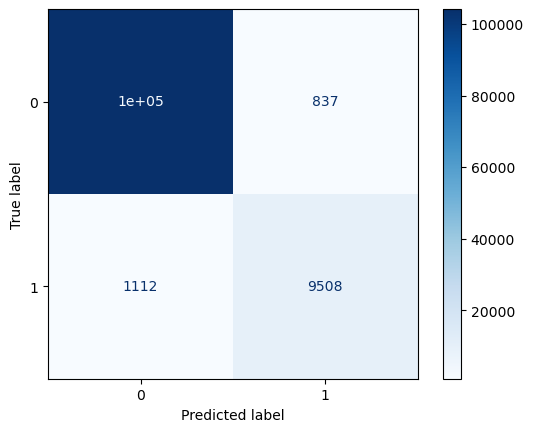

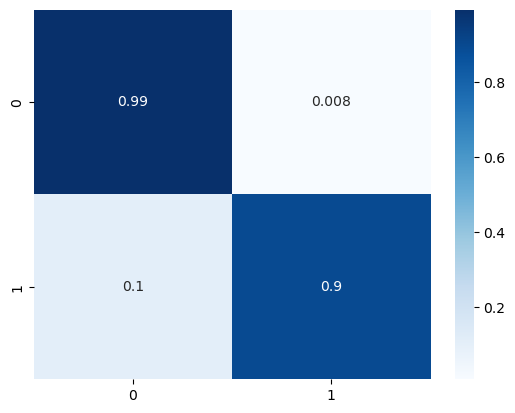

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9994810855689896
 The recall score is 0.9972687888491242
 The f1 score is 0.9971748752236557
 The ROC AUC score is 0.9984024022947949

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.95532723 0.98510908]

Mean cross validation score: 0.9880872608145335



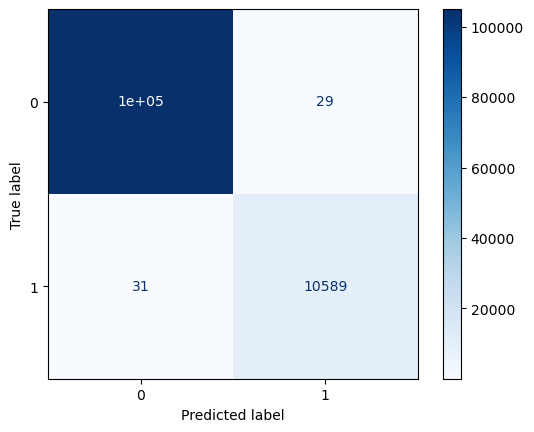

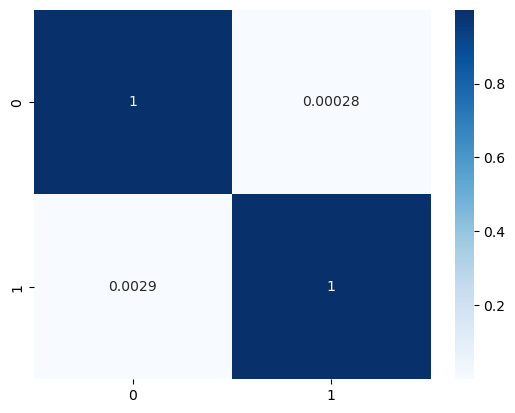

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9989016311210281
 The recall score is 0.9908316961362148
 The f1 score is 0.9940400769627856
 The ROC AUC score is 0.9981680115992296

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.93970342 0.98510908 0.9404363  0.95532723 0.95532723]

Mean cross validation score: 0.9551806504756326



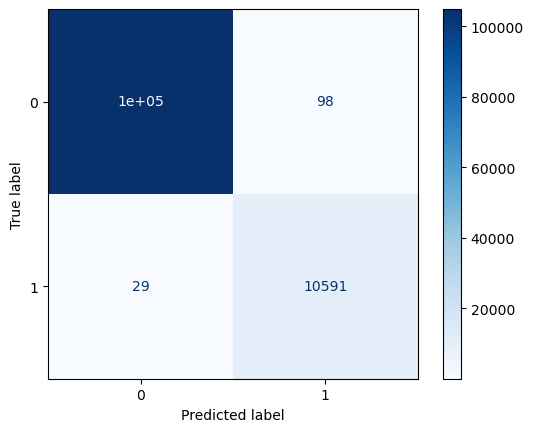

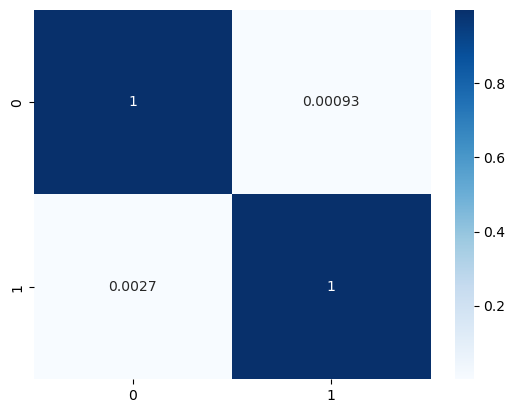

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9996454084721429
 The recall score is 0.9981165834824371
 The f1 score is 0.9980695889636989
 The ROC AUC score is 0.998916066781656

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         0.95532723 0.97021815 0.98510908]

Mean cross validation score: 0.9821308912218003



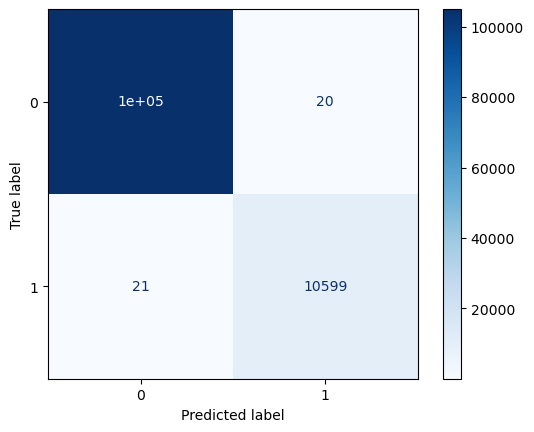

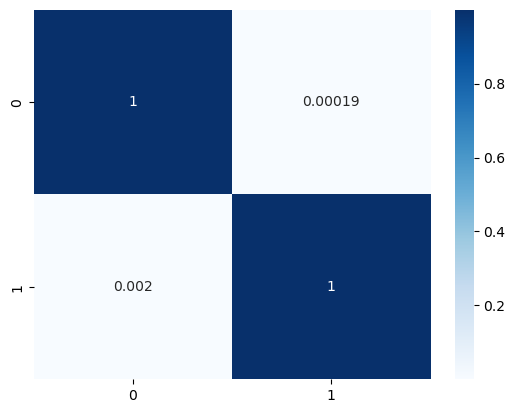

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9995416255859408
 The recall score is 0.9975515585271683
 The f1 score is 0.9975045906116107
 The ROC AUC score is 0.998605011109938

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         1.         1.         0.95532723 0.97021815]

Mean cross validation score: 0.985109076018167



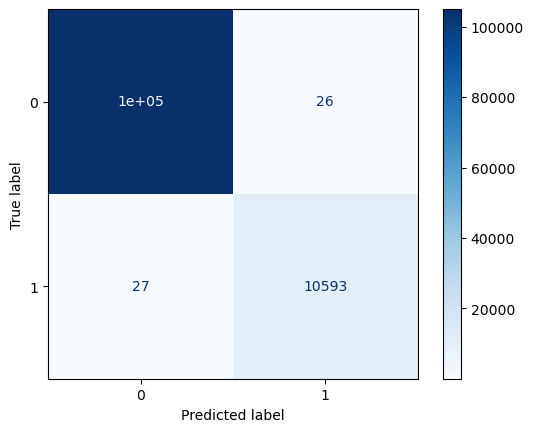

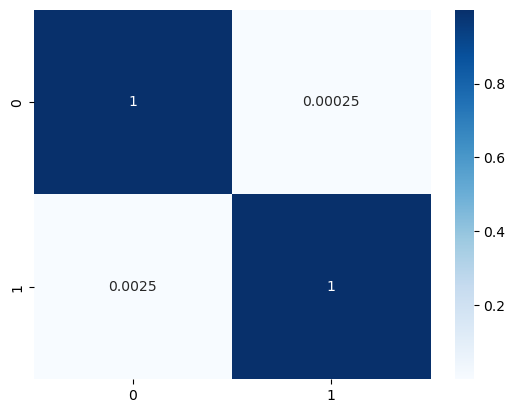

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.3077 val_loss=0.0000 scale=16.0000 norm=32.0000
The accuracy score is 0.9987805510871257
 The recall score is 0.9891700121370554
 The f1 score is 0.9933899020205335
 The ROC AUC score is 0.9982706261283321

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


[iter 0] loss=0.3083 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=32.0000 norm=64.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=32.0000 norm=64.0000
Cross validation score: [1.         0.98510908 0.95532723 0.97021815 0.95532723]

Mean cross validation 

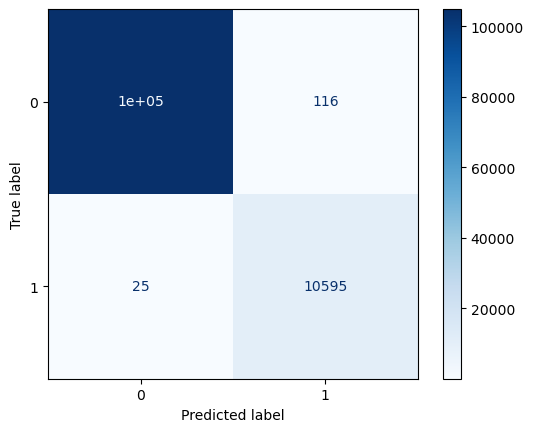

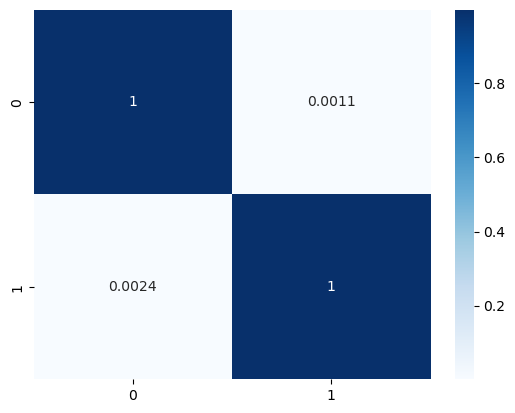

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9941449155034335
 The recall score is 0.9791807228915662
 The f1 score is 0.9677542271969517
 The ROC AUC score is 0.9772671558934862

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      0.96      0.97     10620

    accuracy                           0.99    115626
   macro avg       0.99      0.98      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.90955512 1.         0.9404363  0.85109076 0.86598168]

Mean cross validation score: 0.9134127745370659



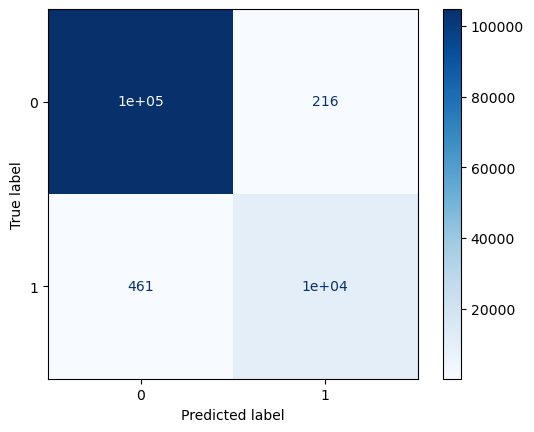

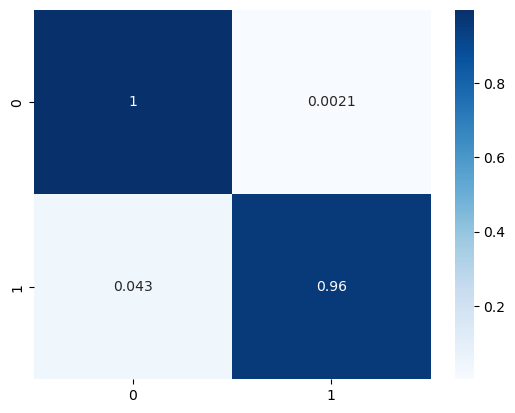

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

## 15 features

### SMOTE

In [2]:
# 15 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/1er Semestre/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
# df = dp.OverallProcessor(df).smote()
# df.shape
df

absolute_magnitude_h  is_hazardous  \
0                      10.41         False   
1                      10.41         False   
2                      10.41         False   
3                      10.41         False   
4                      10.41         False   
...                      ...           ...   
578122                 27.20         False   
578123                 27.20         False   
578124                 27.20         False   
578125                 24.40         False   
578126                 24.70         False   

       relative_velocity.kilometers_per_hour miss_distance.kilometers  \
0                           20083.0290749201       47112732.928149391   
1                           15820.1671985367       70533232.893794475   
2                           17340.4224662258        74687814.59975122   
3                            16545.797587763       53823292.394218643   
4                           21314.9467227704       26040971.835879446   
...                                      ...                      ...   
578122                       64049.911353063       55282851.373088847   
578123                      77378.0309800207       72717145.716631047   
578124                      52630.8755216234       60176184.431457778   
578125                       37385.846126019       14406560.897167653   
578126                      27254.9622379911       11215502.674719137   

        orbit_uncertainty  minimum_orbit_intersection  \
0                     0.0                    0.150230   
1                     0.0                    0.150230   
2                     0.0                    0.150230   
3                     0.0                    0.150230   
4                     0.0                    0.150230   
...                   ...                         ...   
578122                7.0                    0.010702   
578123                7.0                    0.010702   
578124                7.0                    0.010702   
578125                8.0                    0.021228   
578126                8.0                    0.074547   

        jupiter_tisserand_invariant  eccentricity  semi_major_axis  \
0                             4.582      0.222691         1.458181   
1                             4.582      0.222691         1.458181   
2                             4.582      0.222691         1.458181   
3                             4.582      0.222691         1.458181   
4                             4.582      0.222691         1.458181   
...                             ...           ...              ...   
578122                        7.181      0.286677         0.808391   
578123                        7.181      0.286677         0.808391   
578124                        7.181      0.286677         0.808391   
578125                        3.239      0.586524         2.442817   
578126                        3.577      0.496382         2.094172   

        inclination  ascending_node_longitude  perihelion_distance  \
0         10.827726                304.274344             1.133458   
1         10.827726                304.274344             1.133458   
2         10.827726                304.274344             1.133458   
3         10.827726                304.274344             1.133458   
4         10.827726                304.274344             1.133458   
...             ...                       ...                  ...   
578122     9.746538                 37.258020             0.576644   
578123     9.746538                 37.258020             0.576644   
578124     9.746538                 37.258020             0.576644   
578125     2.563493                192.217433             1.010046   
578126     7.511947                 35.576023             1.054663   

        perihelion_argument  aphelion_distance  perihelion_time  mean_anomaly  
0                178.910291           1.782905     2.460446e+06     86.667551  
1                178.910291           1.782905     

In [17]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

y_train

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
xcols = df.columns.drop('is_hazardous')
ycols = ['is_hazardous']

X_train = pd.DataFrame(X_train, columns=xcols)
y_train = pd.DataFrame(y_train, columns=ycols)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

train = pd.concat([X_train, y_train], axis=1)

X_test = pd.DataFrame(X_test, columns=xcols)
y_test = pd.DataFrame(y_test, columns=ycols)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

test = pd.concat([X_test, y_test], axis=1)

train.head()

absolute_magnitude_h  relative_velocity.kilometers_per_hour  \
0             -0.926049                              -0.370531   
1              0.385032                              -0.835229   
2             -0.505961                              -0.968121   
3              1.296352                               0.704946   
4              1.187943                              -0.373106   

   miss_distance.kilometers  orbit_uncertainty  minimum_orbit_intersection  \
0                 -0.438853          -0.979623                   -0.061144   
1                 -0.852371          -1.334569                   -0.757227   
2                 -0.109938           0.440159                    1.232034   
3                  0.586332           0.795105                   -0.773003   
4                 -0.905511           0.440159                   -0.685489   

   jupiter_tisserand_invariant  eccentricity  semi_major_axis  inclination  \
0                    -0.228397      0.848777        -0.100196    -0.727502   
1                    -0.797776      0.000690         0.384871    -1.048646   
2                    -1.621857      0.926817         1.630222    -0.263794   
3                     0.020074     -0.804505        -0.185899    -1.113765   
4                     0.876091     -0.335082        -0.538229    -1.008029   

   ascending_node_longitude  perihelion_distance  perihelion_argument  \
0                 -0.883719            -0.778309            -1.517024   
1                  1.610980             0.937975             1.465893   
2                  0.272439             1.572717            -0.366149   
3                  1.324818             0.563440            -1.052922   
4                 -0.754775            -0.589041            -1.441668   

   aphelion_distance  perihelion_time  mean_anomaly  is_hazardous  
0           0.030109         0.489833      0.834758             0  
1           0.239847         0.039889     -1.414517             0  
2           1.431854         0.002841     -1.510652             0  
3          -0.291985         0.407033      1.022429             0  
4          -0.460643        -0.163213     -0.142718             0

In [19]:
print(X_train.shape, y_train.shape)

(462501, 15) (462501, 1)


In [20]:
X_train, y_train = dp.OverallProcessor(train).smote2(X_train, y_train)

print(X_train.shape, y_train.shape)

(839740, 15) (839740, 1)


#### models

The accuracy score is 0.6564613495234636
 The recall score is 0.21095705375233403
 The f1 score is 0.34841376595256063
 The ROC AUC score is 0.8108584271374969

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77    105006
           1       0.21      1.00      0.35     10620

    accuracy                           0.66    115626
   macro avg       0.61      0.81      0.56    115626
weighted avg       0.93      0.66      0.73    115626


Cross validation score: [0.24983924 0.24976779 0.25086336 0.25160169 0.24760045]

Mean cross validation score: 0.24993450353680896



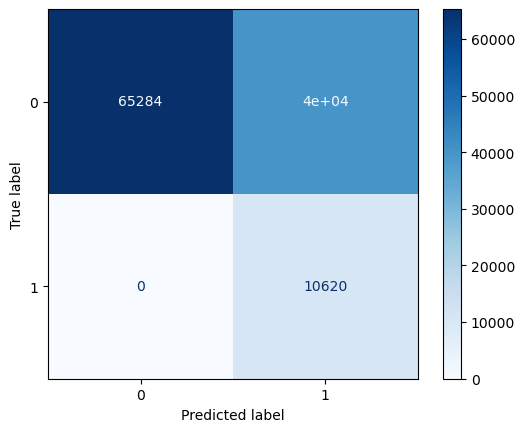

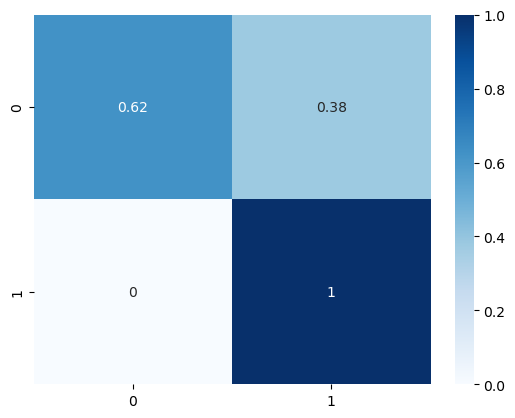

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9953846373677667
 The recall score is 0.9947779933797511
 The f1 score is 0.9953886787065458
 The ROC AUC score is 0.9953844760915619

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104948
           1       0.99      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.976      0.977      0.984      0.975      0.97599999]

Mean cross validation score: 0.9775999987999997



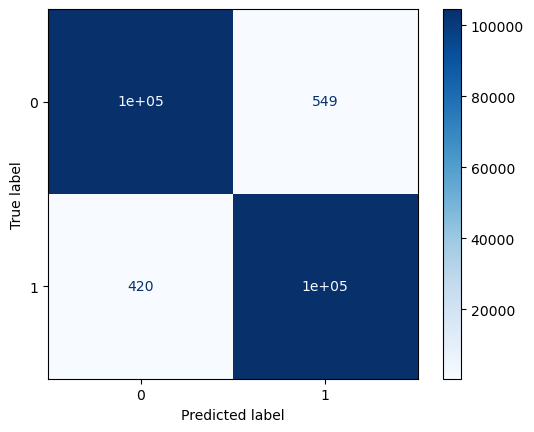

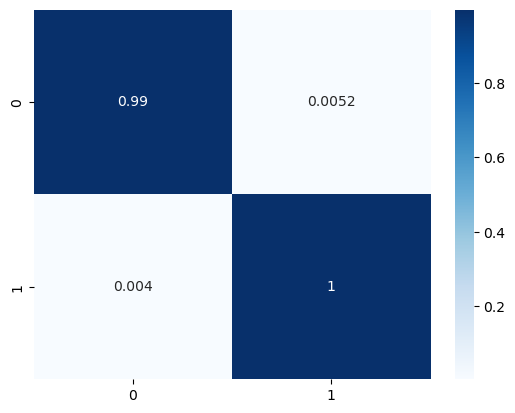

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9997142190320598
 The recall score is 0.9999333060205609
 The f1 score is 0.999714231282149
 The ROC AUC score is 0.9997142764088481

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    1.    1.   ]

Mean cross validation score: 0.9986



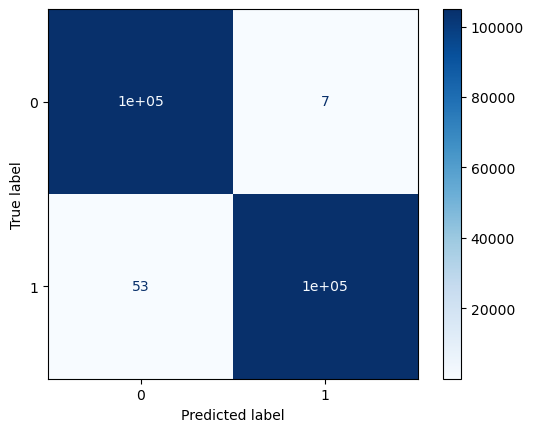

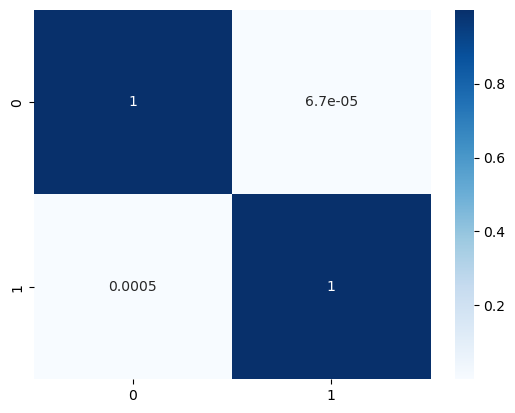

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.996281113244426
 The recall score is 0.9610859728506788
 The f1 score is 0.9801568989386248
 The ROC AUC score is 0.997952497952498

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.96      1.00      0.98     10620

    accuracy                           1.00    115626
   macro avg       0.98      1.00      0.99    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99535571 0.99340272 0.9926644  0.99137828 0.99252149]

Mean cross validation score: 0.9930645199704671



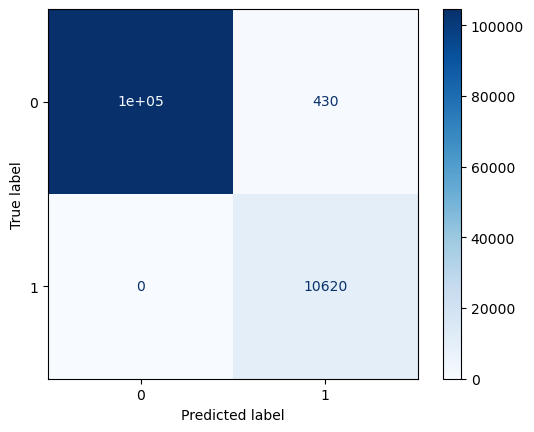

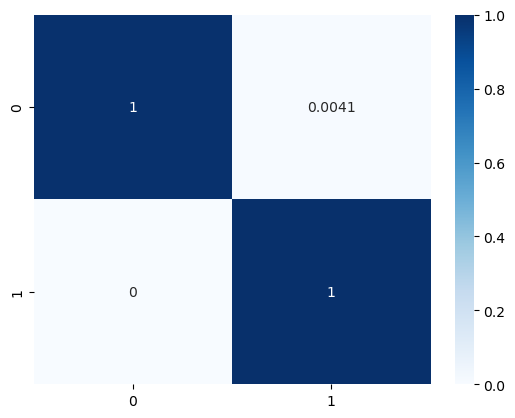

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99995237 1.         1.         1.         0.99997618]

Mean cross validation score: 0.9999857098625764



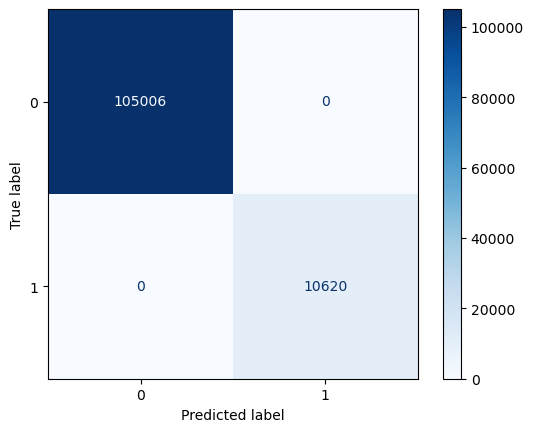

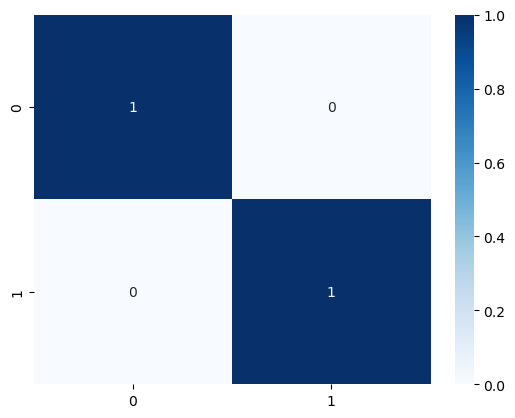

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 1.0
 The recall score is 1.0
 The f1 score is 1.0
 The ROC AUC score is 1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1. 1. 1. 1. 1.]

Mean cross validation score: 1.0



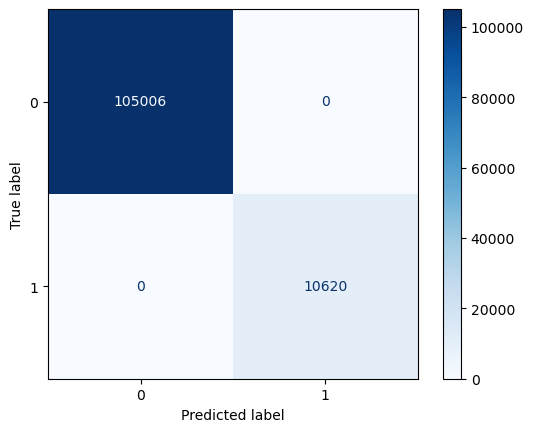

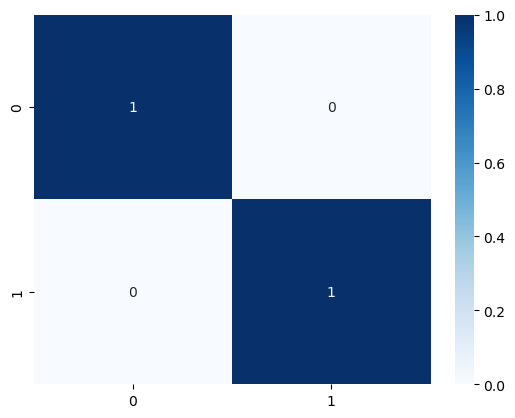

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9991045529671209
 The recall score is 0.9987722821276637
 The f1 score is 0.9991050857784801
 The ROC AUC score is 0.9991044655633214

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.992 0.996 0.998 0.997 0.995]

Mean cross validation score: 0.9955999997499999



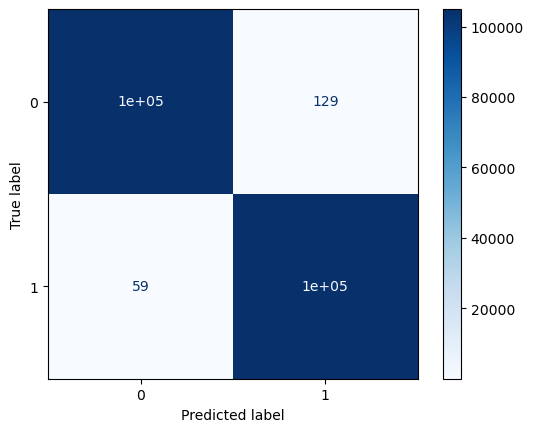

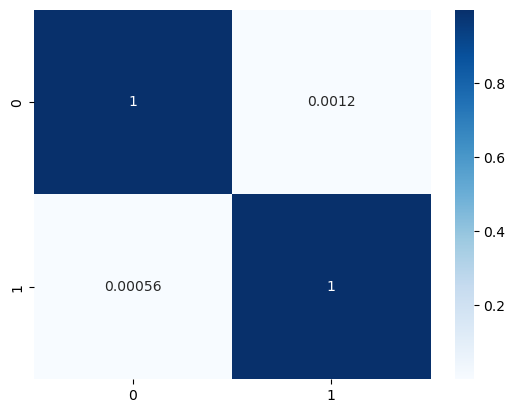

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9991998132897676
 The recall score is 0.9988009934625596
 The f1 score is 0.999200342710267
 The ROC AUC score is 0.9991997084240359

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.991 0.989 0.996 0.995 0.999]

Mean cross validation score: 0.99399999995



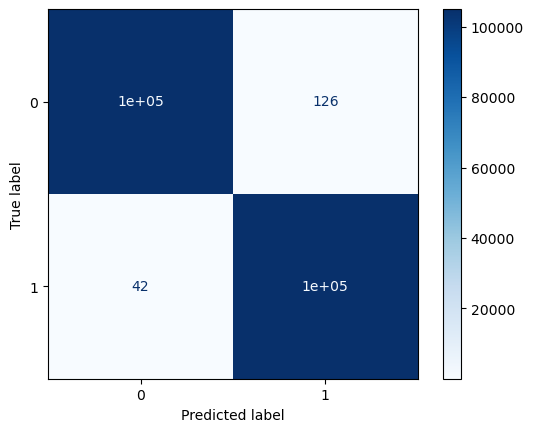

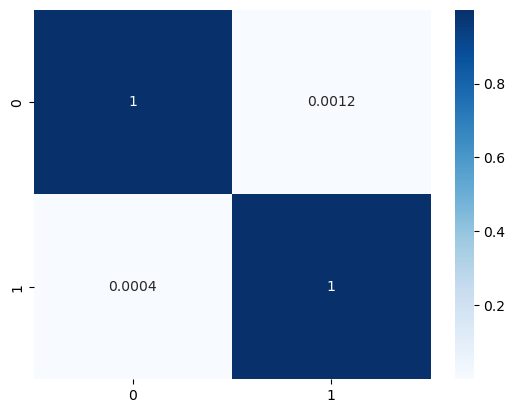

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### ADASYN

In [53]:
# 15 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = dp.OverallProcessor(df).adasyn()
df.shape

(1048269, 16)

In [54]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

X_train.shape

(838615, 15)

#### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 15)

The accuracy score is 0.9224865731157049
 The recall score is 0.875160024077795
 The f1 score is 0.9270283741126074
 The ROC AUC score is 0.9225315763229371

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92    104902
           1       0.88      0.99      0.93    104752

    accuracy                           0.92    209654
   macro avg       0.93      0.92      0.92    209654
weighted avg       0.93      0.92      0.92    209654


Cross validation score: [0.71499886 0.69599932 0.65799923 0.69399931 0.67599927]

Mean cross validation score: 0.6877991977977961



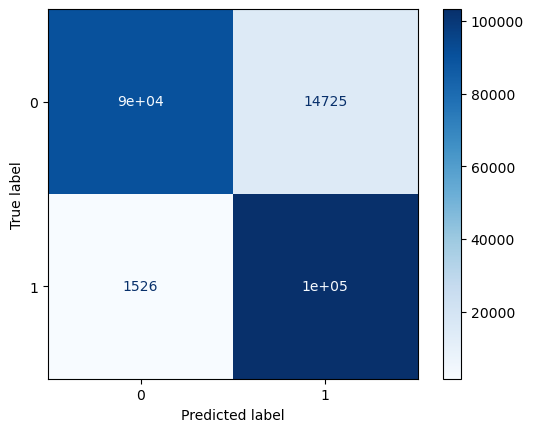

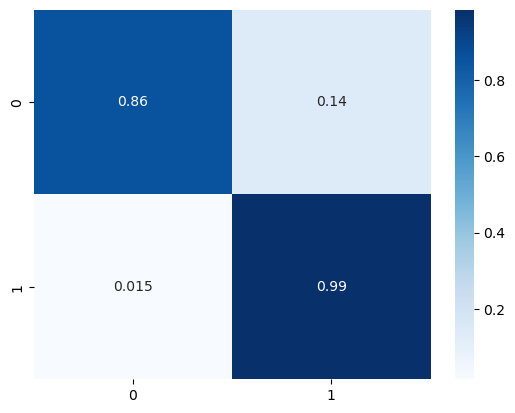

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9953590200997835
 The recall score is 0.9938235769959173
 The f1 score is 0.9953628907348364
 The ROC AUC score is 0.9953601268185757

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104902
           1       0.99      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.97099988 0.96299992 0.97999995 0.97799995 0.97399994]

Mean cross validation score: 0.9731999295498011



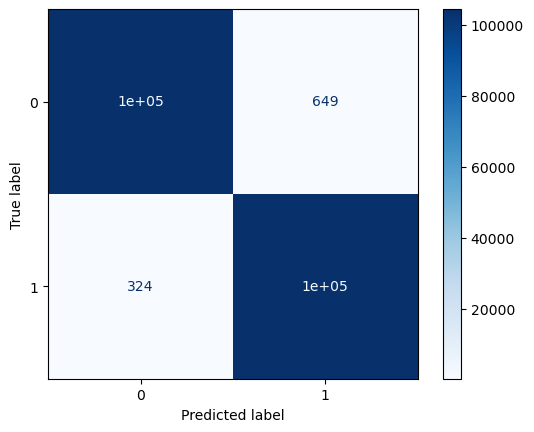

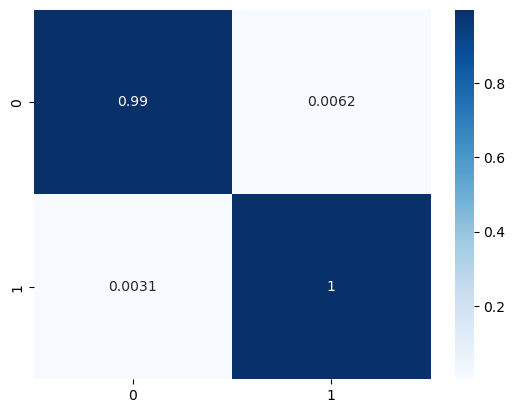

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9998759861486067
 The recall score is 0.9999140762239365
 The f1 score is 0.9998758926184749
 The ROC AUC score is 0.9998759587843387

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         1.         0.999      0.99699999 0.99699999]

Mean cross validation score: 0.9985999968499929



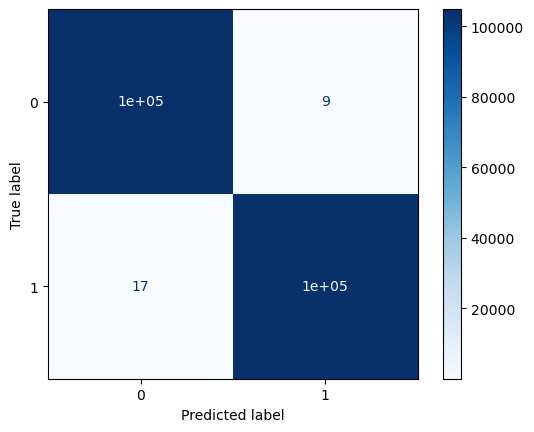

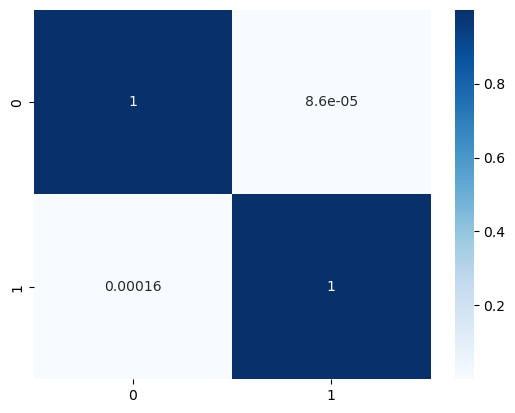

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.998931572972612
 The recall score is 0.9985215284534233
 The f1 score is 0.9989312467197863
 The ROC AUC score is 0.998931865909153

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.98799995 0.998      0.99599999 0.99099998 0.99199998]

Mean cross validation score: 0.9929999800499383



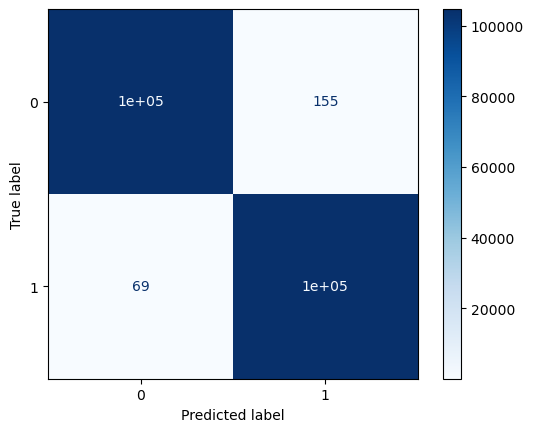

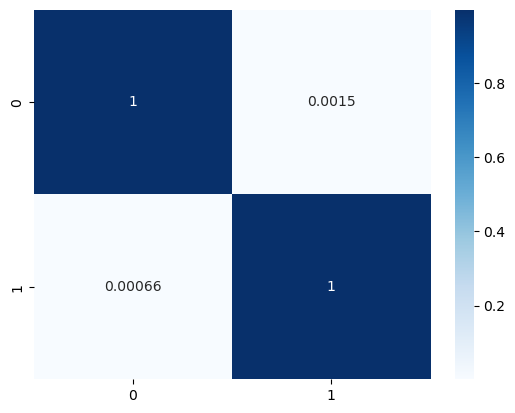

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9997185839526076
 The recall score is 0.999914049144789
 The f1 score is 0.9997183273418218
 The ROC AUC score is 0.9997184438920215

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         1.         0.998      0.99699999 0.99399999]

Mean cross validation score: 0.997799995049989



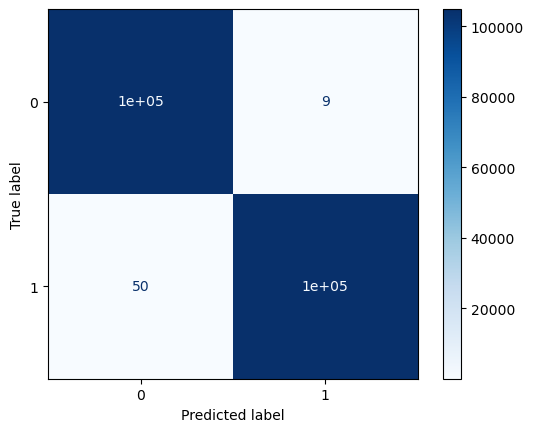

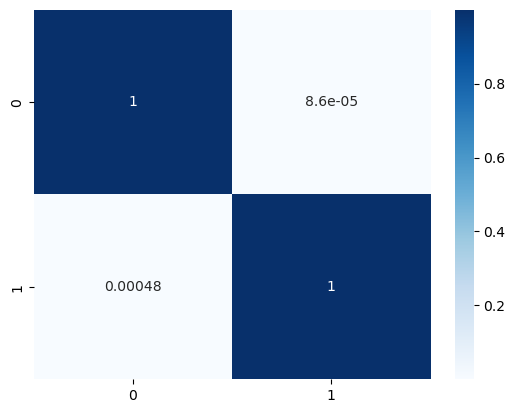

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9997233537161228
 The recall score is 0.9998376747383698
 The f1 score is 0.9997231239259118
 The ROC AUC score is 0.9997232716721501

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         1.         0.998      0.99599999 0.99699999]

Mean cross validation score: 0.9981999959499909



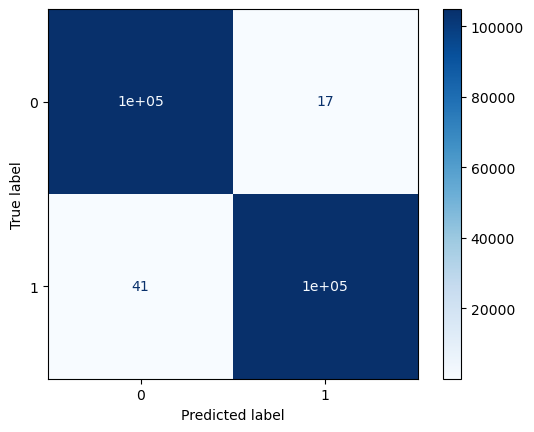

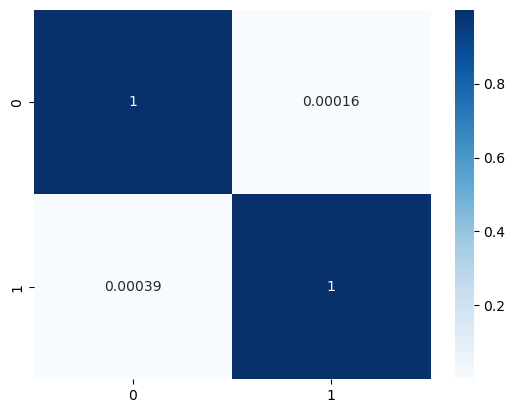

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9992606866551557
 The recall score is 0.9991982055075646
 The f1 score is 0.9992602032293322
 The ROC AUC score is 0.9992607306404871

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.999      0.999      0.99599999 0.99499999 0.99499999]

Mean cross validation score: 0.9967999924499816



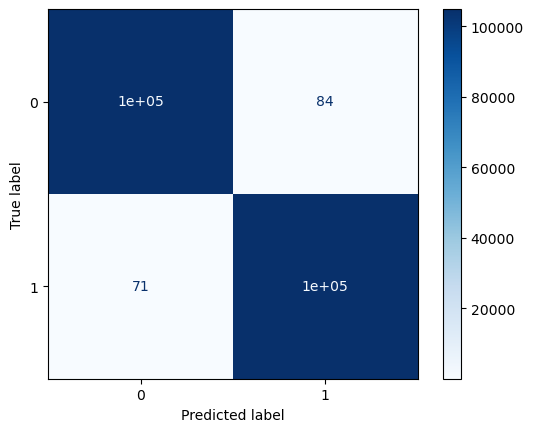

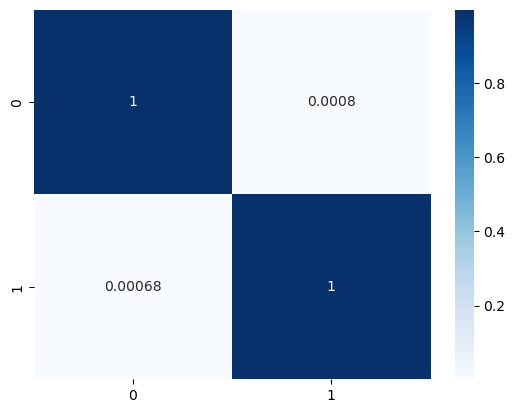

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9991128239861867
 The recall score is 0.9985125574477012
 The f1 score is 0.9991127224156848
 The ROC AUC score is 0.9991132535194419

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.99199997 0.99499999 0.99499999 0.99099998 0.99299998]

Mean cross validation score: 0.9931999818999481



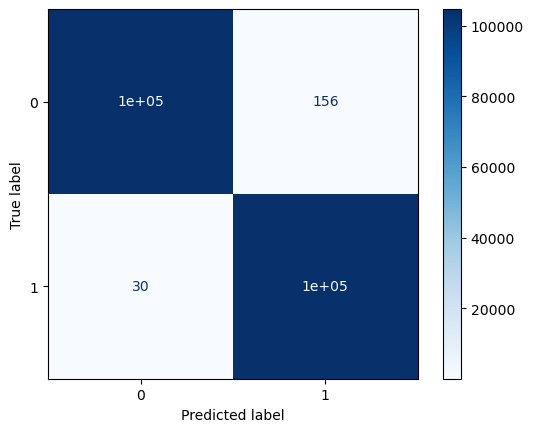

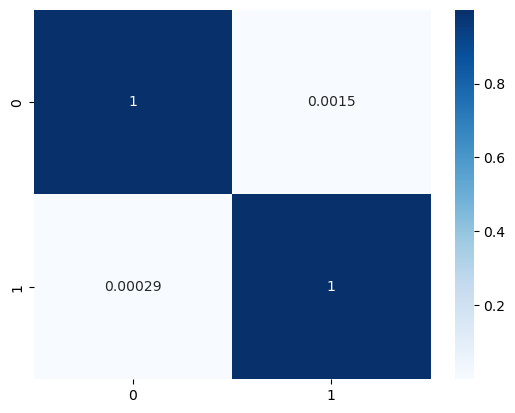

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 15)

The accuracy score is 0.8975025518234806
 The recall score is 0.8569321913286522
 The f1 score is 0.9029355568704859
 The ROC AUC score is 0.8975430580874224

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89    104902
           1       0.86      0.95      0.90    104752

    accuracy                           0.90    209654
   macro avg       0.90      0.90      0.90    209654
weighted avg       0.90      0.90      0.90    209654


Cross validation score: [0.61499759 0.54999719 0.62999769 0.63       0.615     ]

Mean cross validation score: 0.6079984937405858



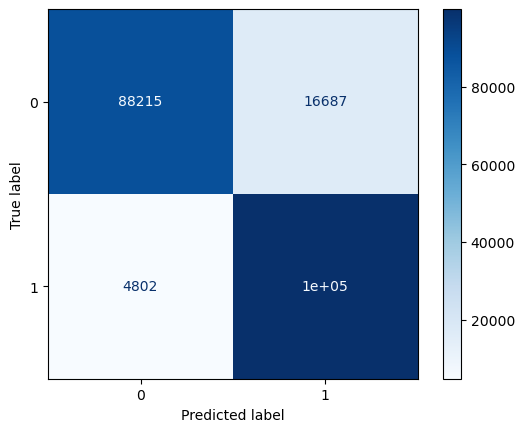

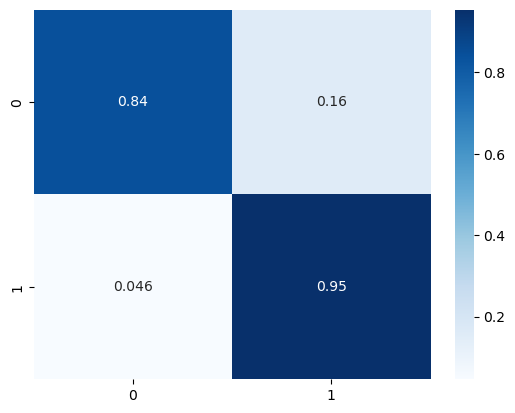

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9815982523586481
 The recall score is 0.9753321398285122
 The f1 score is 0.9817054087119811
 The ROC AUC score is 0.9816029454995019

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    104902
           1       0.98      0.99      0.98    104752

    accuracy                           0.98    209654
   macro avg       0.98      0.98      0.98    209654
weighted avg       0.98      0.98      0.98    209654


Cross validation score: [0.92999956 0.9199995  0.9199995  0.9        0.885     ]

Mean cross validation score: 0.910999712498203



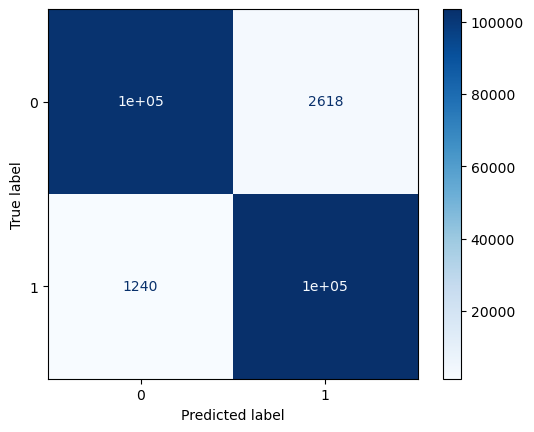

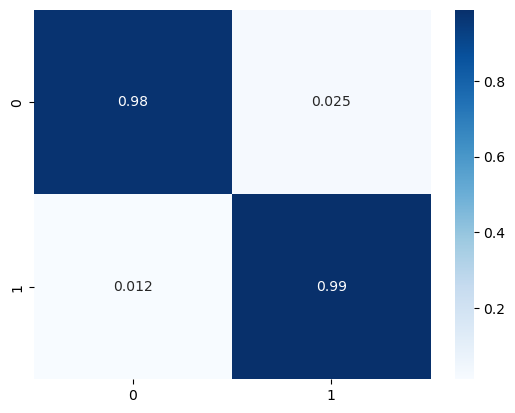

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9993751609795186
 The recall score is 0.9992841530576209
 The f1 score is 0.9993747703116126
 The ROC AUC score is 0.9993752254990385

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         0.99499997 0.99499997 1.         1.        ]

Mean cross validation score: 0.9979999874999219



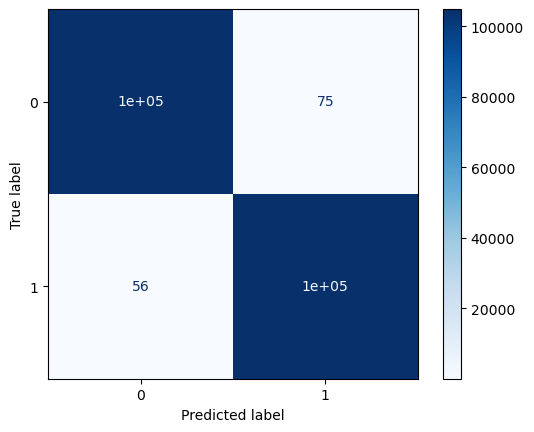

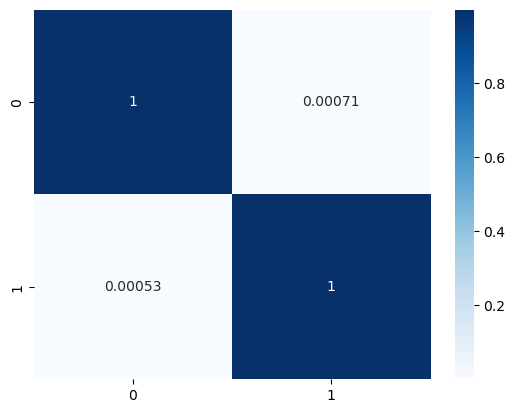

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9982351874994038
 The recall score is 0.996896243121275
 The f1 score is 0.998236297941712
 The ROC AUC score is 0.9982361489487478

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.99499997 0.98499991 0.99499997 0.99       0.995     ]

Mean cross validation score: 0.9919999687498047



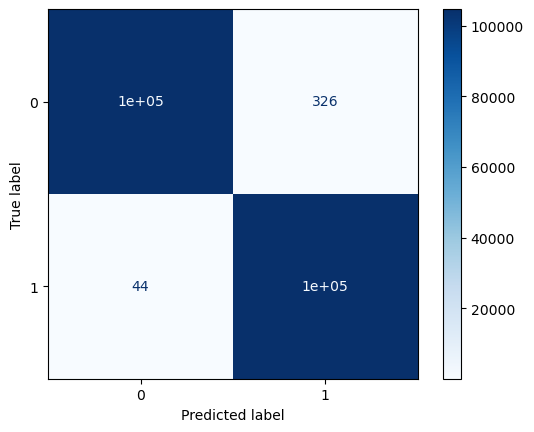

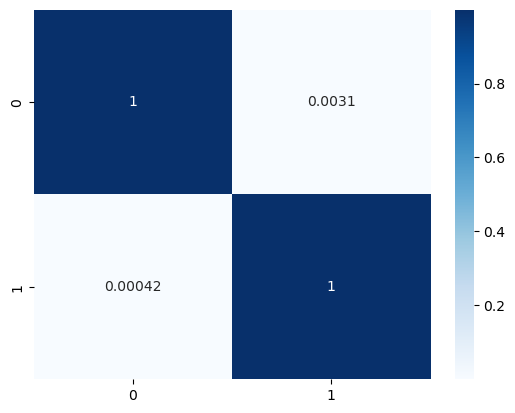

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9994514771957607
 The recall score is 0.9996275605214152
 The f1 score is 0.9994509875063853
 The ROC AUC score is 0.9994513506488385

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         0.98999994 0.99499997 1.         1.        ]

Mean cross validation score: 0.9969999812498826



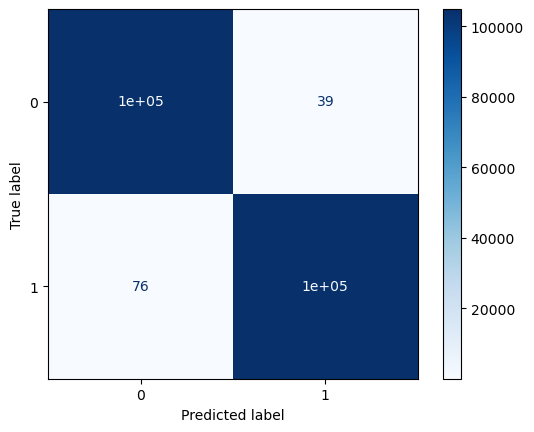

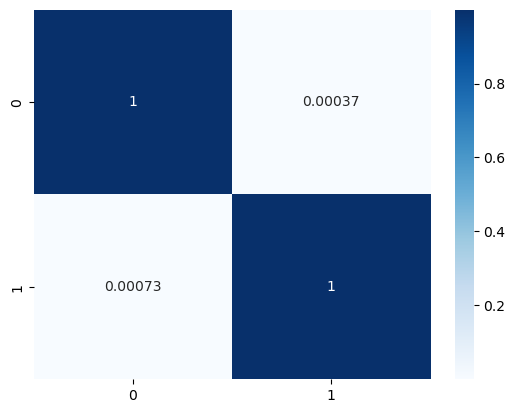

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9993179238173371
 The recall score is 0.9992078262944405
 The f1 score is 0.9993175103924554
 The ROC AUC score is 0.9993180019579512

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         0.99499997 0.99499997 0.99       1.        ]

Mean cross validation score: 0.9959999874999219



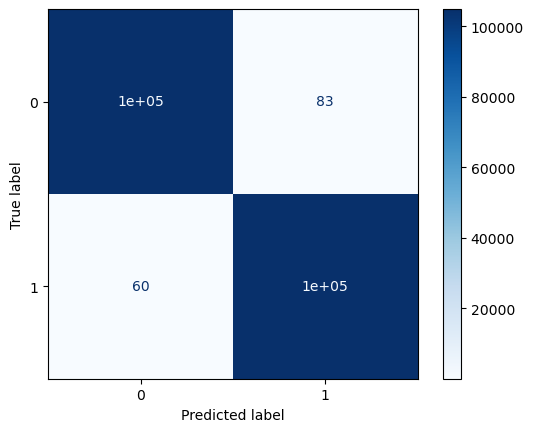

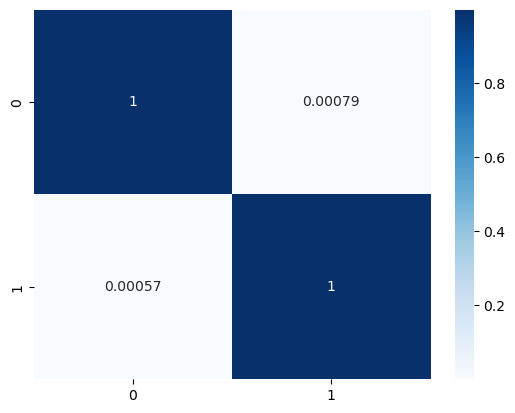

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


The accuracy score is 0.9985166035467962
 The recall score is 0.9979023846073168
 The f1 score is 0.9985164549474558
 The ROC AUC score is 0.9985170430126472

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=512.0000 norm=1024.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [1.                nan 0.99499997 1.         0.985     ]

Mean cross validation score: nan



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/ngboost/ngboost.py", line 250, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ngboost/ngboost.py", line 383, in partial_fit
    grads = D.grad(Y_batch, natural=self.natural_gradient)
      

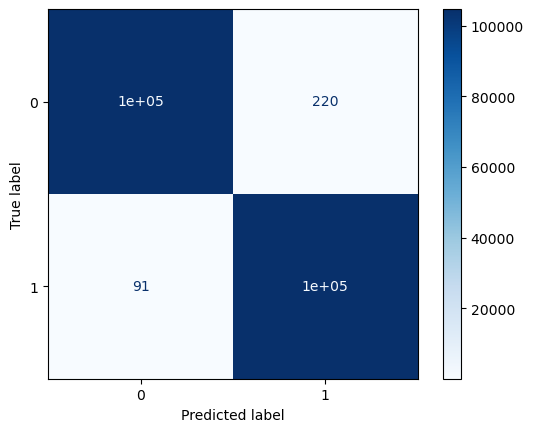

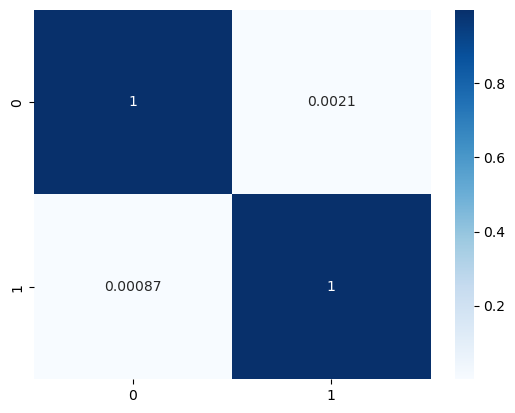

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9952111574308146
 The recall score is 0.9908313305451999
 The f1 score is 0.995228998564898
 The ROC AUC score is 0.9952143423463097

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104902
           1       0.99      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.95999975 0.94999969 0.98499991 0.96       0.95      ]

Mean cross validation score: 0.9609998687491796



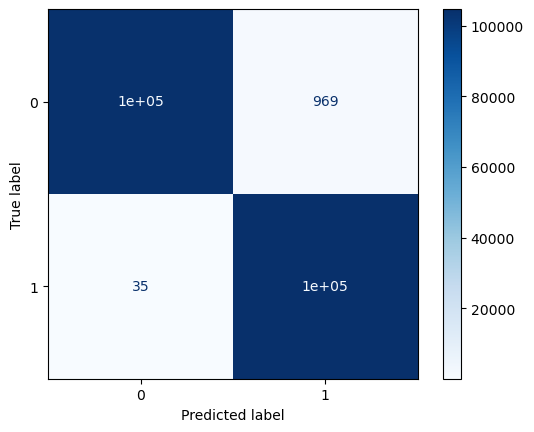

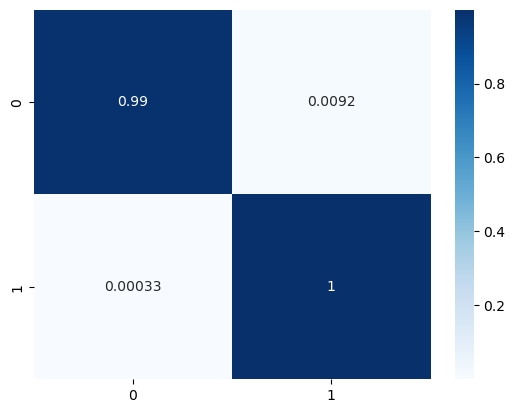

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### Random Under Sampler

In [34]:
# 15 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = dp.OverallProcessor(df).rus()
df.shape

(106502, 16)

In [35]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

X_train.shape

(85201, 15)

#### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 15)

The accuracy score is 0.92150603258063
 The recall score is 0.8815043791859866
 The f1 score is 0.924698252567105
 The ROC AUC score is 0.9219437541032767

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92     10743
           1       0.88      0.97      0.92     10558

    accuracy                           0.92     21301
   macro avg       0.93      0.92      0.92     21301
weighted avg       0.93      0.92      0.92     21301


Cross validation score: [0.65299783 0.68399802 0.6749987  0.64199857 0.66699867]

Mean cross validation score: 0.6641983584415689



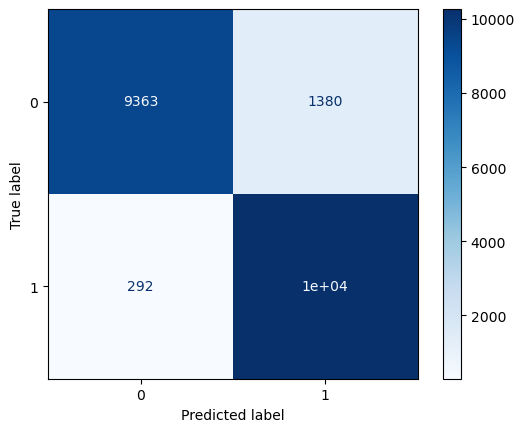

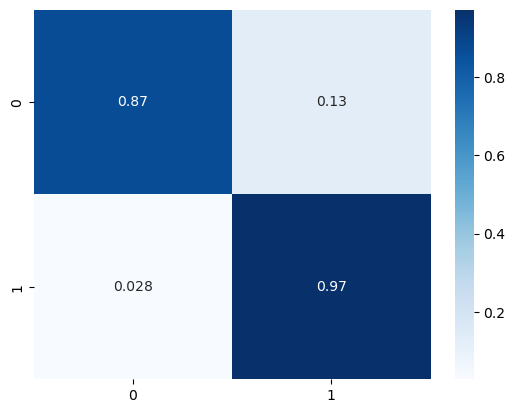

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9952114924181963
 The recall score is 0.9927426955702168
 The f1 score is 0.9951814058956916
 The ROC AUC score is 0.9952323347086435

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     10743
           1       0.99      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.97899987 0.97999987 0.97999992 0.97099988 0.98499994]

Mean cross validation score: 0.9789998975494749



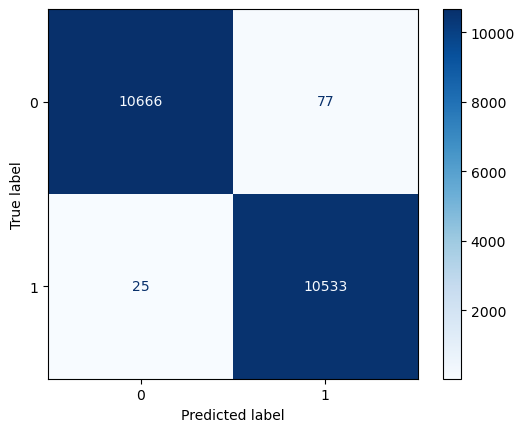

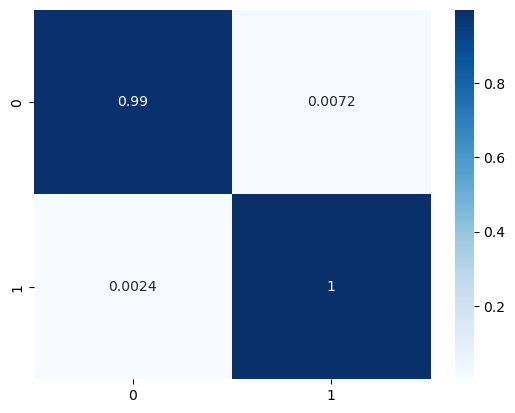

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9997183230834233
 The recall score is 0.9994320333207118
 The f1 score is 0.9997159359909099
 The ROC AUC score is 0.9997207483943032

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99799999 1.         1.         1.         1.        ]

Mean cross validation score: 0.9995999974999844



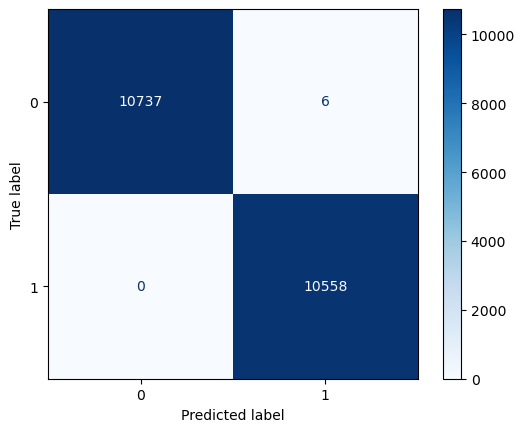

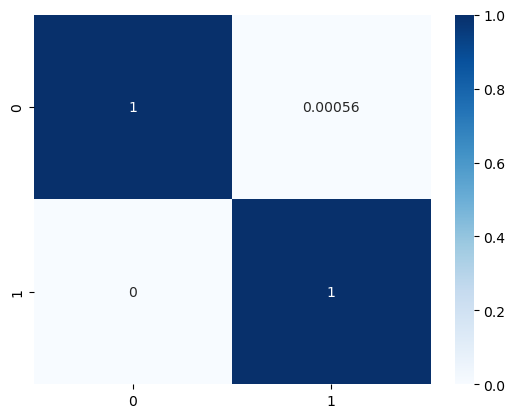

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9983568846533026
 The recall score is 0.9982952931148783
 The f1 score is 0.9983425675995643
 The ROC AUC score is 0.9983571684638343

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99399996 0.99299996 0.98799995 0.99299997 0.98999996]

Mean cross validation score: 0.9915999605498056



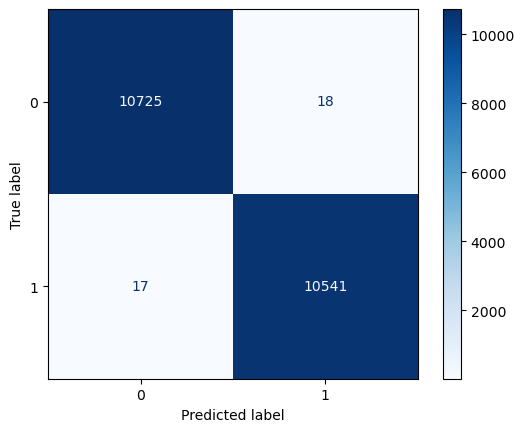

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9993897000140839
 The recall score is 0.9989590233746569
 The f1 score is 0.9993846153846154
 The ROC AUC score is 0.9993933238147629

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99899999 0.99799999 0.99699999 1.         1.        ]

Mean cross validation score: 0.998799993849967



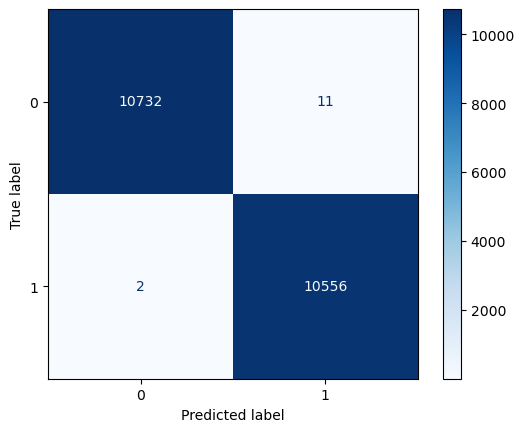

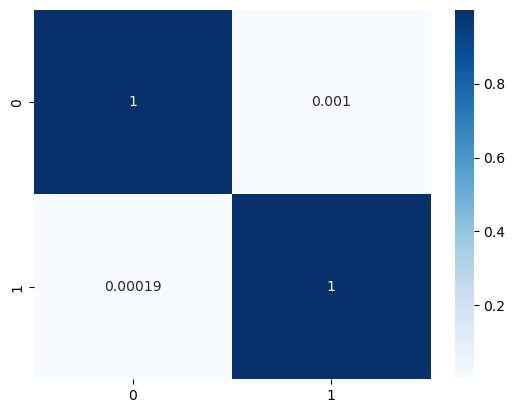

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9996244307778978
 The recall score is 0.9992428544387658
 The f1 score is 0.9996212838477561
 The ROC AUC score is 0.9996276645257377

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.99899999 1.         1.         1.         1.        ]

Mean cross validation score: 0.9997999987499921



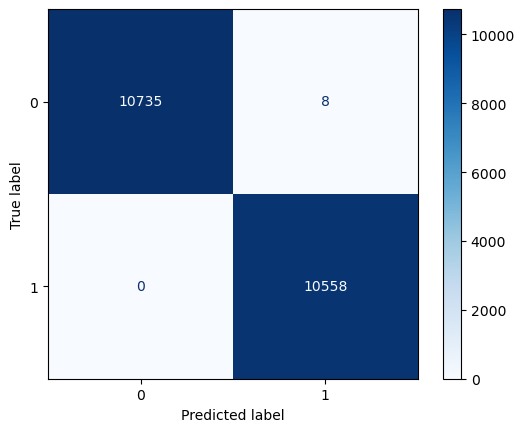

['/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_15.sav']

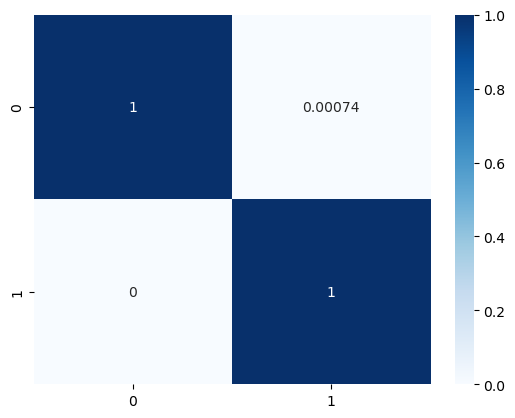

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

dump(ada, '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_15.sav' )

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9989671846392189
 The recall score is 0.9982031397768111
 The f1 score is 0.9989589248533031
 The ROC AUC score is 0.9989736308864371

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99599997 0.99499997 0.99299997 0.99599998 0.99699999]

Mean cross validation score: 0.9953999775498849



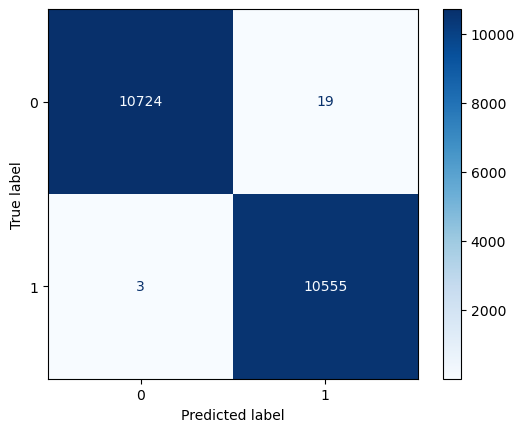

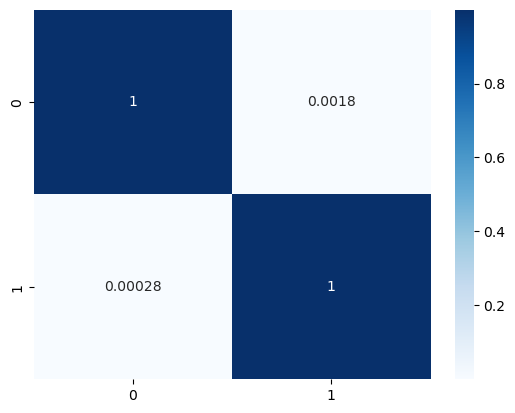

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9991080230975071
 The recall score is 0.9982978723404256
 The f1 score is 0.9991009321913595
 The ROC AUC score is 0.9991148877288465

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99299996 0.99699998 0.99699999 0.99399998 0.99699999]

Mean cross validation score: 0.9955999778998835



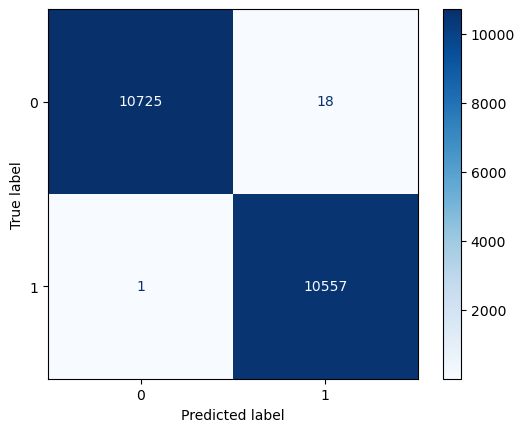

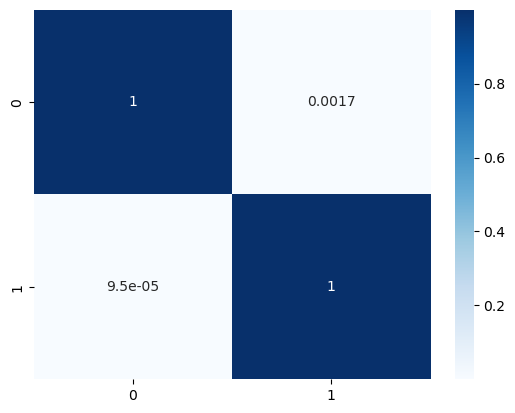

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 15)

The accuracy score is 0.8875639641331393
 The recall score is 0.8599523767528001
 The f1 score is 0.8906242864319314
 The ROC AUC score is 0.8878739429298728

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     10743
           1       0.86      0.92      0.89     10558

    accuracy                           0.89     21301
   macro avg       0.89      0.89      0.89     21301
weighted avg       0.89      0.89      0.89     21301


Cross validation score: [0.58499741 0.57499734 0.53499709 0.50499691 0.555     ]

Mean cross validation score: 0.5509977499859373



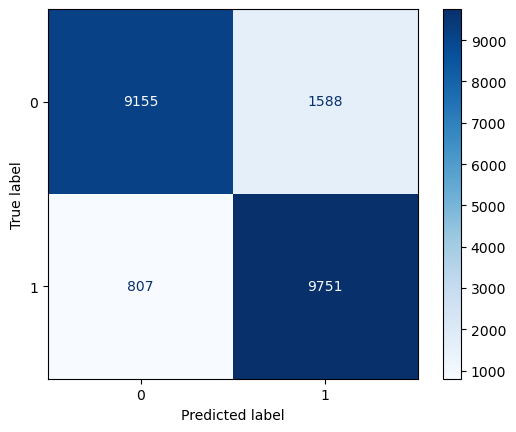

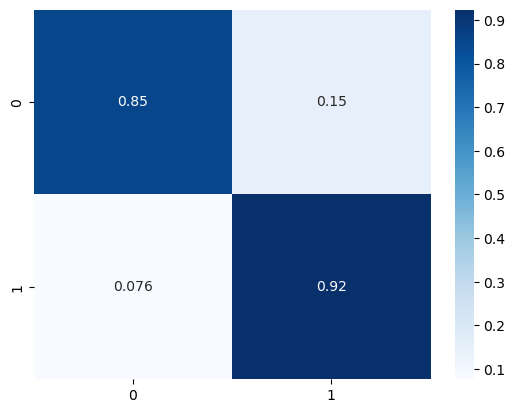

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9819257311863293
 The recall score is 0.9740889178861031
 The f1 score is 0.9819138441302203
 The ROC AUC score is 0.9819940946846148

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     10743
           1       0.97      0.99      0.98     10558

    accuracy                           0.98     21301
   macro avg       0.98      0.98      0.98     21301
weighted avg       0.98      0.98      0.98     21301


Cross validation score: [0.88499928 0.93499959 0.90499941 0.90499941 0.9       ]

Mean cross validation score: 0.9059995374971095



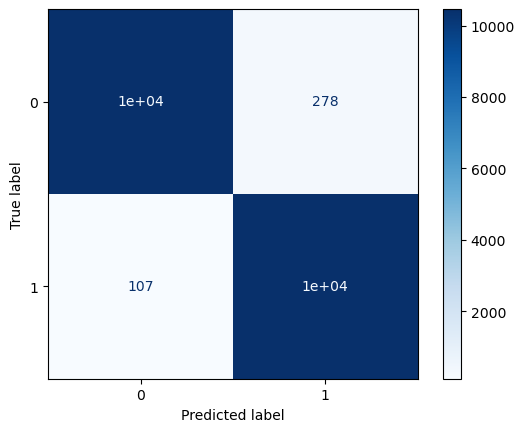

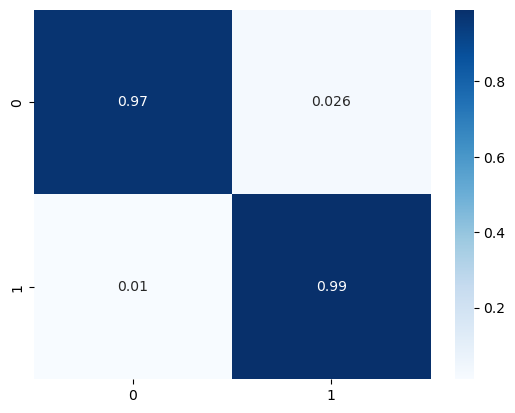

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9985916154171166
 The recall score is 0.9973544973544973
 The f1 score is 0.998581023555009
 The ROC AUC score is 0.9986021109319554

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [1.         0.98499991 0.98999994 1.         1.        ]

Mean cross validation score: 0.9949999687498046



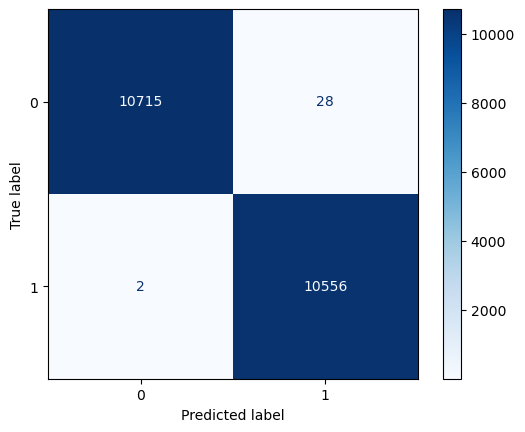

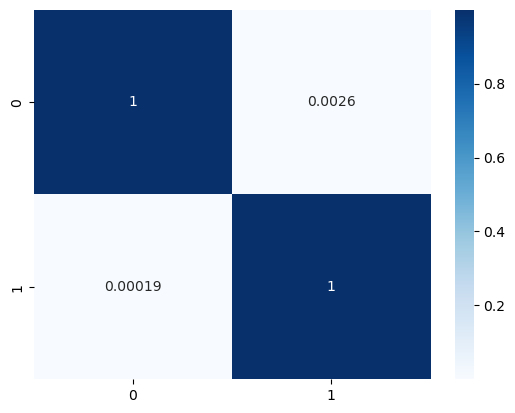

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9968546077648937
 The recall score is 0.995653406406501
 The f1 score is 0.9968308027056431
 The ROC AUC score is 0.9968645644876629

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99499997 0.96999981 0.97499984 1.         0.985     ]

Mean cross validation score: 0.9849999249995312



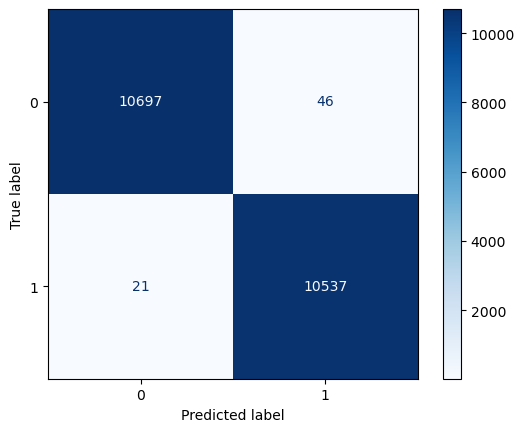

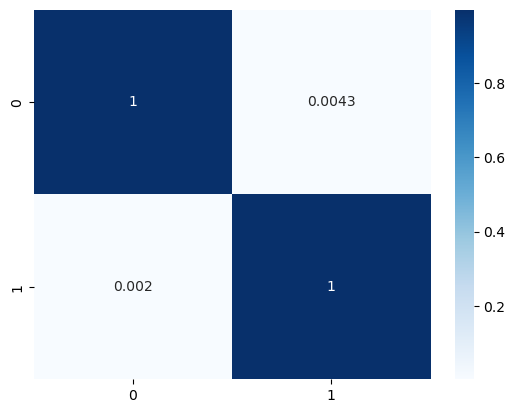

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9988732923336933
 The recall score is 0.9979202117602571
 The f1 score is 0.9988644965934897
 The ROC AUC score is 0.9988813625376521

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99499997 0.98499991 0.98999994 1.         0.99      ]

Mean cross validation score: 0.9919999624997656



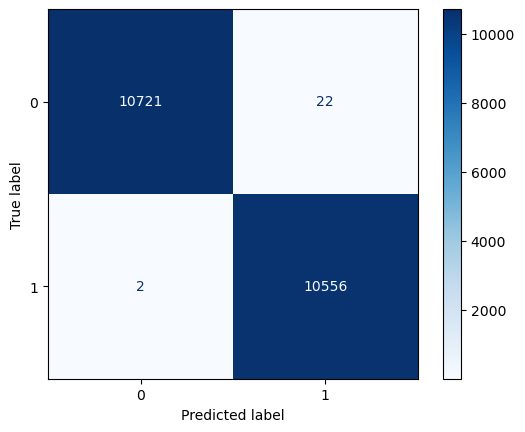

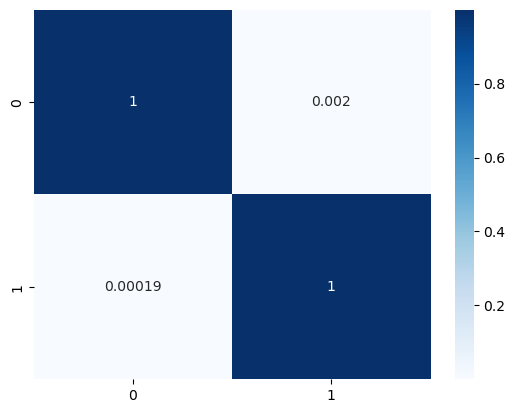

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9985446692643538
 The recall score is 0.9972602739726028
 The f1 score is 0.9985337936905831
 The ROC AUC score is 0.9985555689976727

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         0.98499991 0.98499991 1.         1.        ]

Mean cross validation score: 0.9939999624997655



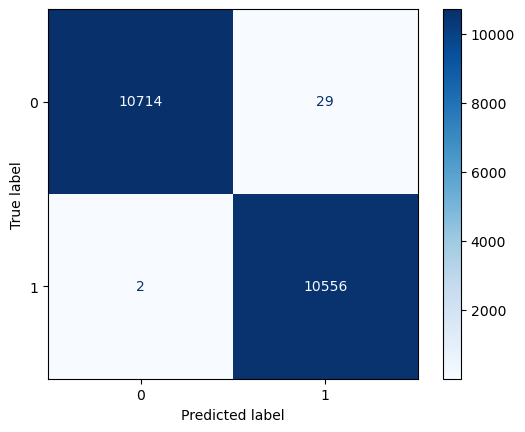

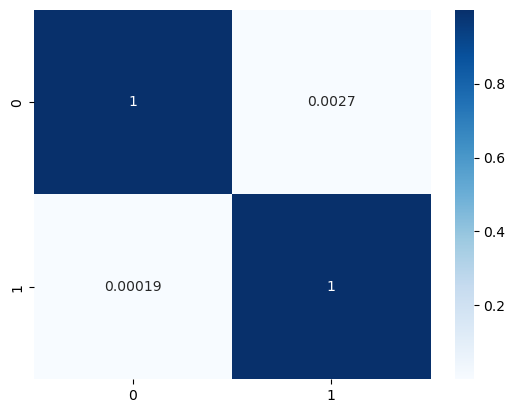

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


The accuracy score is 0.9976526923618609
 The recall score is 0.9967851739788199
 The f1 score is 0.9976341440333113
 The ROC AUC score is 0.9976598549693728

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99499997 0.98499991 0.98499991 1.         0.985     ]

Mean cross validation score: 0.9899999562497266



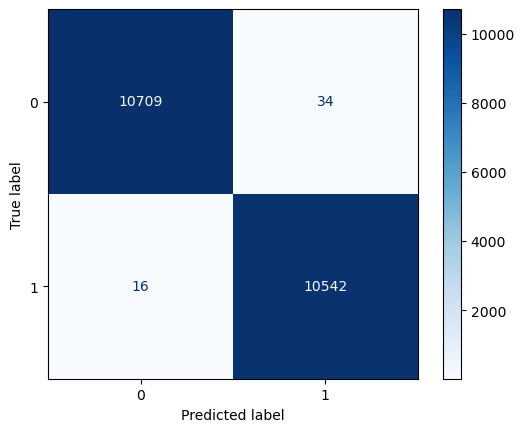

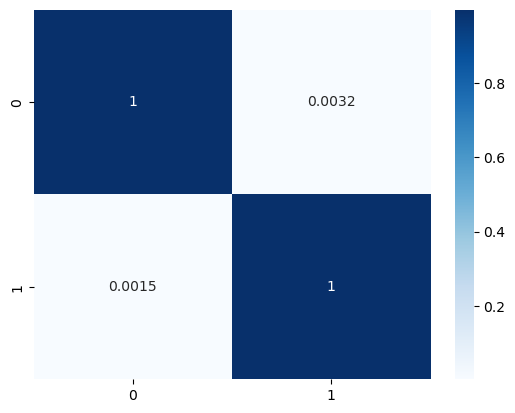

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.99291113093282
 The recall score is 0.9874473067915691
 The f1 score is 0.9928884283897706
 The ROC AUC score is 0.9929583040870307

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     10743
           1       0.99      1.00      0.99     10558

    accuracy                           0.99     21301
   macro avg       0.99      0.99      0.99     21301
weighted avg       0.99      0.99      0.99     21301


Cross validation score: [0.97499984 0.97999987 0.94999969 0.96999981 0.96      ]

Mean cross validation score: 0.9669998437490236



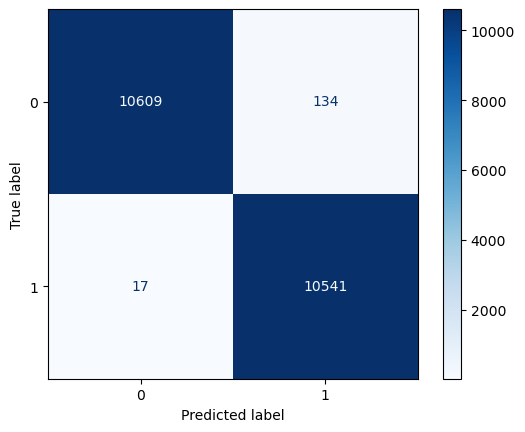

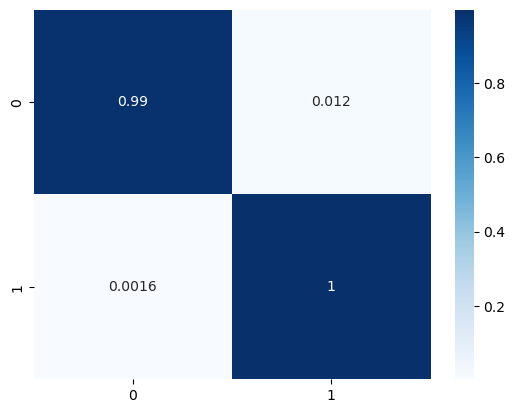

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### Imbalanced

In [9]:
# 15 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df.shape

(578127, 16)

In [10]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

X_train.shape

(462501, 15)

#### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 15)

The accuracy score is 0.6716136509089651
 The recall score is 0.21856349043012965
 The f1 score is 0.3587231886505658
 The ROC AUC score is 0.8192008075729006

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    105006
           1       0.22      1.00      0.36     10620

    accuracy                           0.67    115626
   macro avg       0.61      0.82      0.57    115626
weighted avg       0.93      0.67      0.74    115626


Cross validation score: [-3.00426164 -2.92345815 -2.88404876 -2.87210702 -2.97062632]

Mean cross validation score: -2.930900376785572



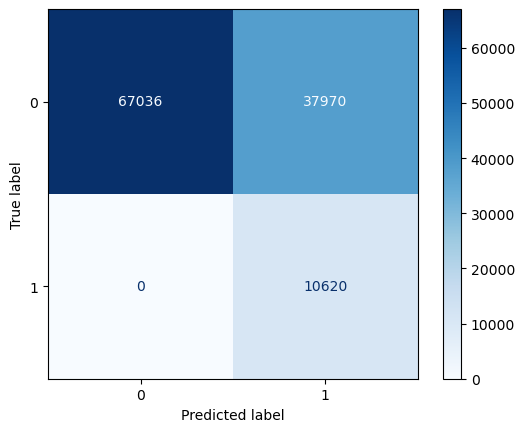

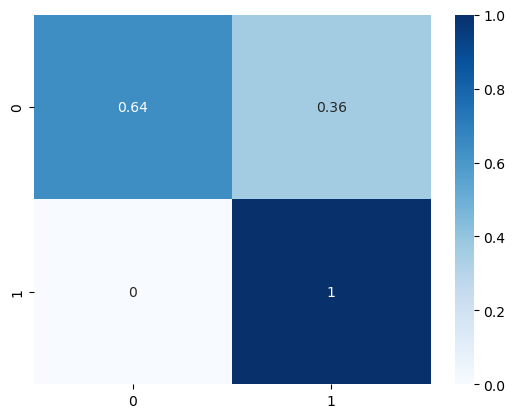

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9947676128206459
 The recall score is 0.9767685423212416
 The f1 score is 0.971358235099181
 The ROC AUC score is 0.981841928107202

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      0.97      0.97     10620

    accuracy                           0.99    115626
   macro avg       0.99      0.98      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.91021835 0.90722563 0.92237873 0.88058267 0.93133503]

Mean cross validation score: 0.9103480820747123



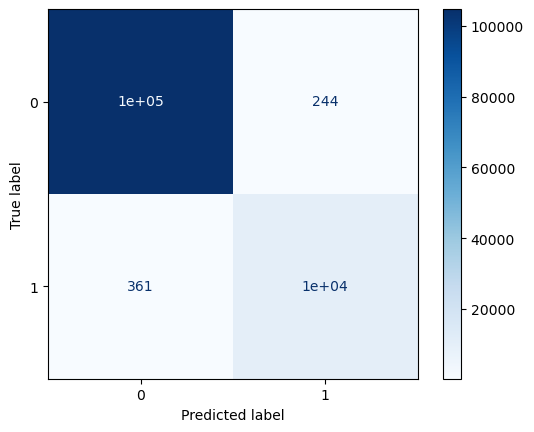

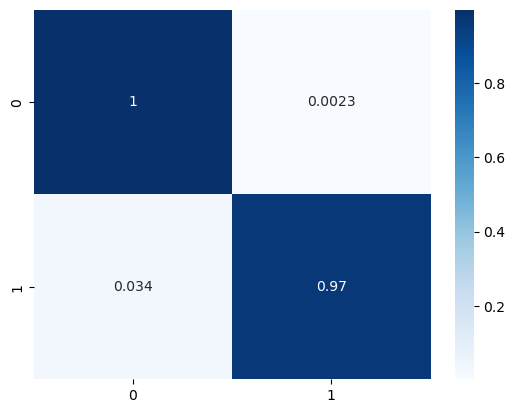

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9997059484890941
 The recall score is 0.999057137469357
 The f1 score is 0.9983981908979553
 The ROC AUC score is 0.9988224401704889

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



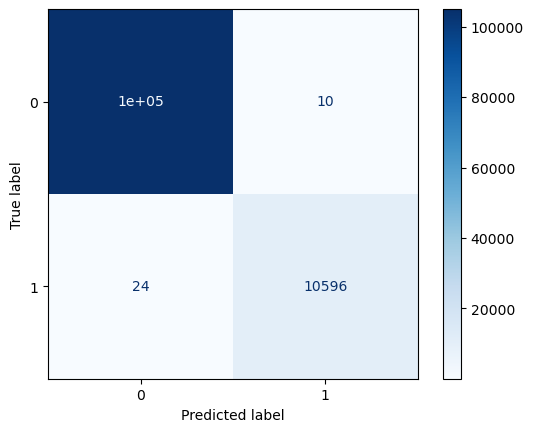

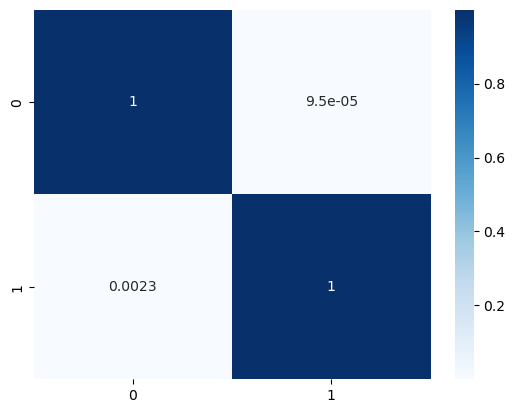

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9986767682009237
 The recall score is 0.9884274381707886
 The f1 score is 0.9928286852589642
 The ROC AUC score is 0.9980442091498458

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.98802911 0.98503639 0.98805827 0.96118937 0.96716023]

Mean cross validation score: 0.9778946743215883



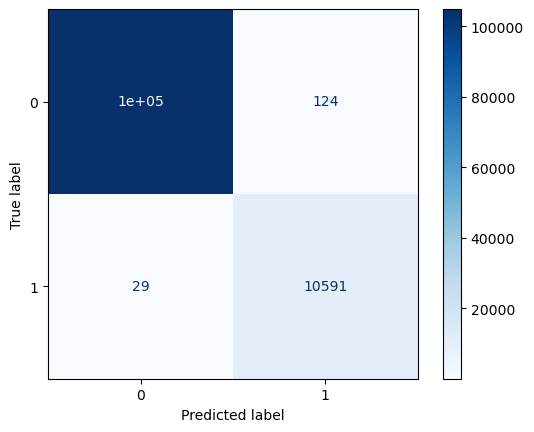

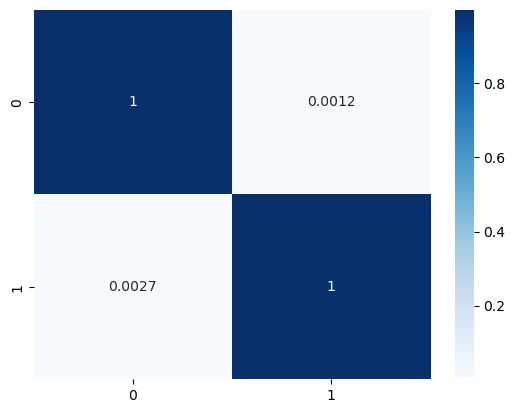

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9997578399321951
 The recall score is 0.9985878365656186
 The f1 score is 0.9986818566989926
 The ROC AUC score is 0.9993165227792742

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



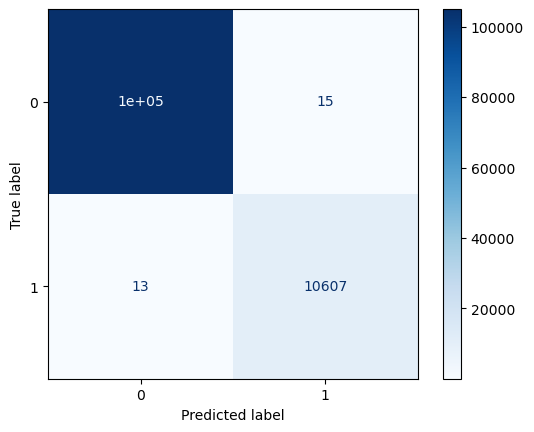

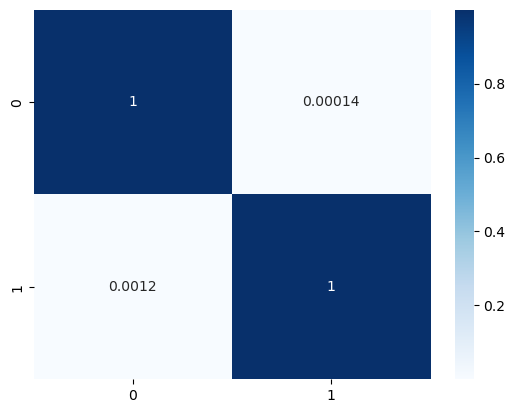

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9997059484890941
 The recall score is 0.9991512636740852
 The f1 score is 0.9983980399547682
 The ROC AUC score is 0.9987801208238732

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



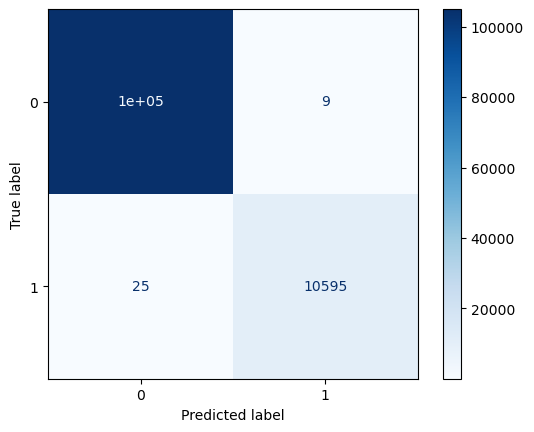

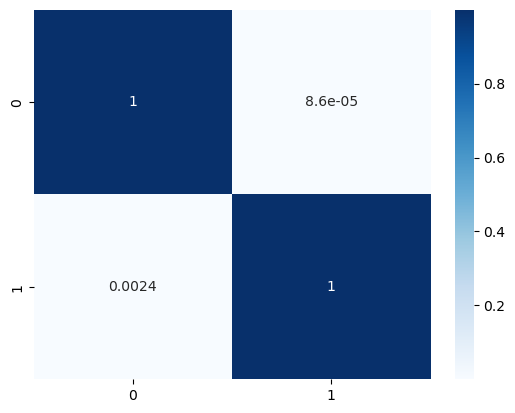

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.3075 val_loss=0.0000 scale=32.0000 norm=64.0000
The accuracy score is 0.9992648712227353
 The recall score is 0.9929808142255498
 The f1 score is 0.9960103262145036
 The ROC AUC score is 0.9991720677570106

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=32.0000 norm=64.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=16.0000 norm=32.0000
Cross validation score: [0.99700728 0.99401456 0.99402913 0.96716023 0.98507283]

Mean cross validation 

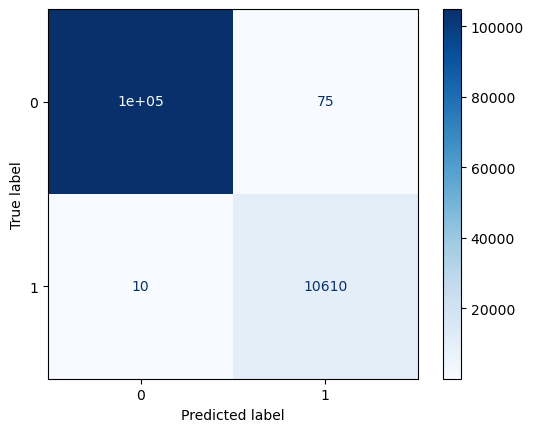

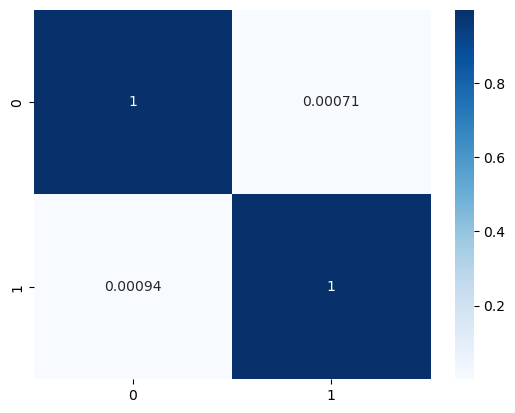

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9988756853994776
 The recall score is 0.9971563981042654
 The f1 score is 0.9938592347661785
 The ROC AUC score is 0.9951490530915049

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      0.99      0.99     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.98503639 0.98503639 0.9910437  0.9373059  0.98507283]

Mean cross validation score: 0.9766990433165331



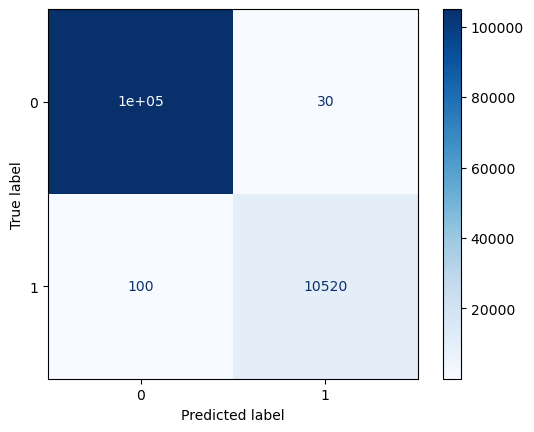

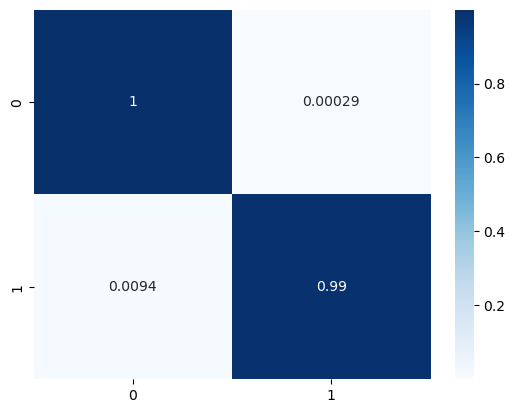

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 15)

The accuracy score is 0.6742428173594174
 The recall score is 0.21991632492440247
 The f1 score is 0.360531051577196
 The ROC AUC score is 0.8205637052109263

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    105006
           1       0.22      1.00      0.36     10620

    accuracy                           0.67    115626
   macro avg       0.61      0.82      0.57    115626
weighted avg       0.93      0.67      0.74    115626


Cross validation score: [-2.96450039 -2.91631301 -2.93120393 -2.88653116 -3.31836795]

Mean cross validation score: -3.0033832877382087



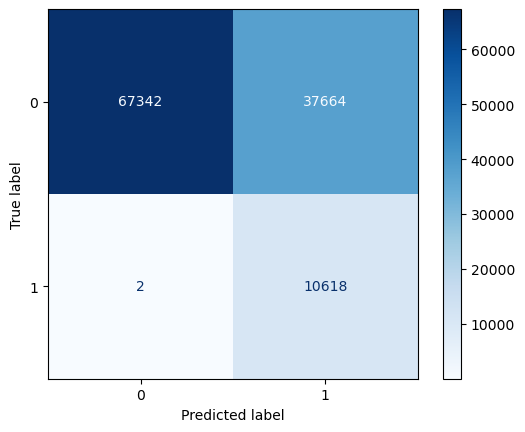

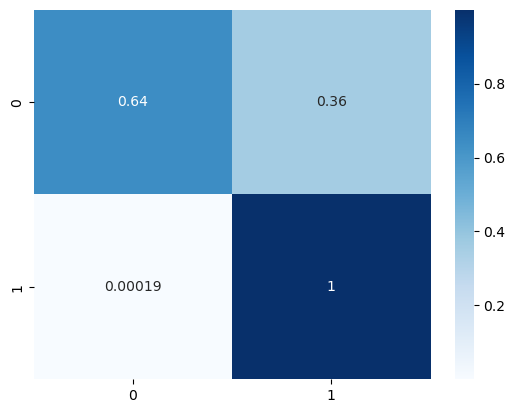

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.975273727362358
 The recall score is 0.8687636605530742
 The f1 score is 0.8647779406895899
 The ROC AUC score is 0.9238384979023528

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    105006
           1       0.87      0.86      0.86     10620

    accuracy                           0.98    115626
   macro avg       0.93      0.92      0.93    115626
weighted avg       0.98      0.98      0.98    115626


Cross validation score: [0.65329464 0.76174522 0.70218152 0.6277269  0.61283598]

Mean cross validation score: 0.6715568513211807



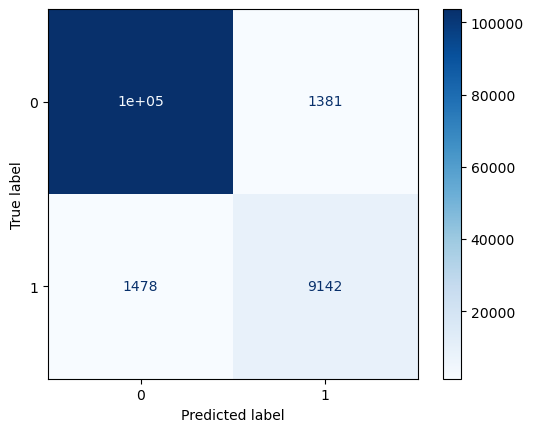

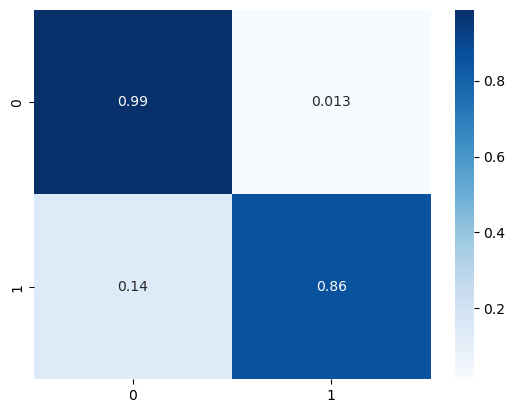

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.999195682631934
 The recall score is 0.9962289054398039
 The f1 score is 0.995618787393414
 The ROC AUC score is 0.9973142427911841

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.96985171 1.         0.9404363  0.9404363  0.98510908]

Mean cross validation score: 0.9671666784505331



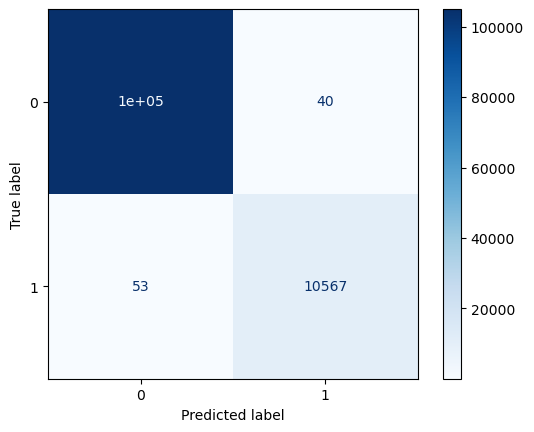

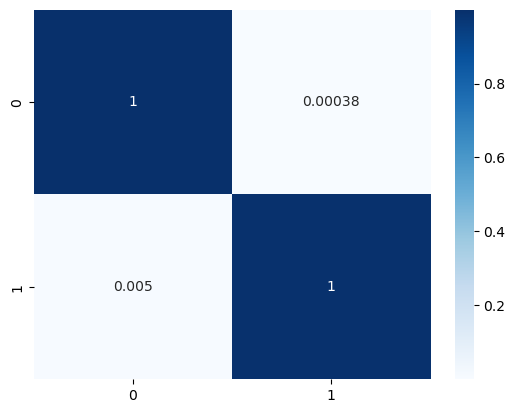

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9980021794406102
 The recall score is 0.993351695317694
 The f1 score is 0.989077497754031
 The ROC AUC score is 0.9920866480484138

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      0.98      0.99     10620

    accuracy                           1.00    115626
   macro avg       1.00      0.99      0.99    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.92462927 0.98510908 0.9404363  0.9404363  0.95532723]

Mean cross validation score: 0.9491876364881824



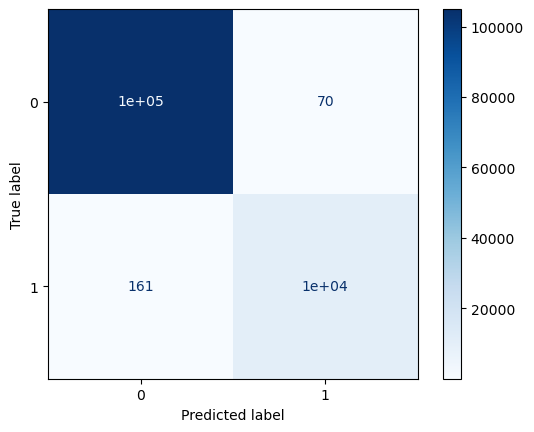

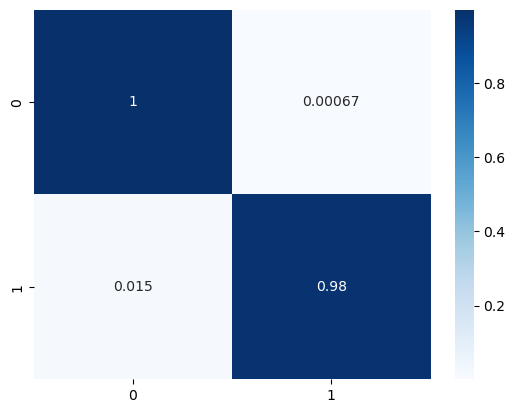

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9996540570459931
 The recall score is 0.9981167608286252
 The f1 score is 0.9981167608286252
 The ROC AUC score is 0.9989631477609404

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         0.95532723 0.98510908 0.98510908]

Mean cross validation score: 0.985109076018167



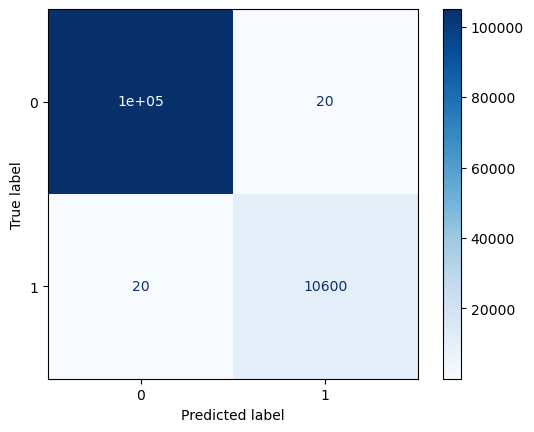

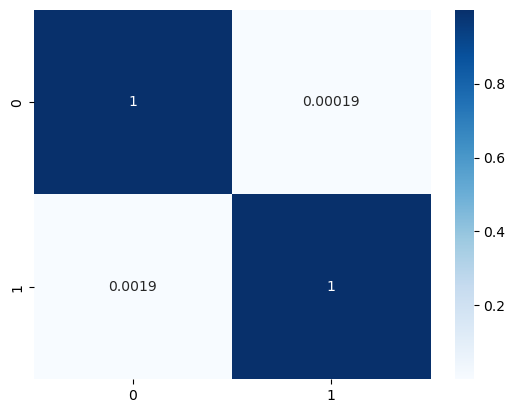

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9993773026827876
 The recall score is 0.9979229607250756
 The f1 score is 0.9966056948896851
 The ROC AUC score is 0.9975411951170722

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.98492585 1.         0.98510908 0.95532723 0.98510908]

Mean cross validation score: 0.9820942468270832



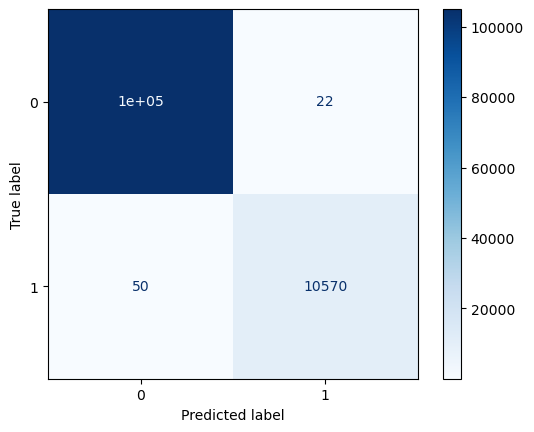

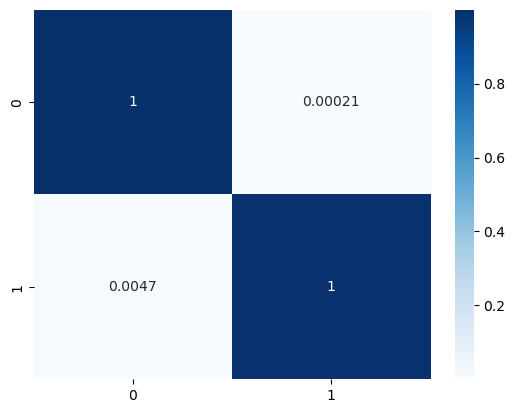

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.3077 val_loss=0.0000 scale=32.0000 norm=64.0000
The accuracy score is 0.9991264940411326
 The recall score is 0.9928778933558242
 The f1 score is 0.9952562115447842
 The ROC AUC score is 0.9984610914350764

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


[iter 0] loss=0.3083 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=32.0000 norm=64.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.3076 val_loss=0.0000 scale=64.0000 norm=128.0000
Cross validation score: [1.         0.98510908 0.95532723 0.95532723 0.97021815]

Mean cross validation score: 0.9731963368327005



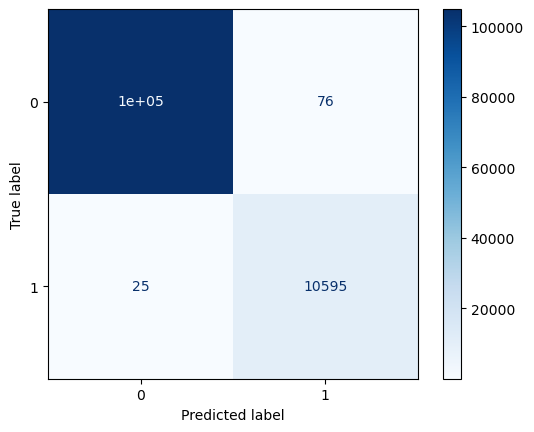

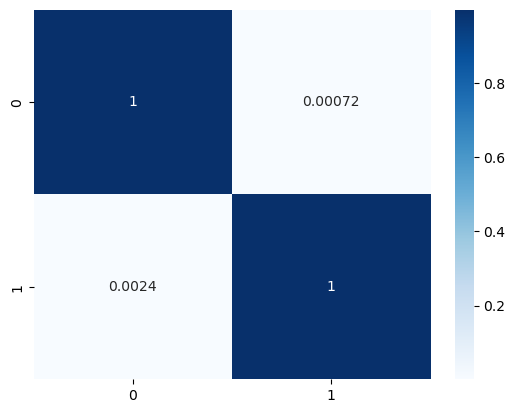

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9924843893242005
 The recall score is 0.9652638610554443
 The f1 score is 0.9588132138963932
 The ROC AUC score is 0.9744908711700198

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.97      0.95      0.96     10620

    accuracy                           0.99    115626
   macro avg       0.98      0.97      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.89448098 0.92554538 0.91065446 0.85109076 0.80641799]

Mean cross validation score: 0.8776379125859497



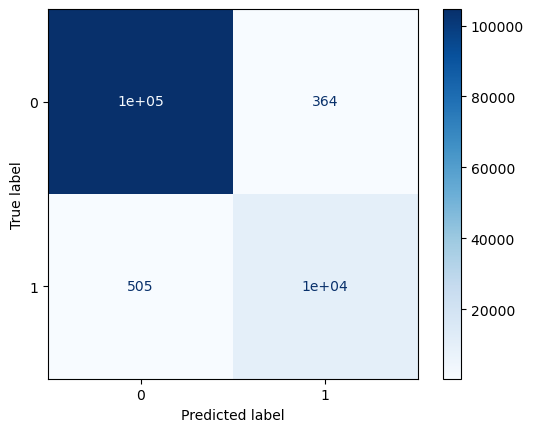

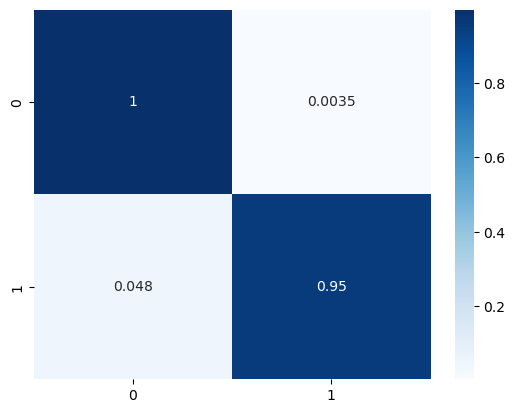

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

## 18 features

### Smote

In [16]:
# 18 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df = dp.OverallProcessor(df).smote()
df.shape

(1049752, 19)

In [16]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(839801, 18)

#### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 18)

The accuracy score is 0.9243585408023777
 The recall score is 0.8773350043185937
 The f1 score is 0.9288157169303038
 The ROC AUC score is 0.9243422013445172

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92    104948
           1       0.88      0.99      0.93    105003

    accuracy                           0.92    209951
   macro avg       0.93      0.92      0.92    209951
weighted avg       0.93      0.92      0.92    209951


Cross validation score: [0.708      0.669      0.695      0.686      0.68399992]

Mean cross validation score: 0.688399984199996



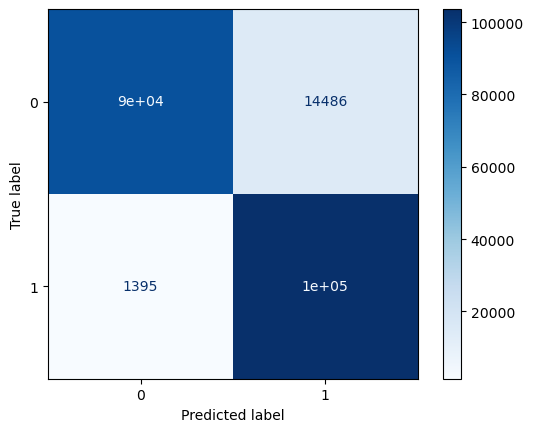

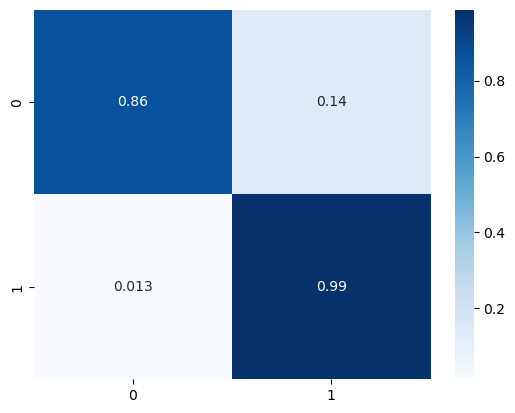

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.995175064657944
 The recall score is 0.9941457109729904
 The f1 score is 0.9951813533119277
 The ROC AUC score is 0.995174791070052

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104948
           1       0.99      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.98  0.977 0.985 0.978 0.984]

Mean cross validation score: 0.9807999991999997



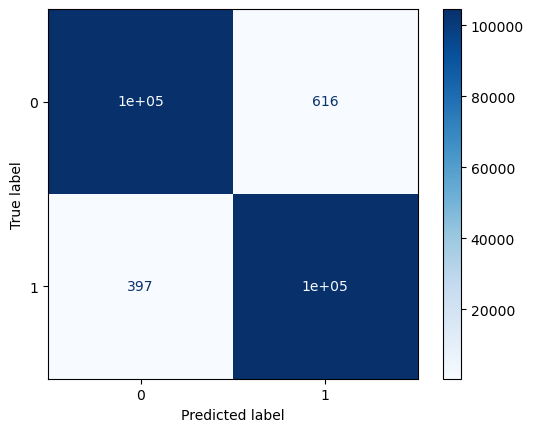

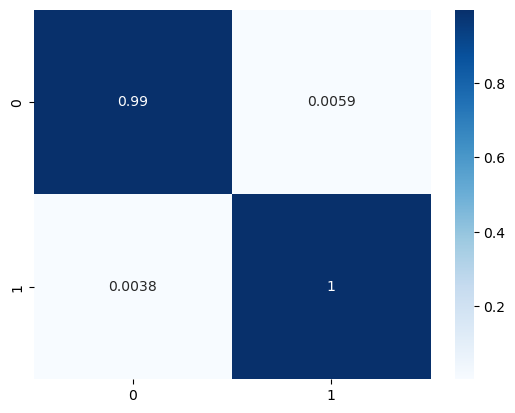

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9997618491933832
 The recall score is 0.9999523641664205
 The f1 score is 0.9997618662069097
 The ROC AUC score is 0.9997618990869531

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    0.999 1.   ]

Mean cross validation score: 0.9984



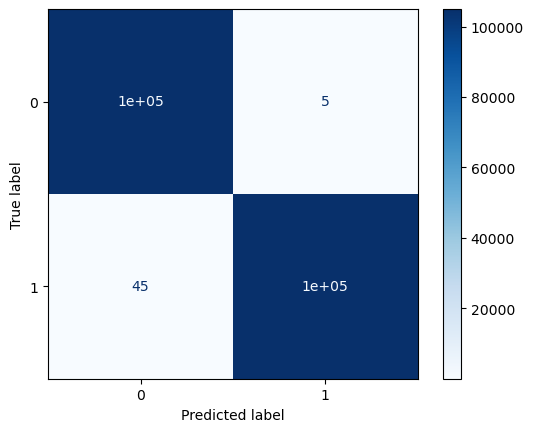

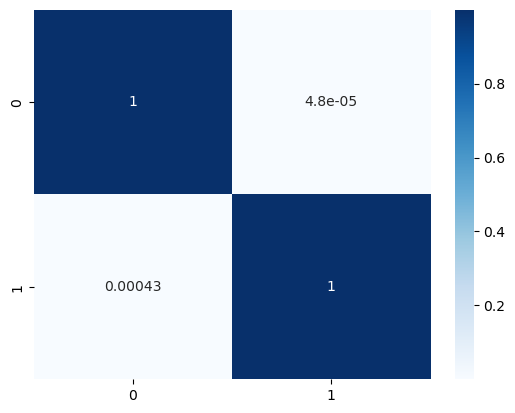

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9987854308862544
 The recall score is 0.9991422689844465
 The f1 score is 0.998785315174986
 The ROC AUC score is 0.9987855243839907

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.993 0.996 0.992 0.992]

Mean cross validation score: 0.9925999996



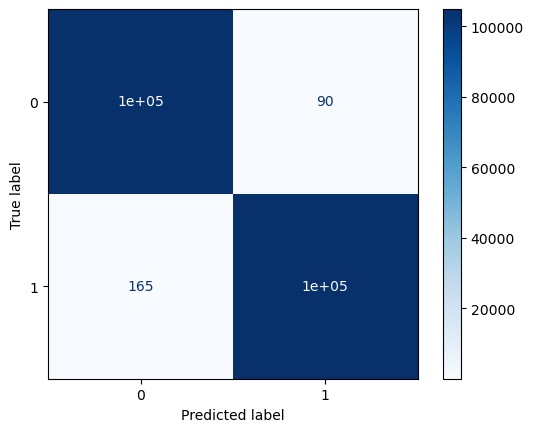

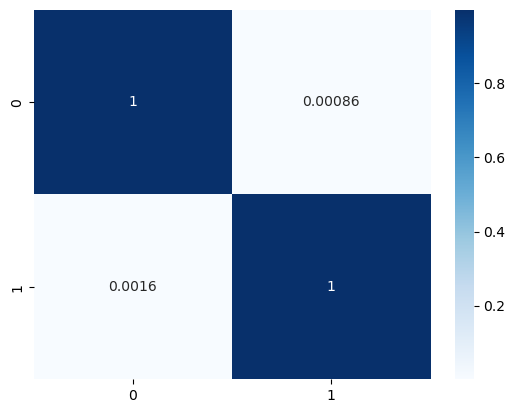

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9996475368062072
 The recall score is 0.9998666120411216
 The f1 score is 0.9996475519146504
 The ROC AUC score is 0.9996475941784193

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    0.998 1.   ]

Mean cross validation score: 0.9982



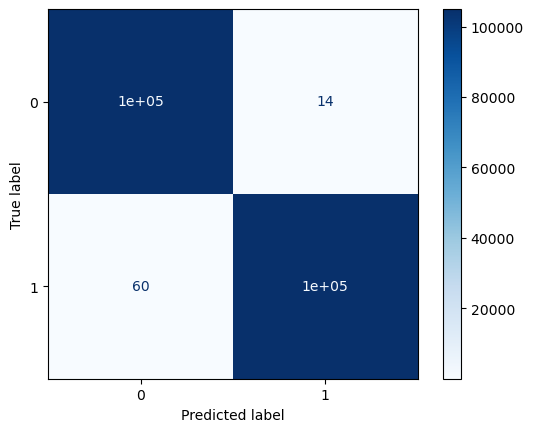

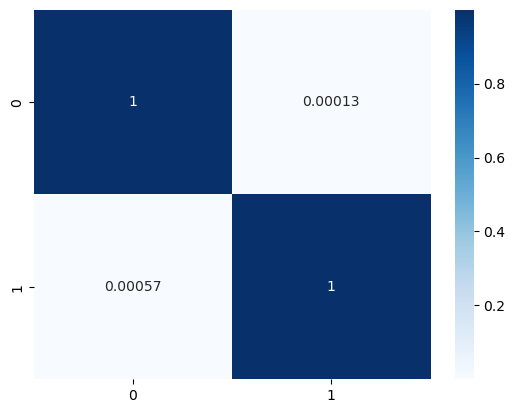

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9996904039513982
 The recall score is 0.9999333028432045
 The f1 score is 0.9996904098497297
 The ROC AUC score is 0.9996904675652912

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.995 0.998 1.    0.999 1.   ]

Mean cross validation score: 0.9984



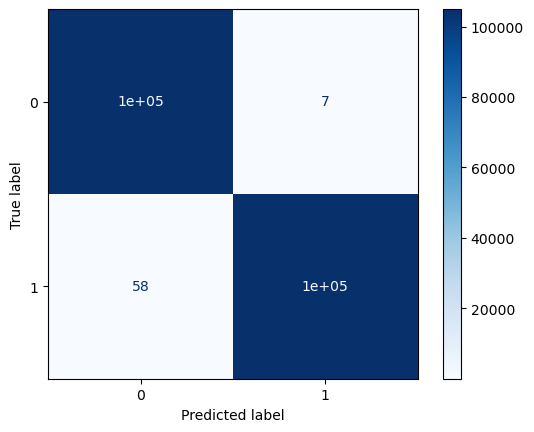

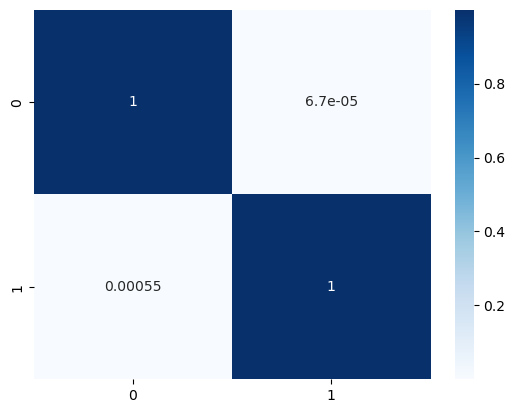

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9991045529671209
 The recall score is 0.9987722821276637
 The f1 score is 0.9991050857784801
 The ROC AUC score is 0.9991044655633214

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.992 0.996 0.998 0.995 0.995]

Mean cross validation score: 0.99519999975



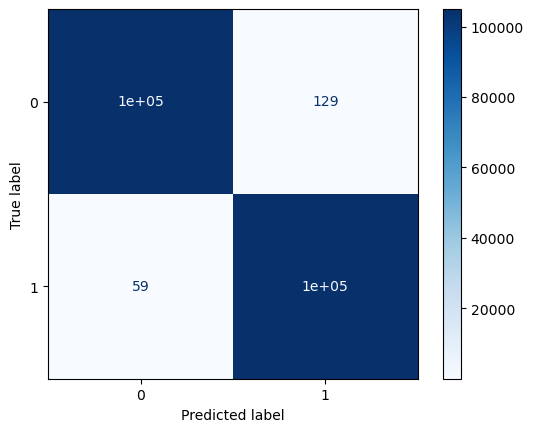

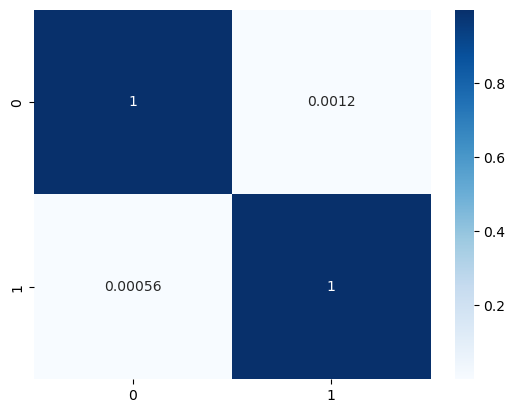

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9992188653542969
 The recall score is 0.9989339729495635
 The f1 score is 0.9992192929841097
 The ROC AUC score is 0.9992187904358206

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.994 0.991 0.996 0.993 0.998]

Mean cross validation score: 0.9943999998999999



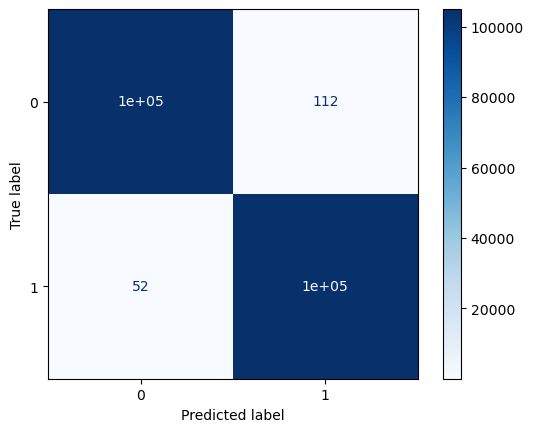

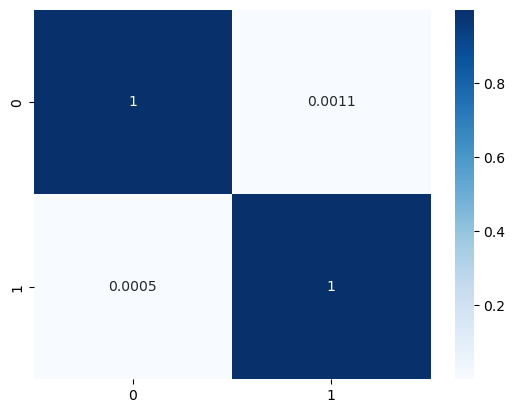

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 18)

The accuracy score is 0.8965568156379345
 The recall score is 0.8616024522190672
 The f1 score is 0.9013553532820988
 The ROC AUC score is 0.896544133916543

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89    104948
           1       0.86      0.94      0.90    105003

    accuracy                           0.90    209951
   macro avg       0.90      0.90      0.90    209951
weighted avg       0.90      0.90      0.90    209951


Cross validation score: [0.55  0.605 0.575 0.555 0.59 ]

Mean cross validation score: 0.575



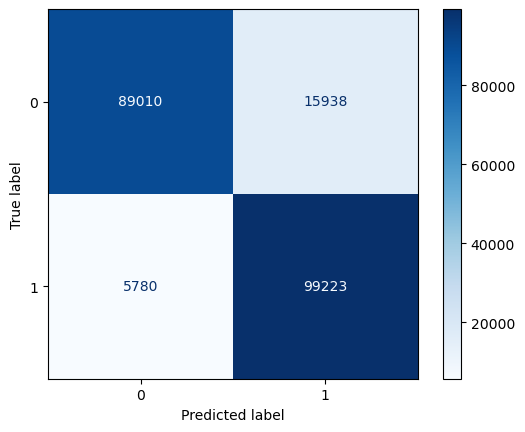

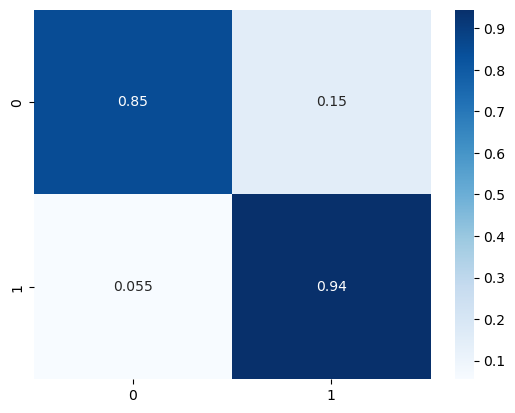

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9828436158913271
 The recall score is 0.9816829284513144
 The f1 score is 0.982868829068772
 The ROC AUC score is 0.9828432977860012

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    104948
           1       0.98      0.98      0.98    105003

    accuracy                           0.98    209951
   macro avg       0.98      0.98      0.98    209951
weighted avg       0.98      0.98      0.98    209951


Cross validation score: [0.94  0.895 0.925 0.905 0.94 ]

Mean cross validation score: 0.921



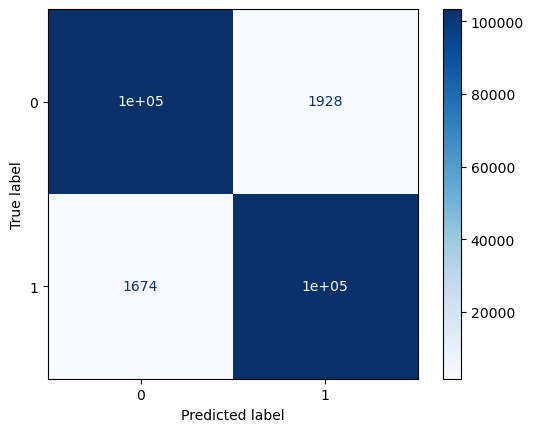

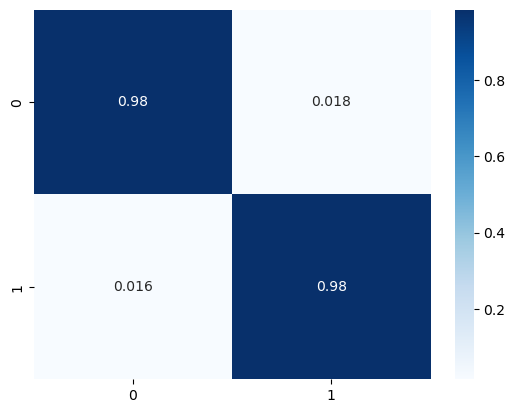

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9995570394996928
 The recall score is 0.9996951626116943
 The f1 score is 0.9995570943484287
 The ROC AUC score is 0.9995570756539813

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.985 1.    0.995 0.99 ]

Mean cross validation score: 0.992



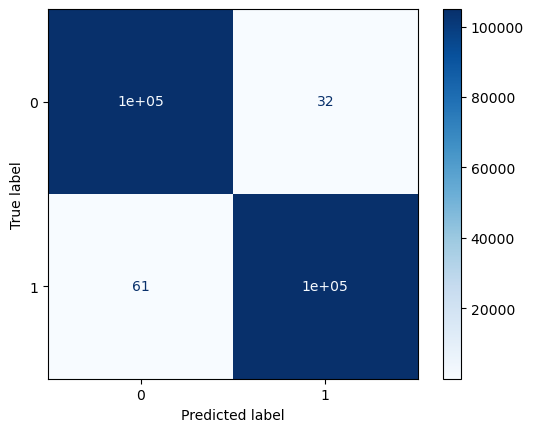

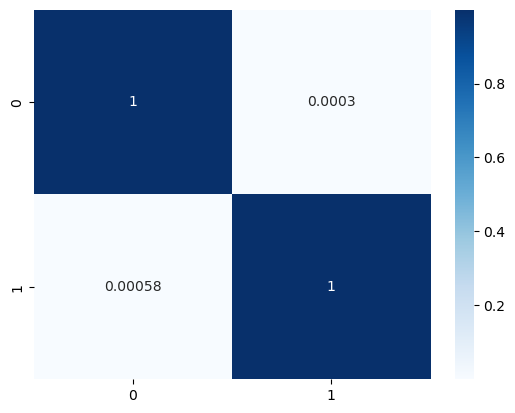

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9987997199346514
 The recall score is 0.9981642999134462
 The f1 score is 0.9988007994670219
 The ROC AUC score is 0.9987995526540713

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.985 1.    0.98  0.99 ]

Mean cross validation score: 0.9890000000000001



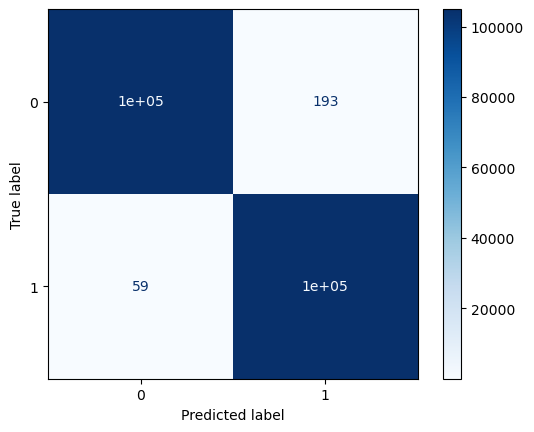

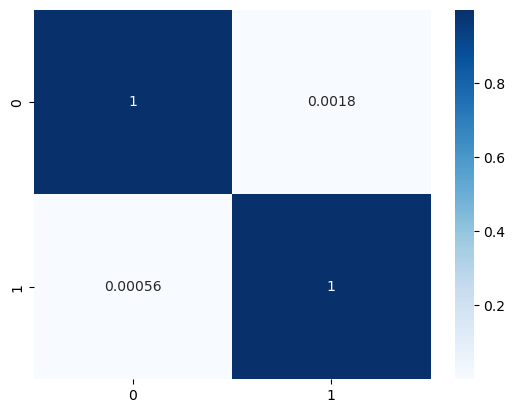

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9992950736124143
 The recall score is 0.9993998914089216
 The f1 score is 0.9992951843950015
 The ROC AUC score is 0.9992951010144904

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.985 1.    0.995 0.99 ]

Mean cross validation score: 0.992



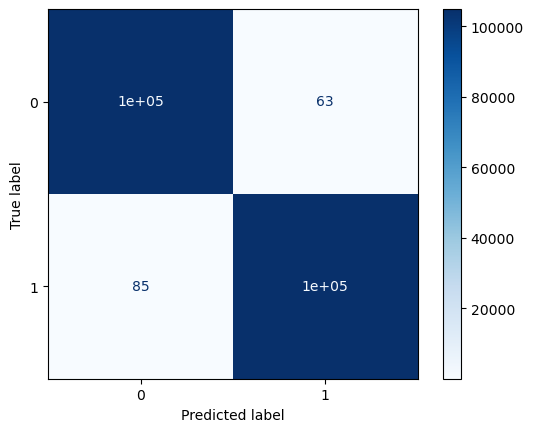

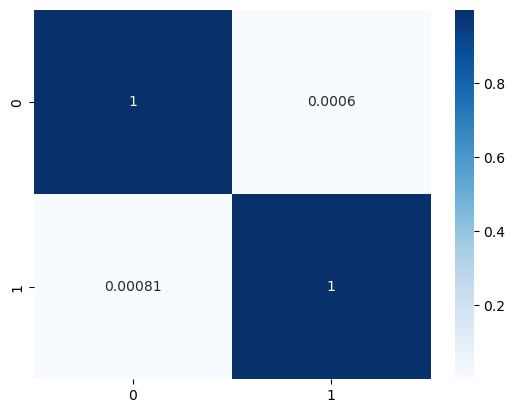

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9995094093383694
 The recall score is 0.9996094568592712
 The f1 score is 0.9995094887730076
 The ROC AUC score is 0.9995094355074067

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.985 0.985 1.    0.995 0.995]

Mean cross validation score: 0.992



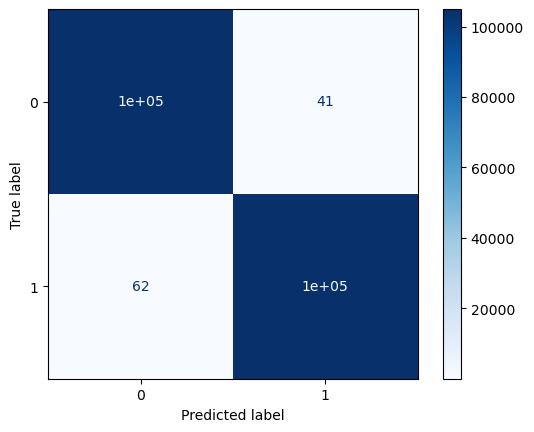

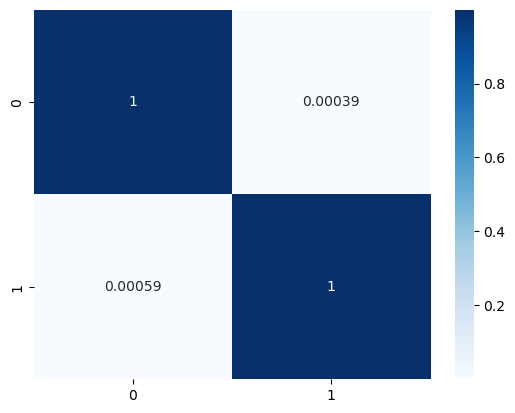

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9989140323218275
 The recall score is 0.9988668069667564
 The f1 score is 0.9989143684290721
 The ROC AUC score is 0.9989140197698233

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99  0.99  1.    0.995 0.98 ]

Mean cross validation score: 0.991



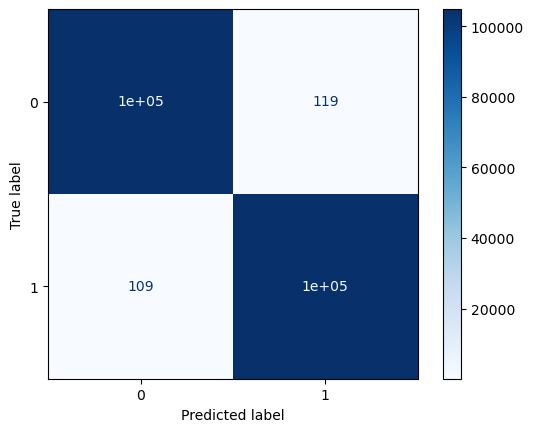

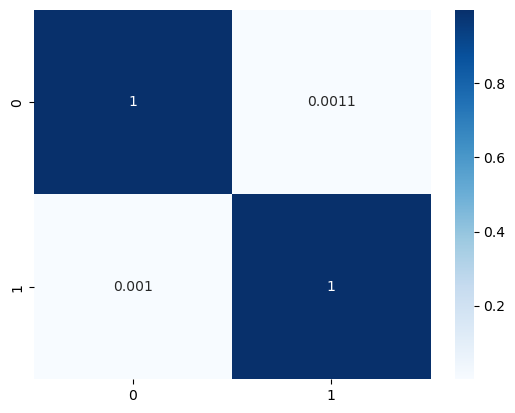

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.994551109544608
 The recall score is 0.9913611203103563
 The f1 score is 0.994570170109356
 The ROC AUC score is 0.9945502582066497

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    104948
           1       0.99      1.00      0.99    105003

    accuracy                           0.99    209951
   macro avg       0.99      0.99      0.99    209951
weighted avg       0.99      0.99      0.99    209951


Cross validation score: [0.985 0.98  0.99  0.965 0.965]

Mean cross validation score: 0.977



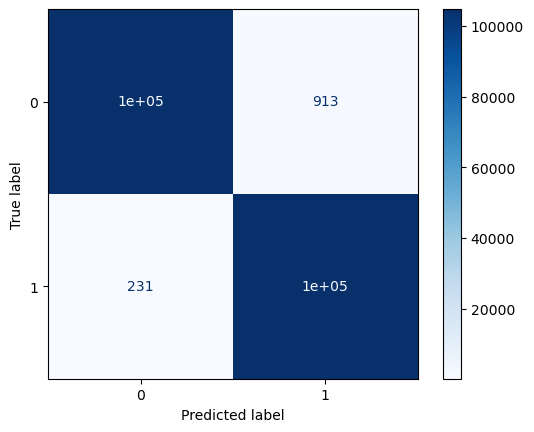

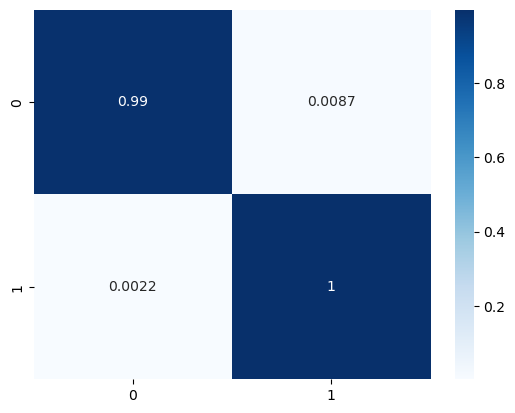

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### ADASYN

In [21]:
# 18 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df = dp.OverallProcessor(df).adasyn()
df.shape

(1048269, 19)

In [22]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(838615, 18)

#### 20,000 sample

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 18)

The accuracy score is 0.9222671639940092
 The recall score is 0.873615651689095
 The f1 score is 0.9269615334627054
 The ROC AUC score is 0.9223136208558231

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92    104902
           1       0.87      0.99      0.93    104752

    accuracy                           0.92    209654
   macro avg       0.93      0.92      0.92    209654
weighted avg       0.93      0.92      0.92    209654


Cross validation score: [0.71799887 0.69399931 0.65799923 0.69399931 0.67599927]

Mean cross validation score: 0.6879991992978036



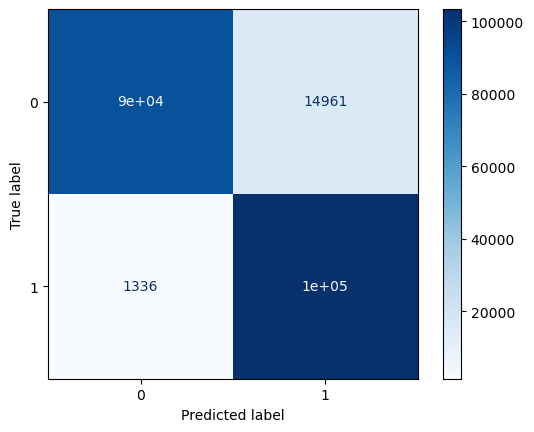

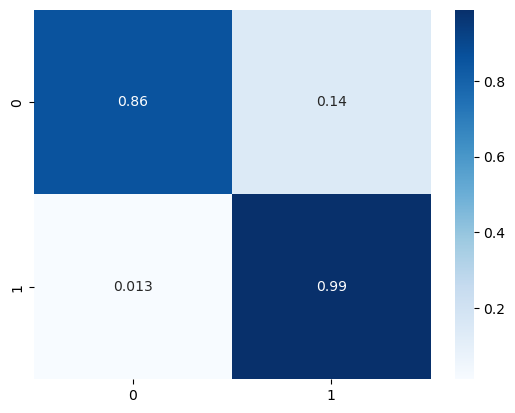

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9955450408768733
 The recall score is 0.9938070776255707
 The f1 score is 0.9955496683692917
 The ROC AUC score is 0.9955462944326164

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104902
           1       0.99      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.97699991 0.96899993 0.97999995 0.98099996 0.97599995]

Mean cross validation score: 0.9765999392998312



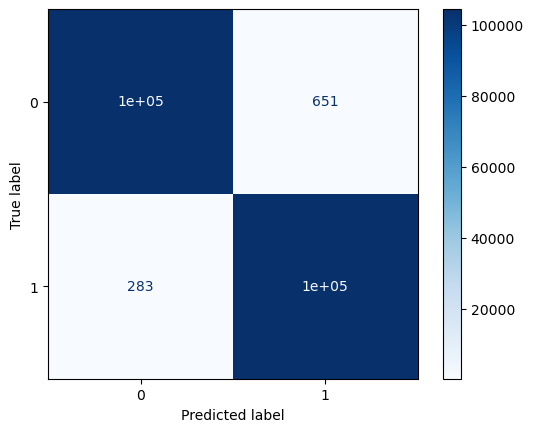

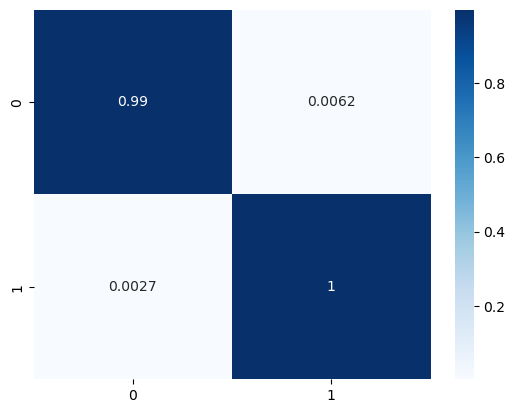

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9997376630066681
 The recall score is 0.9999140524280189
 The f1 score is 0.9997374288074017
 The ROC AUC score is 0.9997375366062417

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         1.         0.999      0.998      0.99699999]

Mean cross validation score: 0.998799997299994



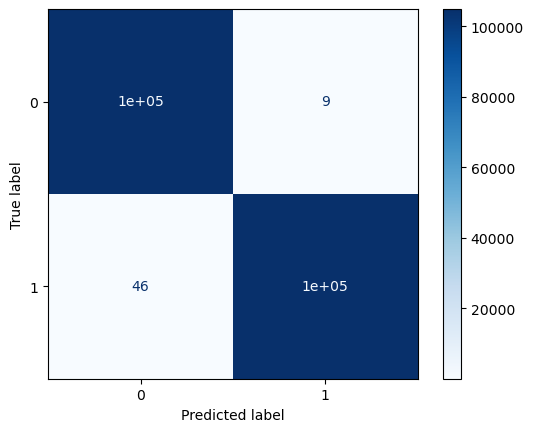

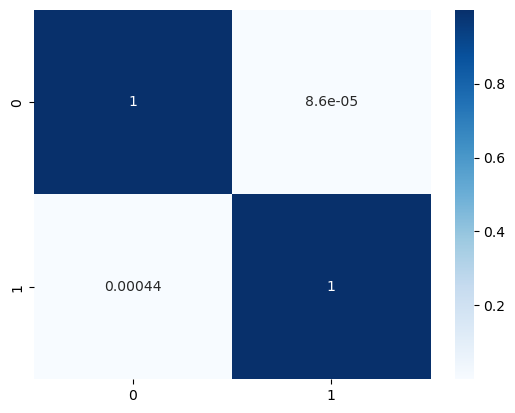

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9989029543915212
 The recall score is 0.9984168462814962
 The f1 score is 0.9989027031668941
 The ROC AUC score is 0.9989033019149862

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.99399998 0.998      0.99599999 0.98799997 0.99199998]

Mean cross validation score: 0.9935999834999544



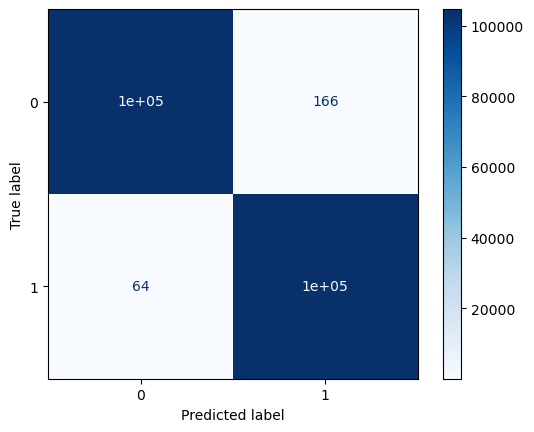

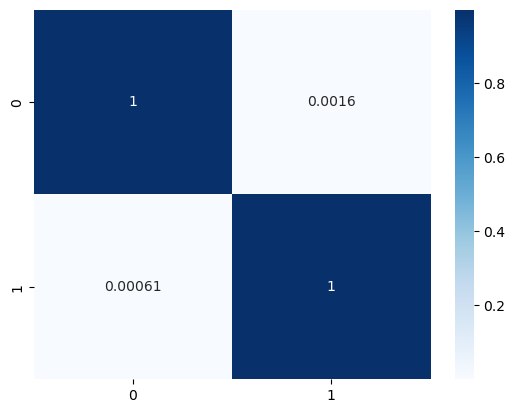

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9997424327701833
 The recall score is 0.9998949579831933
 The f1 score is 0.9997422089825848
 The ROC AUC score is 0.9997423234351902

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         1.         0.998      0.99699999 0.99499999]

Mean cross validation score: 0.9979999954999899



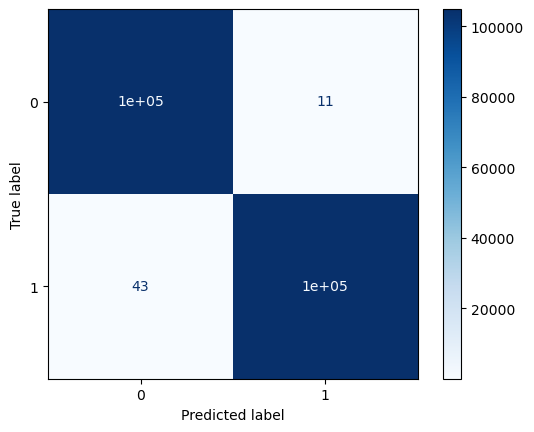

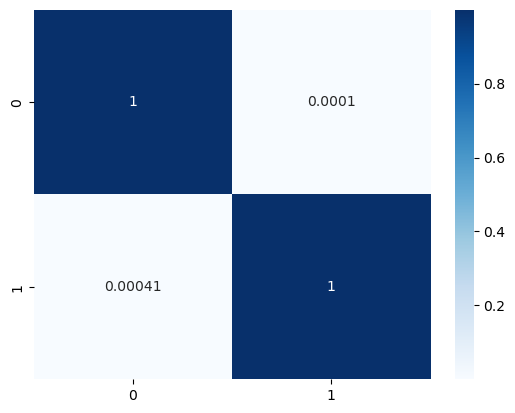

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.999771051351274
 The recall score is 0.9999140581730678
 The f1 score is 0.999770854616802
 The ROC AUC score is 0.9997709488561272

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         1.         0.998      0.99699999 0.99699999]

Mean cross validation score: 0.9983999963999919



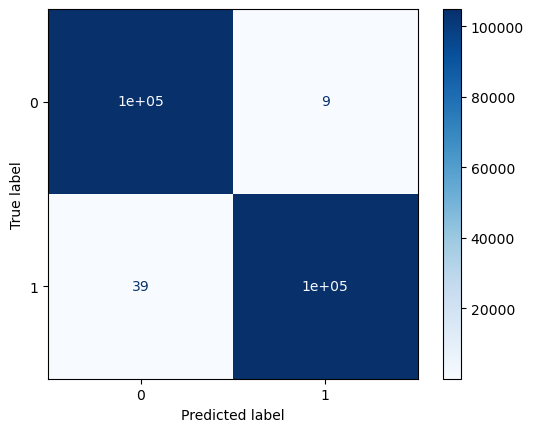

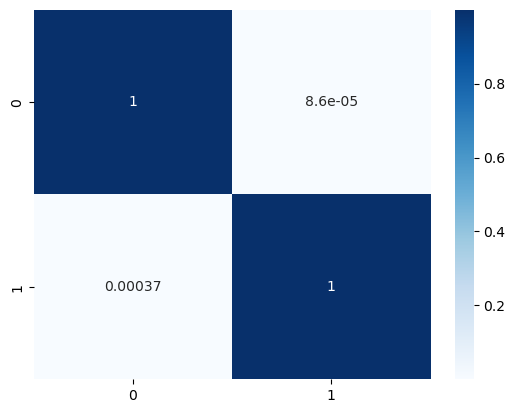

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9993036145267917
 The recall score is 0.9991982743810487
 The f1 score is 0.999303189103023
 The ROC AUC score is 0.9993036892474828

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654




/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.999      0.999      0.99599999 0.99499999 0.99499999]

Mean cross validation score: 0.9967999924499816



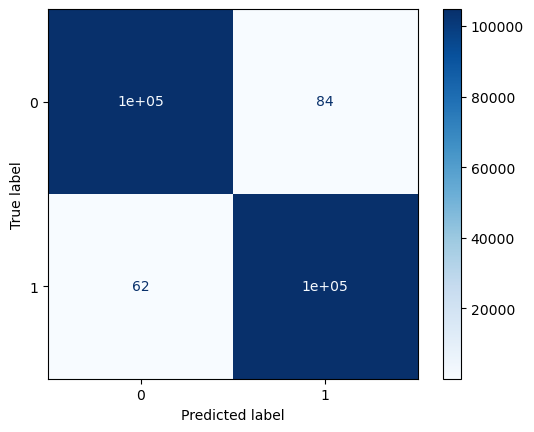

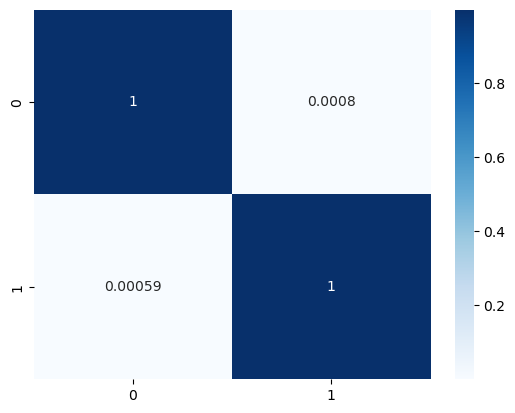

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9992463773646103
 The recall score is 0.9987792083929423
 The f1 score is 0.9992461903989466
 The ROC AUC score is 0.9992467114134763

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.99299997 0.99499999 0.99699999 0.99599999 0.99499999]

Mean cross validation score: 0.9951999867499604



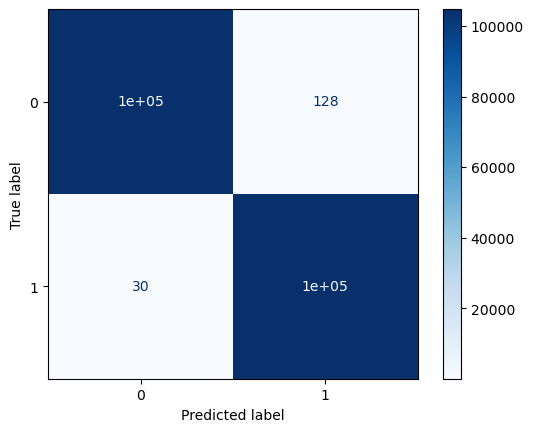

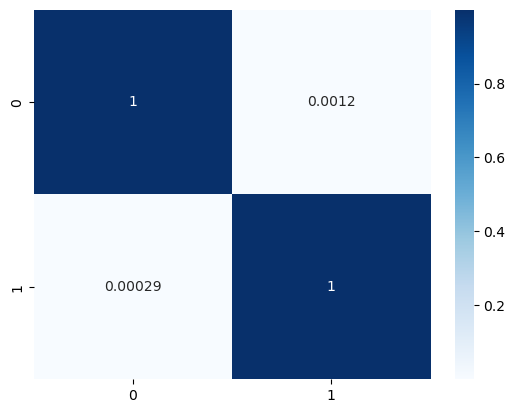

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### 4000 sample

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 18)

The accuracy score is 0.8972545241206941
 The recall score is 0.8586031839063618
 The f1 score is 0.902429191975468
 The ROC AUC score is 0.8972929280970923

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89    104902
           1       0.86      0.95      0.90    104752

    accuracy                           0.90    209654
   macro avg       0.90      0.90      0.90    209654
weighted avg       0.90      0.90      0.90    209654


Cross validation score: [0.62499766 0.53999712 0.62499766 0.66       0.615     ]

Mean cross validation score: 0.6129984874905468



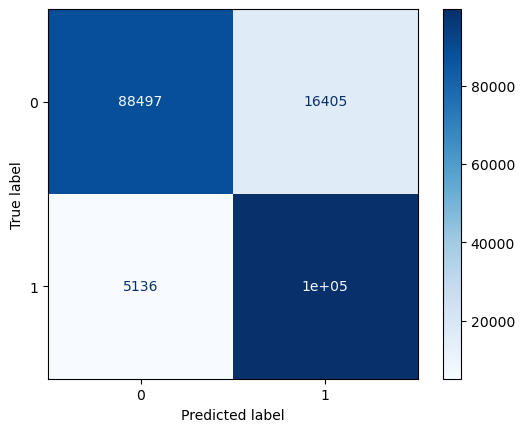

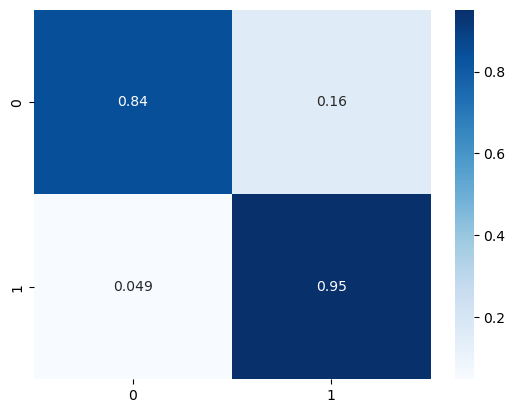

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9805966020204718
 The recall score is 0.9744947971648319
 The f1 score is 0.9807064804977994
 The ROC AUC score is 0.9806011786202474

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    104902
           1       0.97      0.99      0.98    104752

    accuracy                           0.98    209654
   macro avg       0.98      0.98      0.98    209654
weighted avg       0.98      0.98      0.98    209654


Cross validation score: [0.92499953 0.92499953 0.93999962 0.9        0.89      ]

Mean cross validation score: 0.9159997374983593



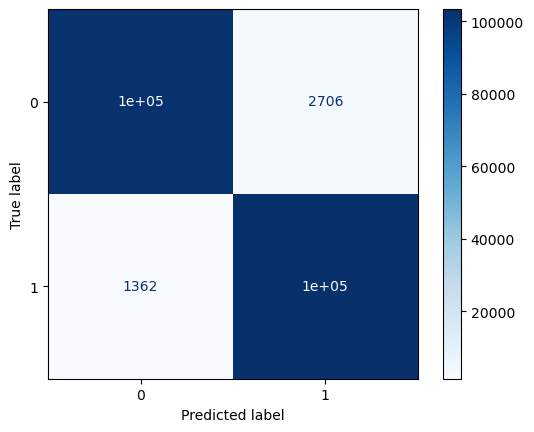

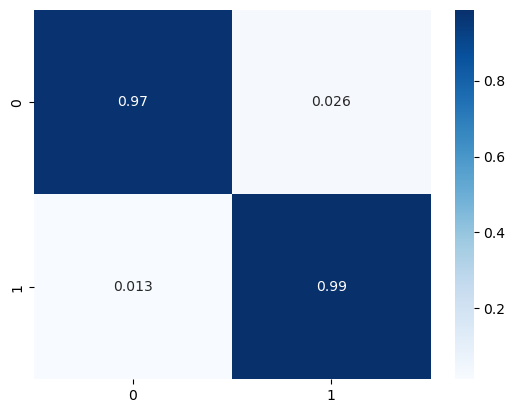

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9994705562498212
 The recall score is 0.9996275747476581
 The f1 score is 0.9994700937122561
 The ROC AUC score is 0.9994704433630589

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         0.98999994 0.99499997 0.99       1.        ]

Mean cross validation score: 0.9949999812498828



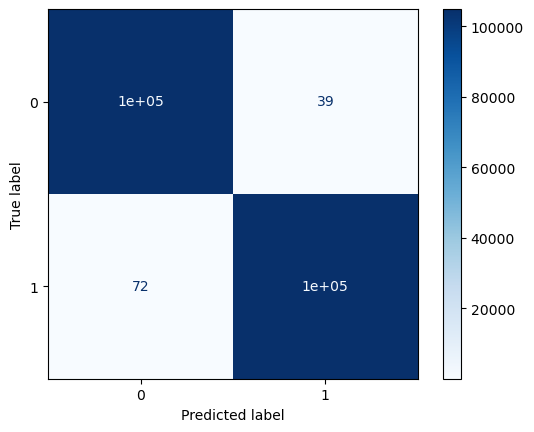

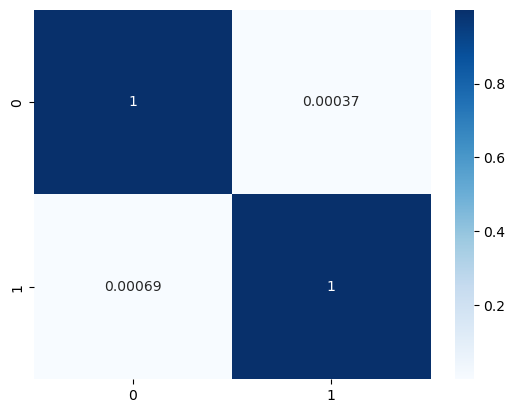

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9982351874994038
 The recall score is 0.996896243121275
 The f1 score is 0.998236297941712
 The ROC AUC score is 0.9982361489487478

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.99499997 0.98499991 0.99499997 0.99       0.995     ]

Mean cross validation score: 0.9919999687498047



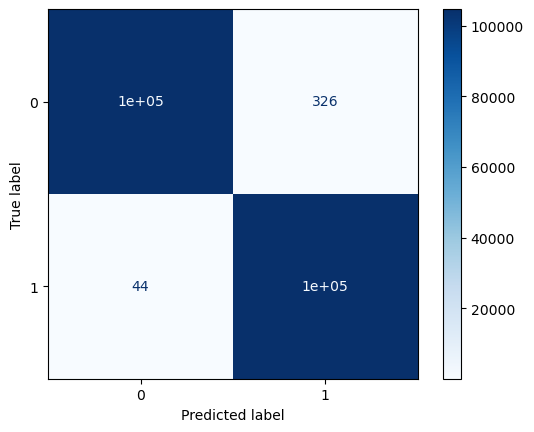

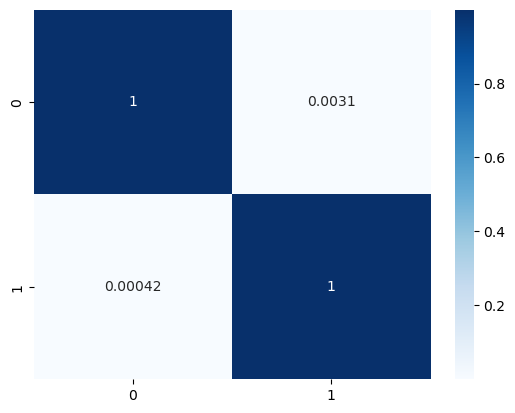

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9994610167227909
 The recall score is 0.9996275676346725
 The f1 score is 0.9994605407005333
 The ROC AUC score is 0.9994608970059486

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         0.98999994 0.99499997 1.         1.        ]

Mean cross validation score: 0.9969999812498826



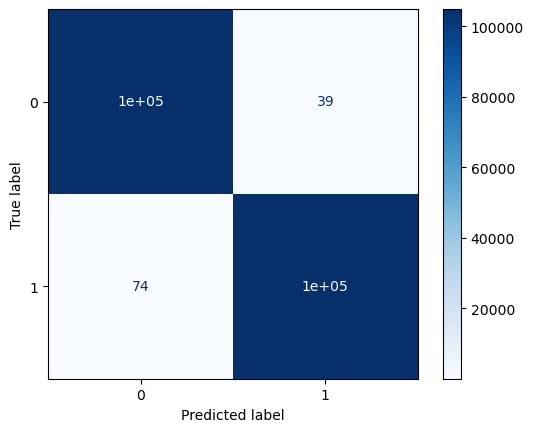

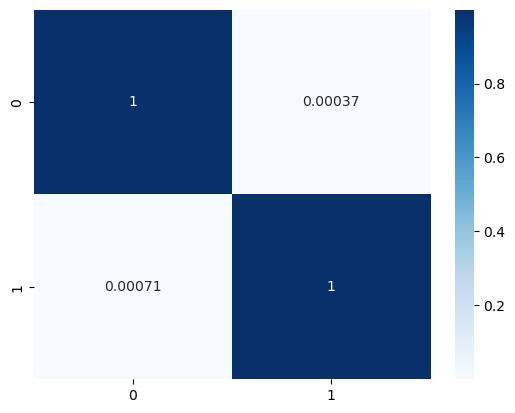

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9994848655403665
 The recall score is 0.9996275854166269
 The f1 score is 0.9994844228878047
 The ROC AUC score is 0.999484762898724

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         0.98999994 0.99499997 0.99       1.        ]

Mean cross validation score: 0.9949999812498828



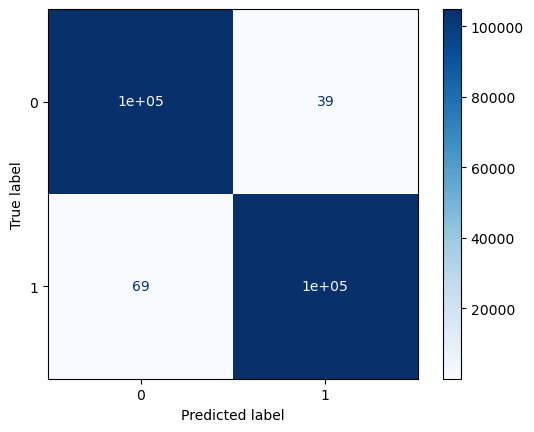

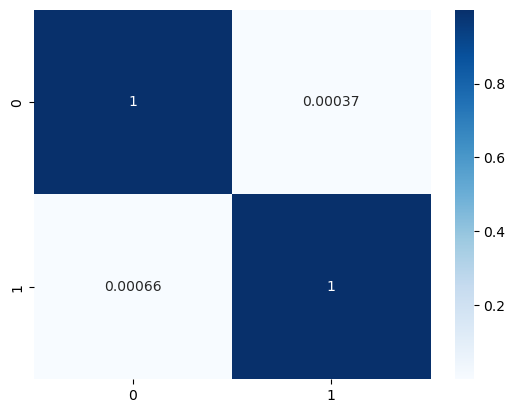

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


The accuracy score is 0.999198679729459
 The recall score is 0.9991123413190799
 The f1 score is 0.9991981748933286
 The ROC AUC score is 0.9991987407460415

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654




/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=512.0000 norm=1024.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [1.                nan 0.99499997 1.         0.985     ]

Mean cross validation score: nan



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/ngboost/ngboost.py", line 250, in fit
    return self.partial_fit(
           ^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ngboost/ngboost.py", line 383, in partial_fit
    grads = D.grad(Y_batch, natural=self.natural_gradient)
      

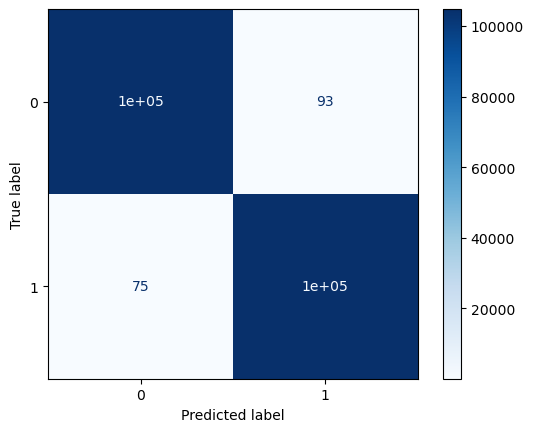

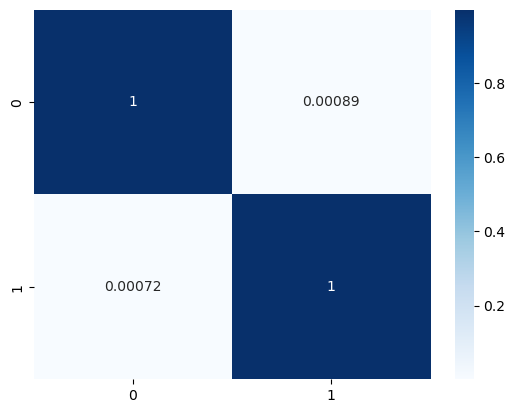

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.995492573478207
 The recall score is 0.9922796035472092
 The f1 score is 0.9955040035777665
 The ROC AUC score is 0.9954949019755716

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104902
           1       0.99      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.96499978 0.95499972 0.97499984 0.96       0.945     ]

Mean cross validation score: 0.9599998687491796



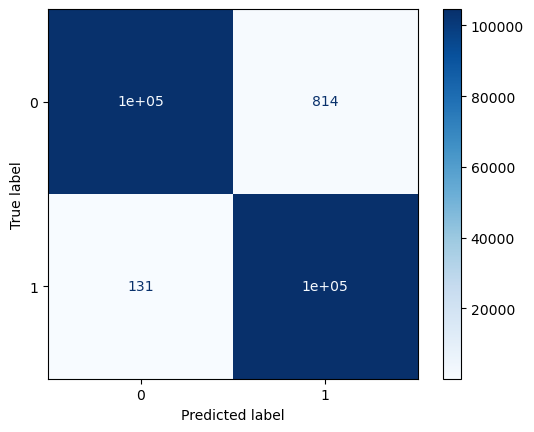

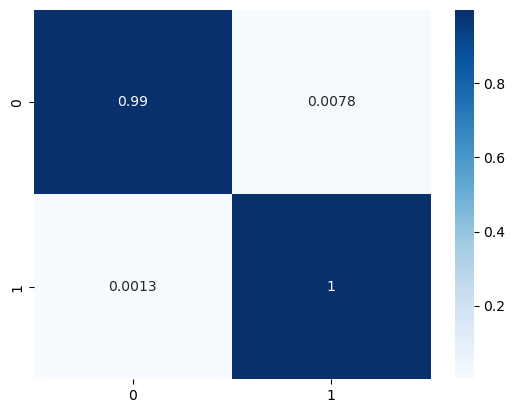

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### Random Under Sample

In [38]:
# 18 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df = dp.OverallProcessor(df).rus()
df.shape

(106502, 19)

In [39]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(85201, 18)

#### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 18)

The accuracy score is 0.9222102248720717
 The recall score is 0.8811991434689508
 The f1 score is 0.9254711464939505
 The ROC AUC score is 0.9226598245526892

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92     10743
           1       0.88      0.97      0.93     10558

    accuracy                           0.92     21301
   macro avg       0.93      0.92      0.92     21301
weighted avg       0.93      0.92      0.92     21301


Cross validation score: [0.65499784 0.68799805 0.67999872 0.64099856 0.66599866]

Mean cross validation score: 0.6659983683416255



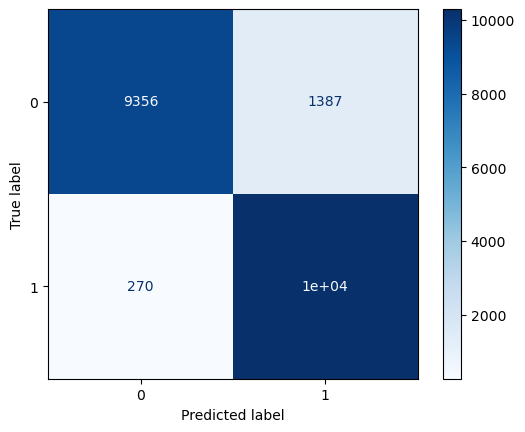

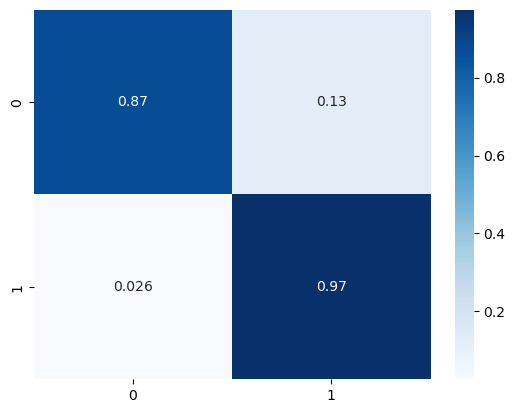

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9947420308905686
 The recall score is 0.9918079096045198
 The f1 score is 0.9947114930588347
 The ROC AUC score is 0.9947669153658156

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     10743
           1       0.99      1.00      0.99     10558

    accuracy                           0.99     21301
   macro avg       0.99      0.99      0.99     21301
weighted avg       0.99      0.99      0.99     21301


Cross validation score: [0.97799986 0.97899987 0.97999992 0.97199989 0.98599994]

Mean cross validation score: 0.9789998966494655



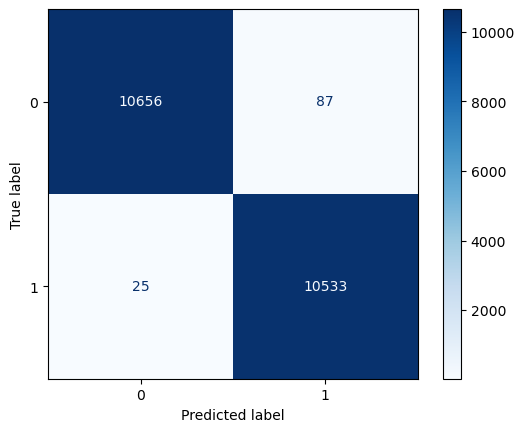

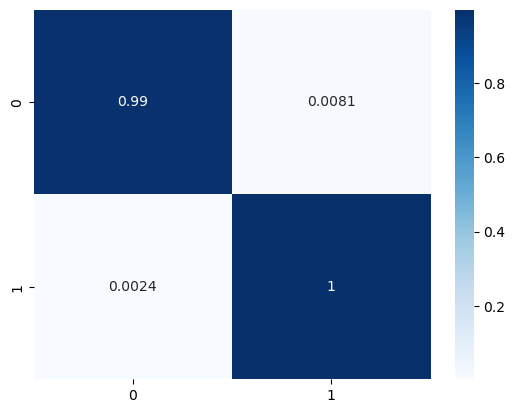

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9997183230834233
 The recall score is 0.9994320333207118
 The f1 score is 0.9997159359909099
 The ROC AUC score is 0.9997207483943032

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99899999 0.99899999 1.         1.         0.999     ]

Mean cross validation score: 0.9993999966999813



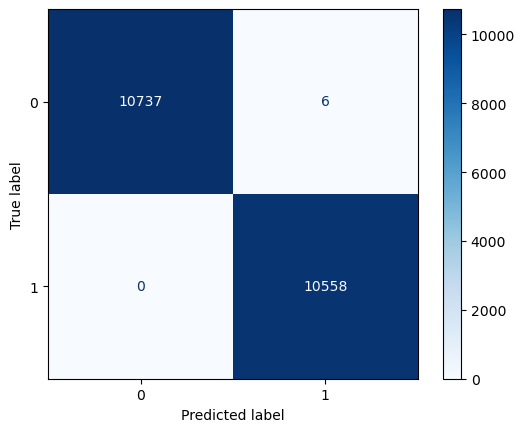

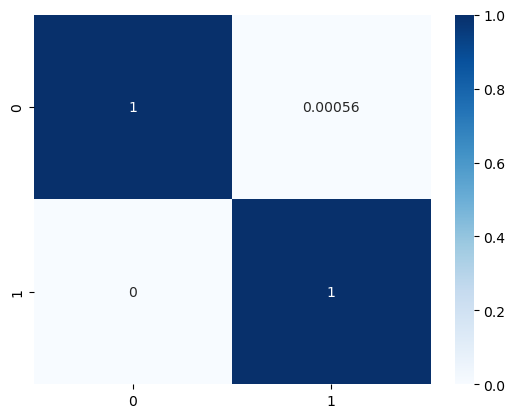

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9979813154312004
 The recall score is 0.9980107985223075
 The f1 score is 0.9979635330333886
 The ROC AUC score is 0.9979807553906695

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99299996 0.99299996 0.99299997 0.99699999 0.99399998]

Mean cross validation score: 0.9939999696998394



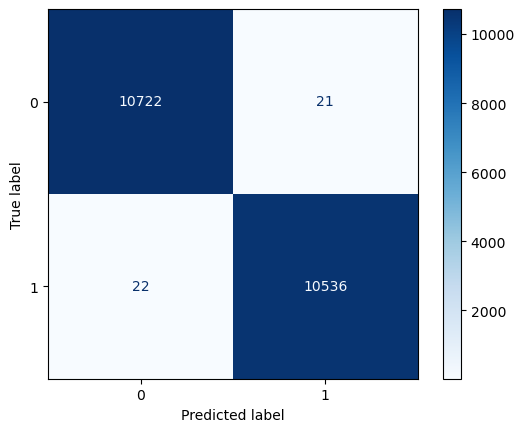

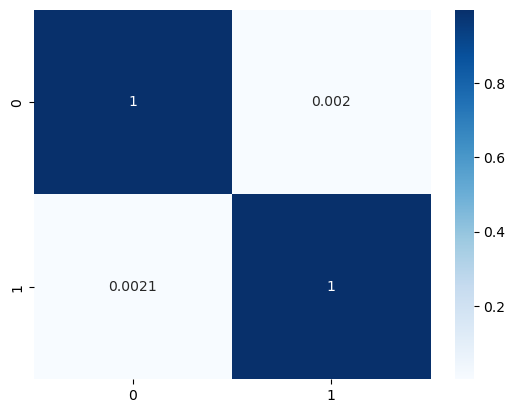

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9993897000140839
 The recall score is 0.9989590233746569
 The f1 score is 0.9993846153846154
 The ROC AUC score is 0.9993933238147629

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99899999 0.99799999 0.99699999 1.         1.        ]

Mean cross validation score: 0.998799993849967



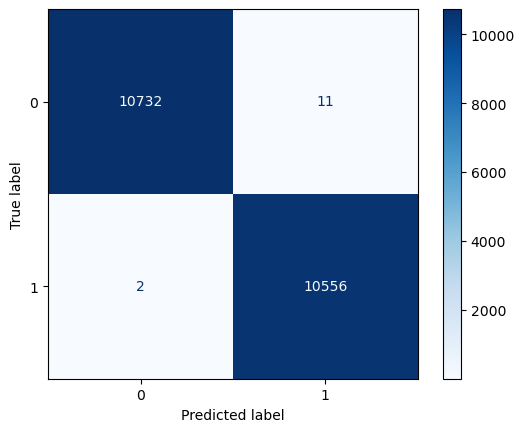

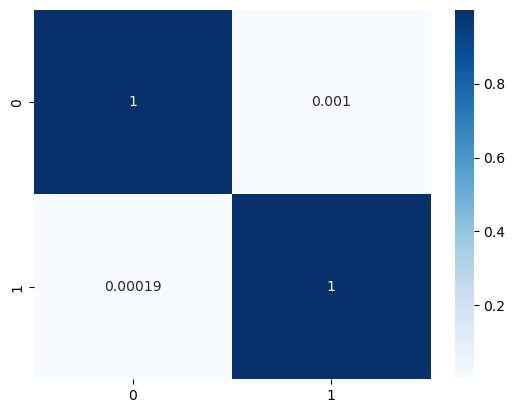

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9997183230834233
 The recall score is 0.9994320333207118
 The f1 score is 0.9997159359909099
 The ROC AUC score is 0.9997207483943032

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.99899999 1.         1.         1.         1.        ]

Mean cross validation score: 0.9997999987499921



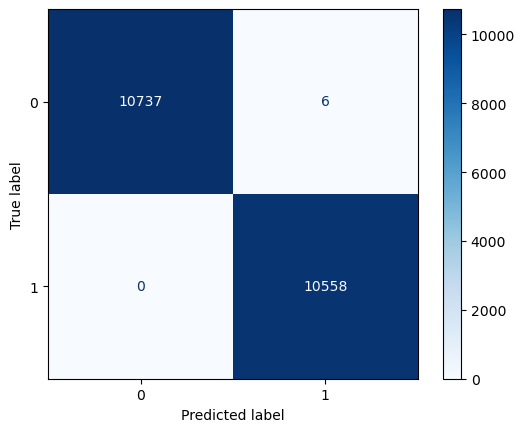

['/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_18.sav']

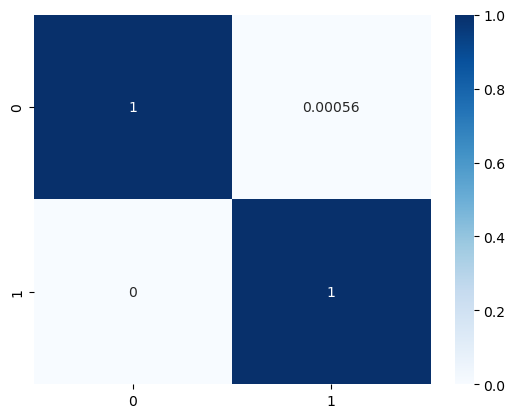

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

dump(ada, '/Volumes/Maestria/GitHub/NEO/NEO/Exports/API/best_model_18.sav' )

/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
The accuracy score is 0.9989671846392189
 The recall score is 0.9982031397768111
 The f1 score is 0.9989589248533031
 The ROC AUC score is 0.9989736308864371

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99599997 0.99499997 0.99499998 0.99699999 0.99699999]

Mean cross validation score: 0.9959999799498945



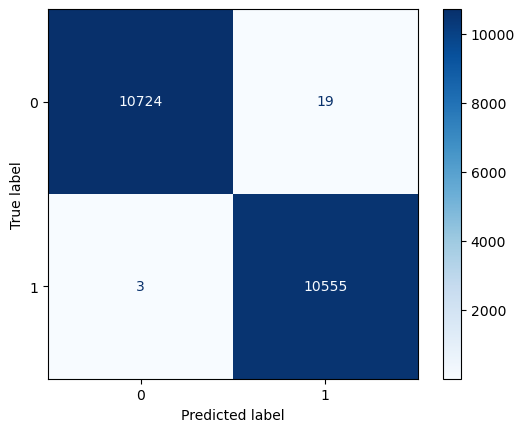

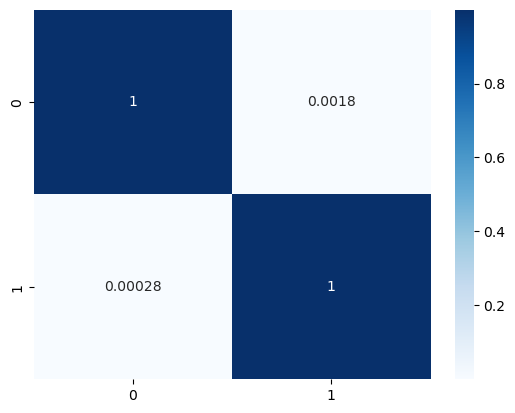

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9989671846392189
 The recall score is 0.9982031397768111
 The f1 score is 0.9989589248533031
 The ROC AUC score is 0.9989736308864371

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99199995 0.99499997 0.99599998 0.99499998 0.99799999]

Mean cross validation score: 0.9951999749498632



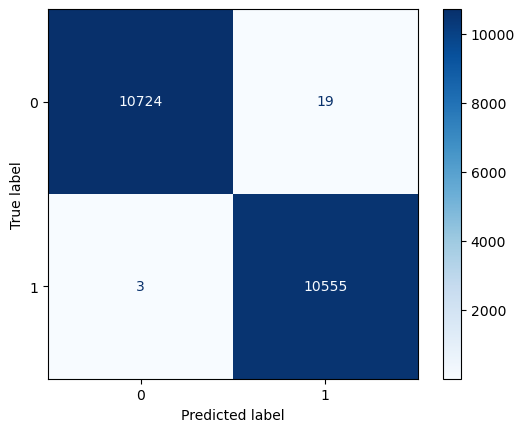

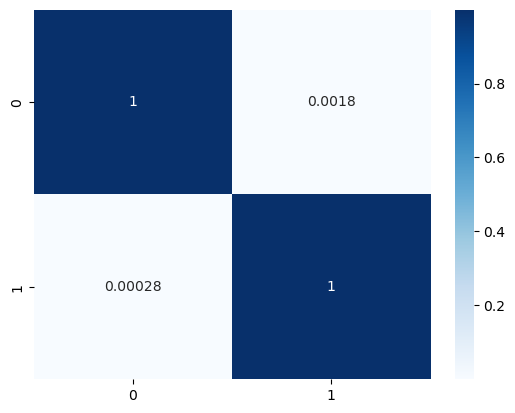

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 18)

The accuracy score is 0.8871883949110371
 The recall score is 0.8643552854972746
 The f1 score is 0.8895121614786887
 The ROC AUC score is 0.8874379969127332

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     10743
           1       0.86      0.92      0.89     10558

    accuracy                           0.89     21301
   macro avg       0.89      0.89      0.89     21301
weighted avg       0.89      0.89      0.89     21301


Cross validation score: [0.54999719 0.58999744 0.53999712 0.50499691 0.55      ]

Mean cross validation score: 0.5469977312358202



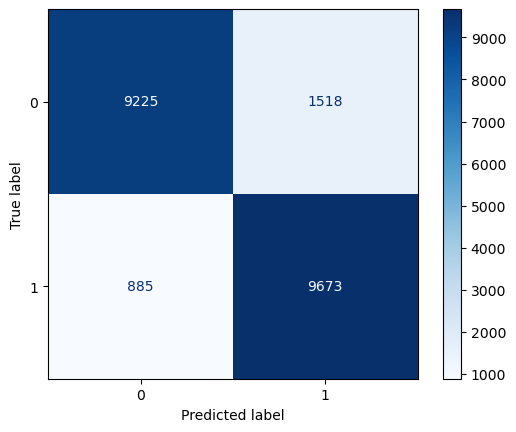

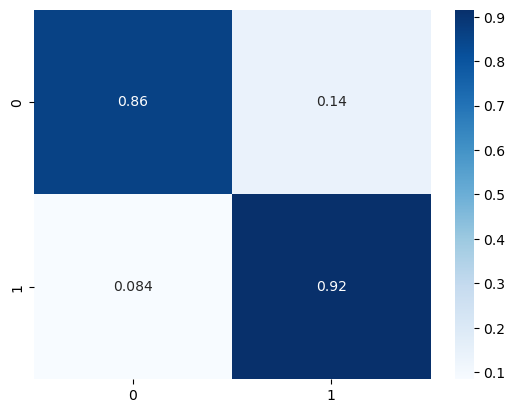

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.982629923477771
 The recall score is 0.9736842105263158
 The f1 score is 0.9826388888888888
 The ROC AUC score is 0.9827085340944662

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     10743
           1       0.97      0.99      0.98     10558

    accuracy                           0.98     21301
   macro avg       0.98      0.98      0.98     21301
weighted avg       0.98      0.98      0.98     21301


Cross validation score: [0.89499934 0.93999962 0.90499941 0.91499947 0.91      ]

Mean cross validation score: 0.9129995687473047



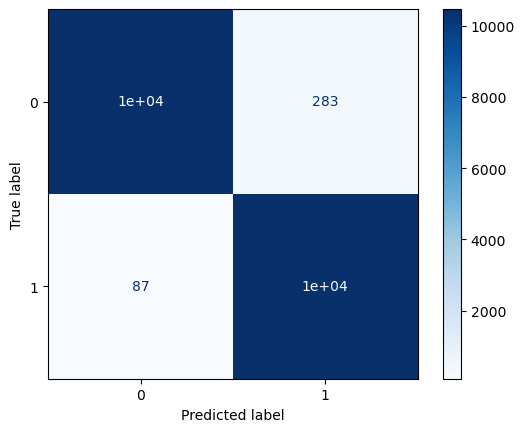

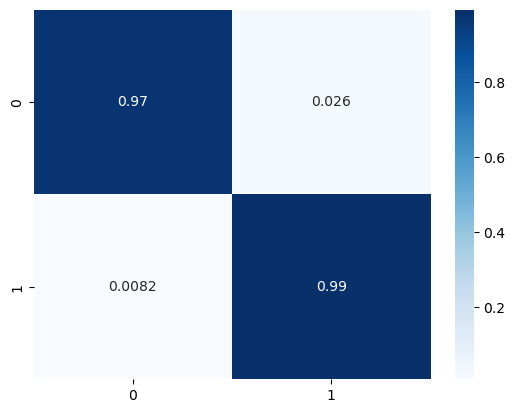

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9987794000281677
 The recall score is 0.9977315689981097
 The f1 score is 0.998769987699877
 The ROC AUC score is 0.9987882786690865

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [1.         0.98499991 0.98999994 1.         1.        ]

Mean cross validation score: 0.9949999687498046



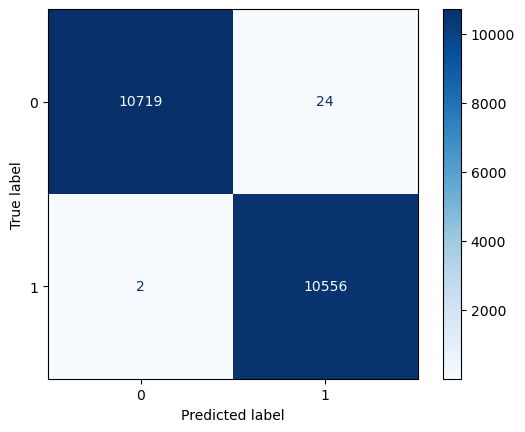

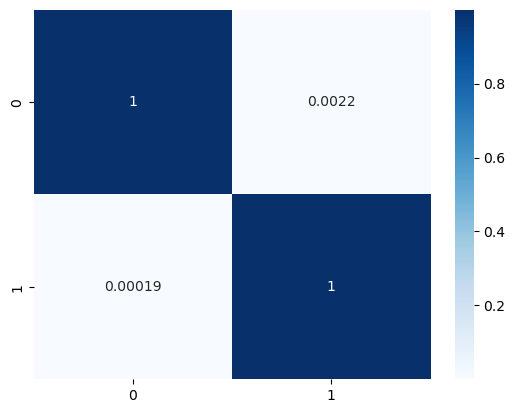

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.998075207736726
 The recall score is 0.9981999052581715
 The f1 score is 0.9980580684886089
 The ROC AUC score is 0.9980738392592351

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99499997 0.97999987 0.97499984 1.         0.995     ]

Mean cross validation score: 0.9889999374996095



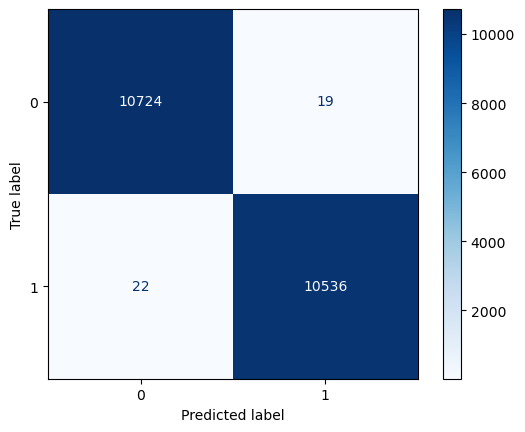

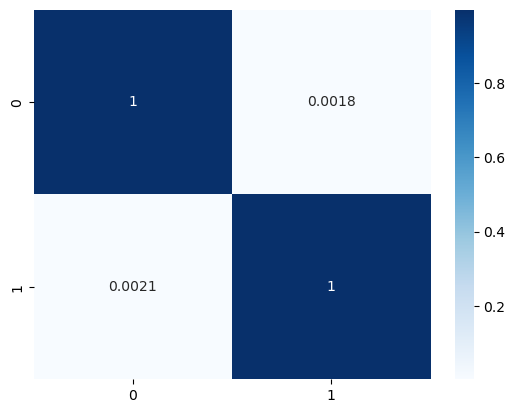

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9988732923336933
 The recall score is 0.9979202117602571
 The f1 score is 0.9988644965934897
 The ROC AUC score is 0.9988813625376521

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99499997 0.98499991 0.98999994 1.         0.99      ]

Mean cross validation score: 0.9919999624997656



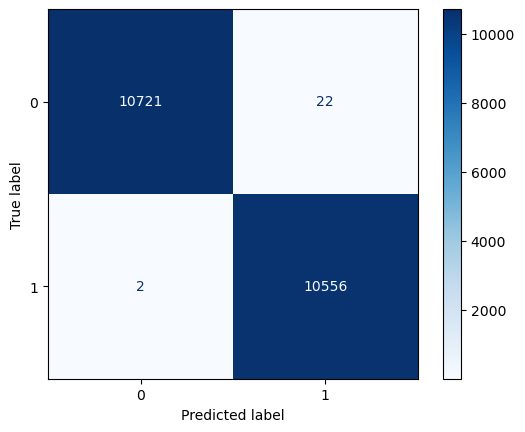

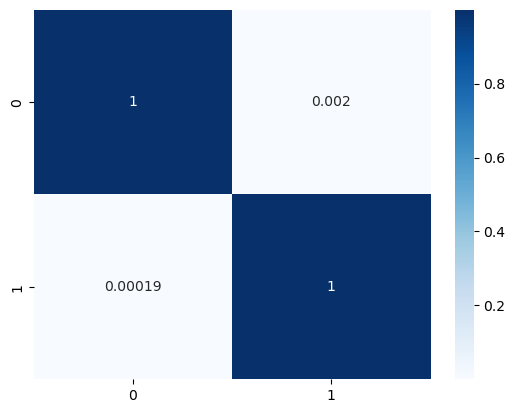

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9984507769588282
 The recall score is 0.9970718806082932
 The f1 score is 0.9984393473634429
 The ROC AUC score is 0.998462485129107

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.99499997 0.98499991 0.98999994 1.         1.        ]

Mean cross validation score: 0.9939999624997655



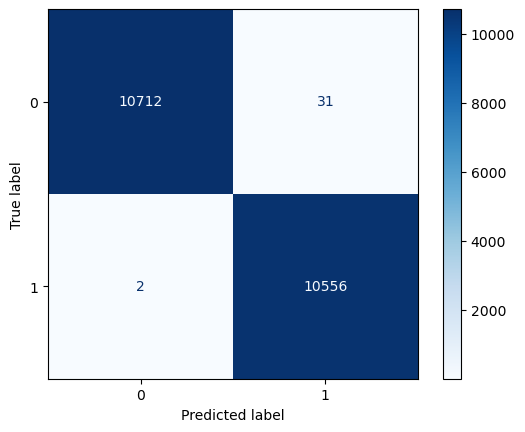

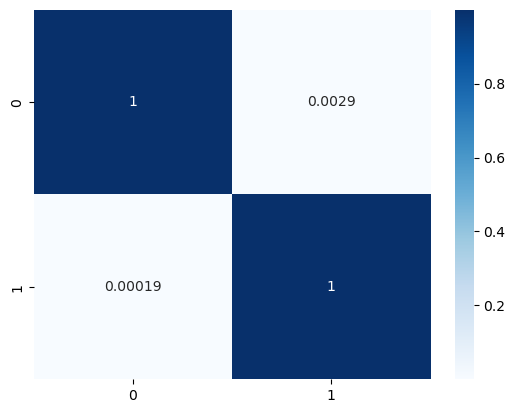

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


The accuracy score is 0.9975588000563353
 The recall score is 0.996596710153148
 The f1 score is 0.9975397426192278
 The ROC AUC score is 0.9975667711008073

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])
/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.6931 val_loss=0.0000 scale=256.0000 norm=512.0000
Cross validation score: [0.99499997 0.98499991 0.98999994 1.         0.985     ]

Mean cross validation score: 0.9909999624997656



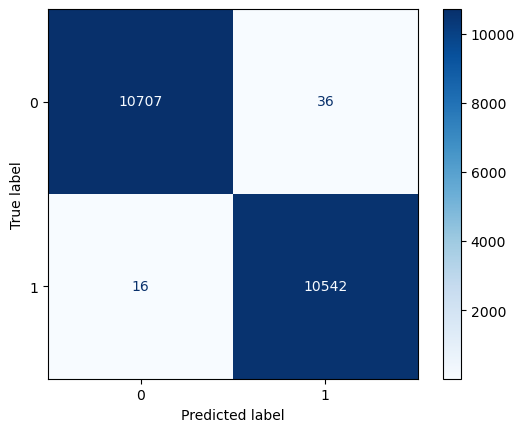

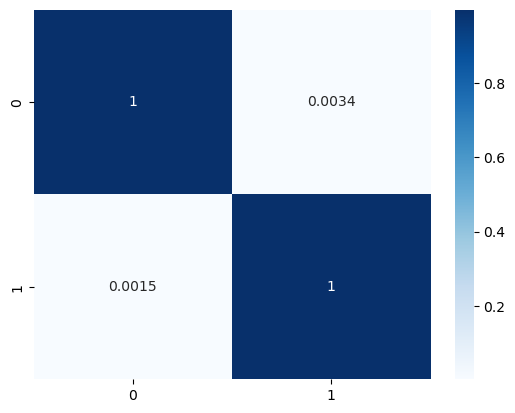

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9927702924745317
 The recall score is 0.9874437781109445
 The f1 score is 0.9927461139896373
 The ROC AUC score is 0.9928162317248409

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     10743
           1       0.99      1.00      0.99     10558

    accuracy                           0.99     21301
   macro avg       0.99      0.99      0.99     21301
weighted avg       0.99      0.99      0.99     21301


Cross validation score: [0.96999981 0.98499991 0.95499972 0.95499972 0.965     ]

Mean cross validation score: 0.9659998312489453



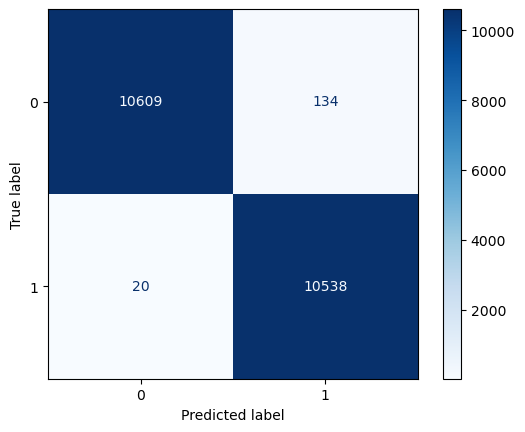

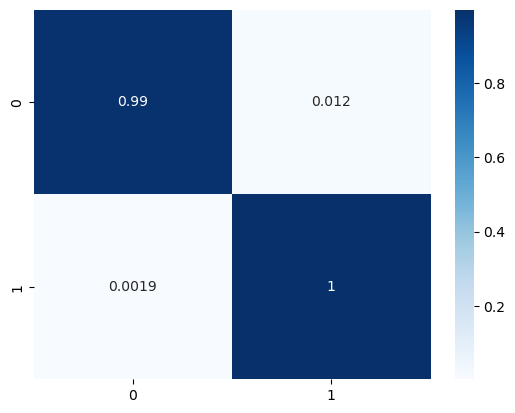

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

### Imbalanced

In [33]:
# 18 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.shape

(578127, 19)

In [34]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(462501, 18)

#### 20,000 samples

In [ ]:
X_train, y_train = spt.sample(20000)

X_train.shape

(20000, 18)

The accuracy score is 0.6688720529984605
 The recall score is 0.21714682969718035
 The f1 score is 0.35681287482990914
 The ROC AUC score is 0.8176913700169515

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    105006
           1       0.22      1.00      0.36     10620

    accuracy                           0.67    115626
   macro avg       0.61      0.82      0.57    115626
weighted avg       0.93      0.67      0.74    115626


Cross validation score: [-3.04615974 -2.95338537 -2.89001962 -2.89001962 -2.97361175]

Mean cross validation score: -2.9506392209335384



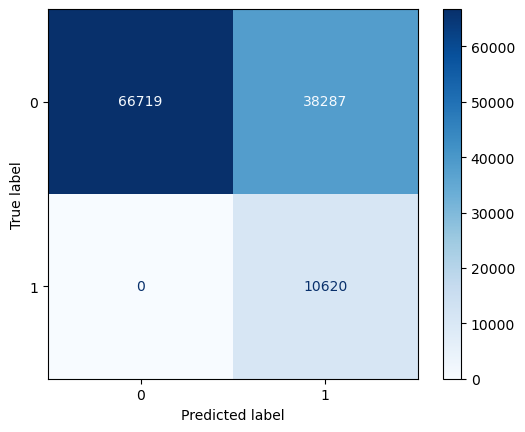

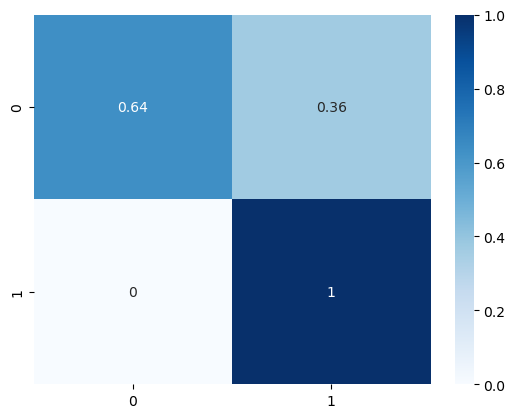

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9949232871499489
 The recall score is 0.9778984471753834
 The f1 score is 0.9722024908841218
 The ROC AUC score is 0.9821815535749315

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      0.97      0.97     10620

    accuracy                           0.99    115626
   macro avg       0.99      0.98      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.92218924 0.91321107 0.9193933  0.8925244  0.93133503]

Mean cross validation score: 0.9157306081103718



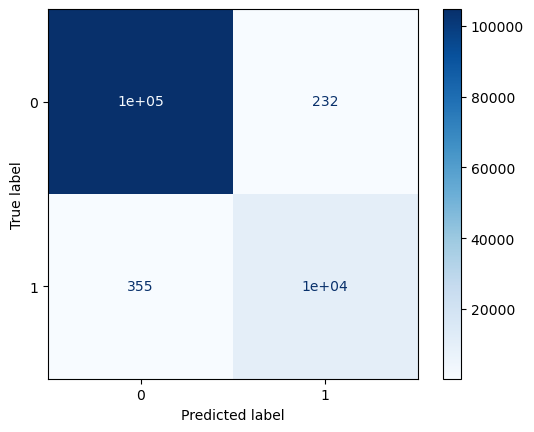

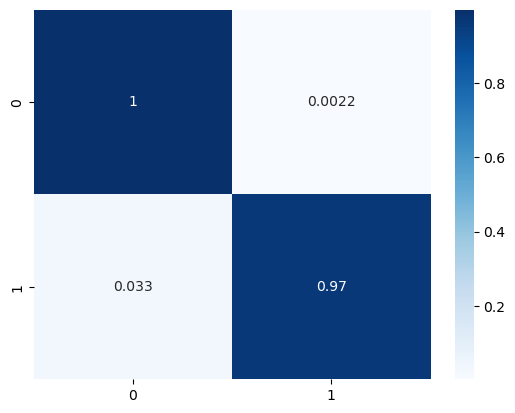

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9998443256706969
 The recall score is 0.9991525423728813
 The f1 score is 0.9991525423728813
 The ROC AUC score is 0.9995334164924232

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



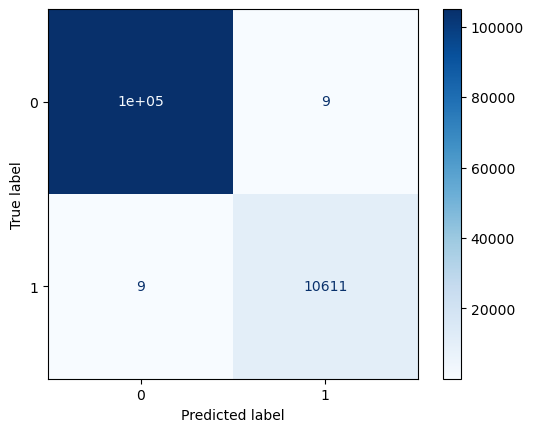

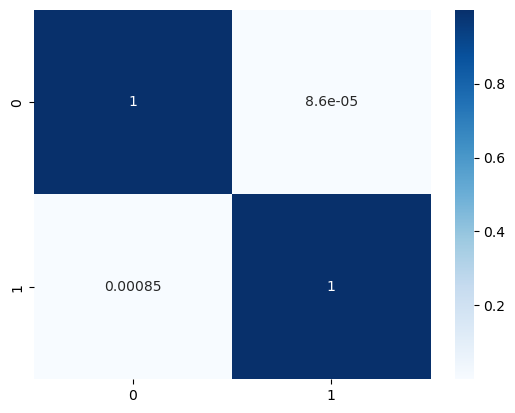

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9986767682009237
 The recall score is 0.9884274381707886
 The f1 score is 0.9928286852589642
 The ROC AUC score is 0.9980442091498458

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       0.99      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99401456 0.98503639 0.98805827 0.96716023 0.97910197]

Mean cross validation score: 0.9826742829912597



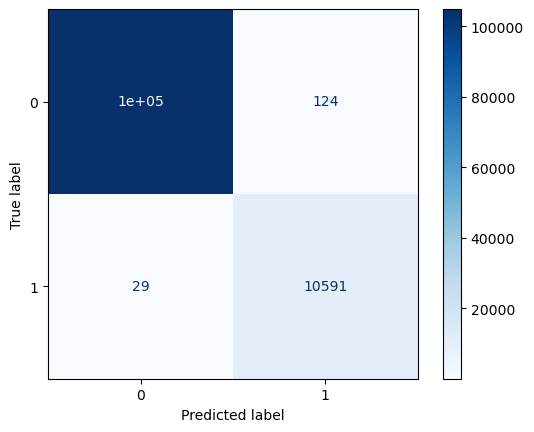

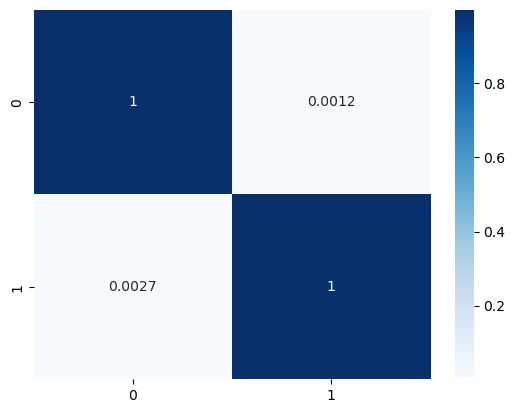

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9997578399321951
 The recall score is 0.9985878365656186
 The f1 score is 0.9986818566989926
 The ROC AUC score is 0.9993165227792742

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



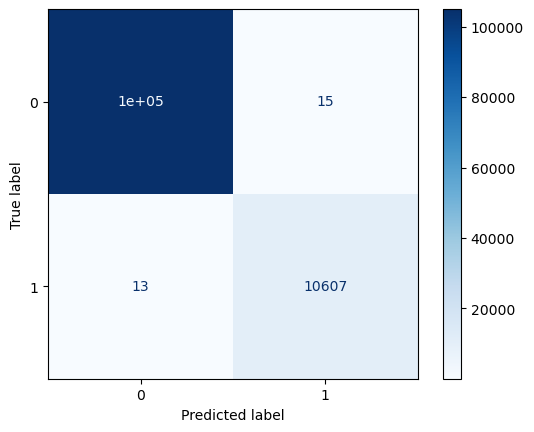

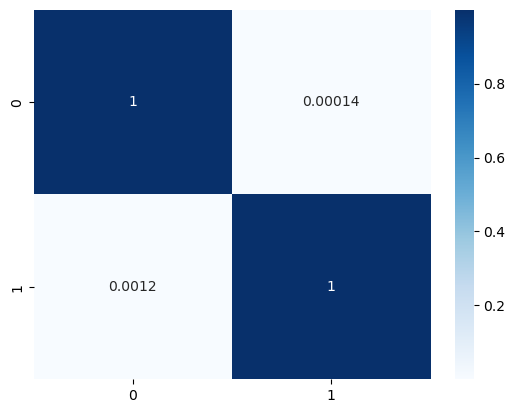

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9998875685399478
 The recall score is 0.9994349750447311
 The f1 score is 0.9993879184519046
 The ROC AUC score is 0.9996418633489977

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



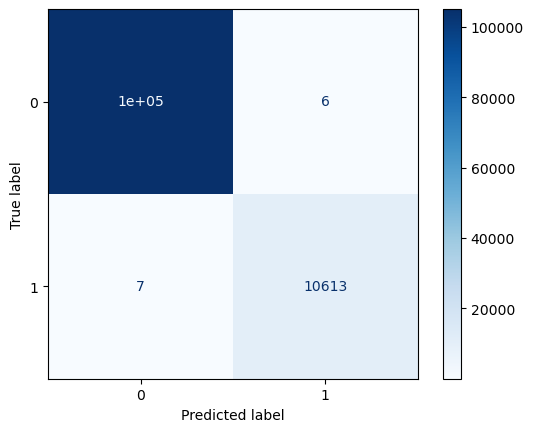

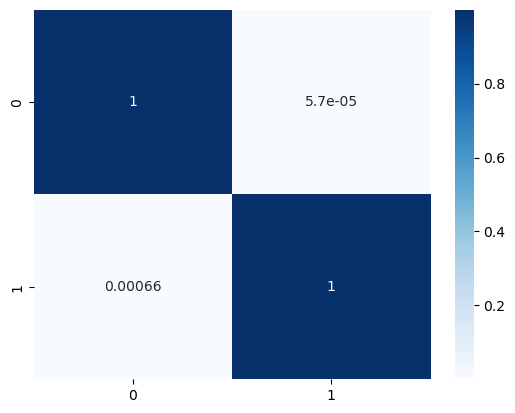

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.3075 val_loss=0.0000 scale=32.0000 norm=64.0000
The accuracy score is 0.9992648712227353
 The recall score is 0.9929808142255498
 The f1 score is 0.9960103262145036
 The ROC AUC score is 0.9991720677570106

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=32.0000 norm=64.0000
[iter 0] loss=0.3074 val_loss=0.0000 scale=16.0000 norm=32.0000
Cross validation score: [0.99700728 0.99401456 0.99402913 0.96716023 0.98507283]

Mean cross validation 

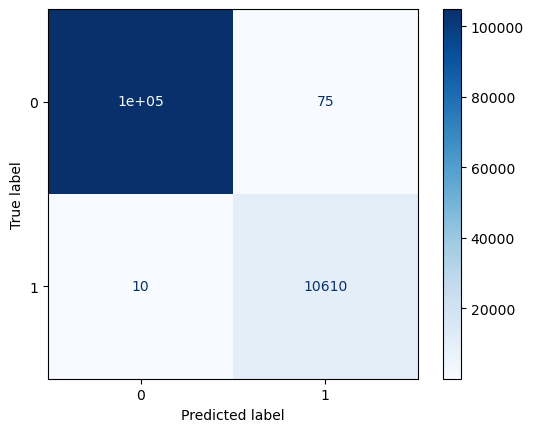

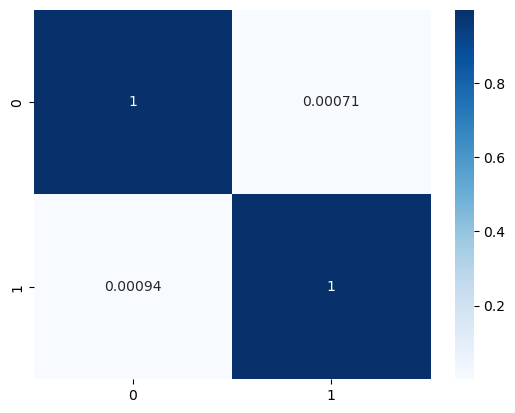

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9985643367408714
 The recall score is 0.9940453686200378
 The f1 score is 0.9921698113207548
 The ROC AUC score is 0.9948506762755877

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      0.99      0.99     10620

    accuracy                           1.00    115626
   macro avg       1.00      0.99      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.99401456 0.98204367 0.98805827 0.9641748  0.98507283]

Mean cross validation score: 0.9826728253159853



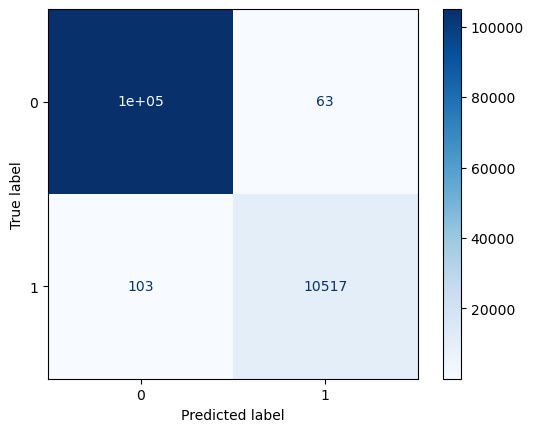

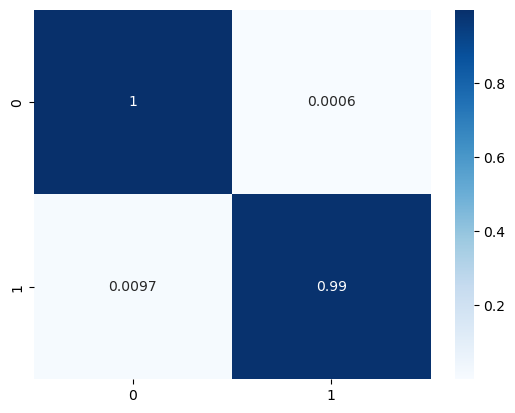

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

#### 4000 samples

In [ ]:
X_train, y_train = spt.sample(4000)

X_train.shape

(4000, 18)

The accuracy score is 0.67989898465743
 The recall score is 0.2229360880154531
 The f1 score is 0.3645790413404752
 The ROC AUC score is 0.8236778129761968

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.65      0.79    105006
           1       0.22      1.00      0.36     10620

    accuracy                           0.68    115626
   macro avg       0.61      0.82      0.58    115626
weighted avg       0.93      0.68      0.75    115626


Cross validation score: [-2.84390722 -2.81207654 -2.91631301 -2.82696746 -3.28858611]

Mean cross validation score: -2.937570067060407



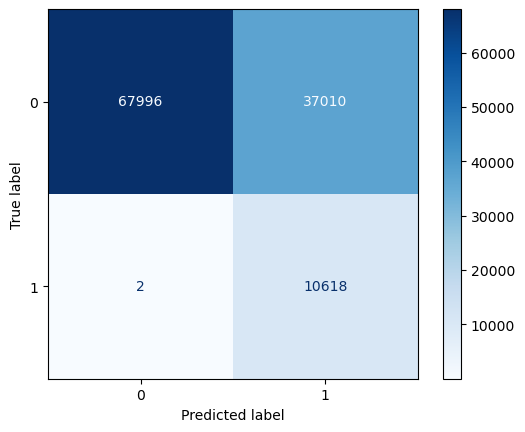

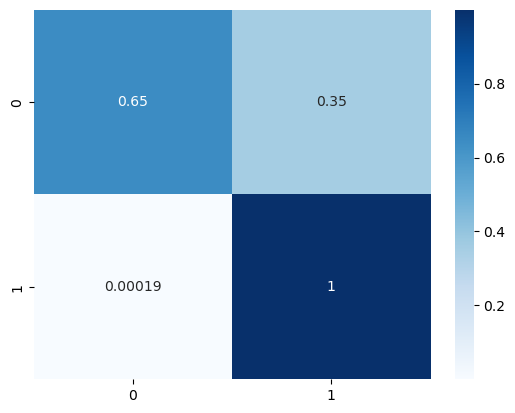

In [ ]:
log_reg = dp.LogRegression(X_train, X_test, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9770899278708941
 The recall score is 0.8763811502502598
 The f1 score is 0.8751001933141591
 The ROC AUC score is 0.9306785105957358

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    105006
           1       0.88      0.87      0.88     10620

    accuracy                           0.98    115626
   macro avg       0.93      0.93      0.93    115626
weighted avg       0.98      0.98      0.98    115626


Cross validation score: [0.65329464 0.6872906  0.67239967 0.67239967 0.52349043]

Mean cross validation score: 0.6417750033575146



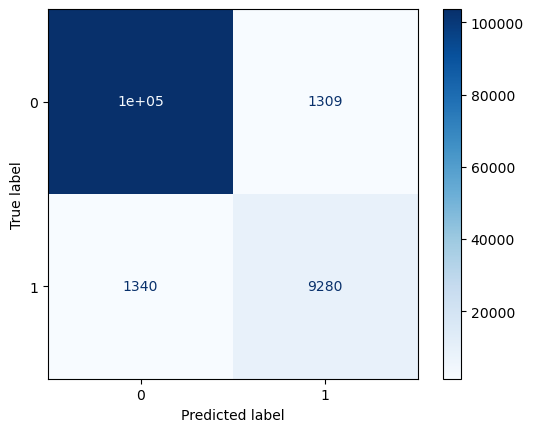

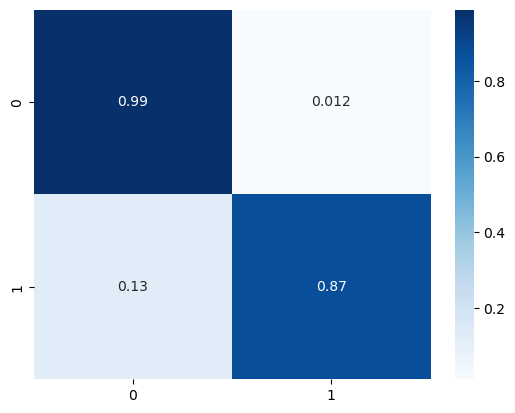

In [ ]:
svm = dp.supportvm2(X_train, X_test, y_train, y_test)

svm.fit()

The accuracy score is 0.9996713541936935
 The recall score is 0.9992451405925646
 The f1 score is 0.9982090677726458
 The ROC AUC score is 0.9985494775601199

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.95532723 0.98510908]

Mean cross validation score: 0.9880872608145335



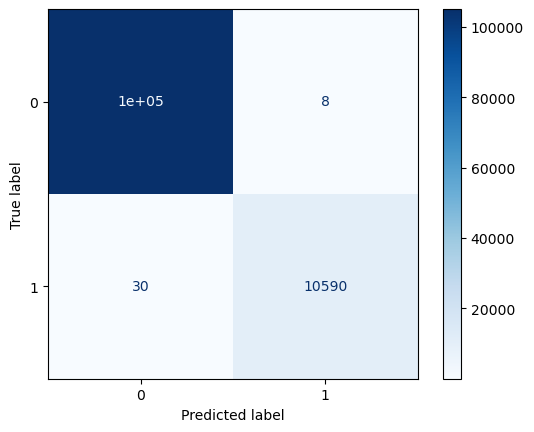

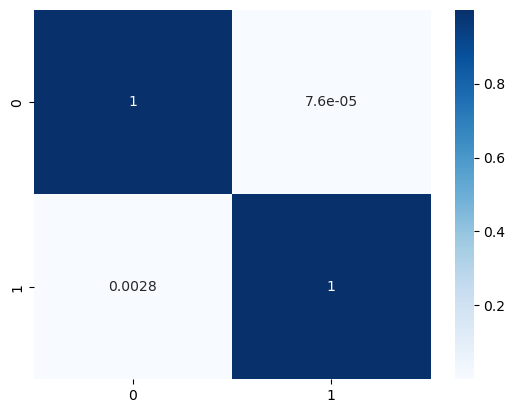

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.9989016311210281
 The recall score is 0.9908316961362148
 The f1 score is 0.9940400769627856
 The ROC AUC score is 0.9981680115992296

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      0.99     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.93970342 0.98510908 0.9404363  0.95532723 0.95532723]

Mean cross validation score: 0.9551806504756326



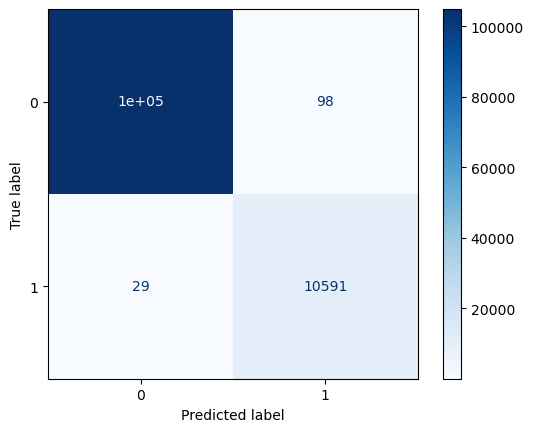

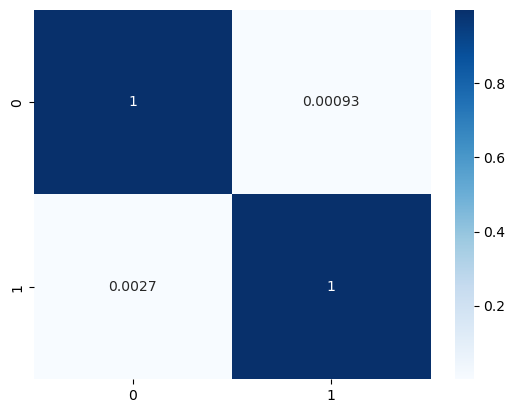

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.9996540570459931
 The recall score is 0.9981167608286252
 The f1 score is 0.9981167608286252
 The ROC AUC score is 0.9989631477609404

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         0.95532723 0.98510908 0.98510908]

Mean cross validation score: 0.985109076018167



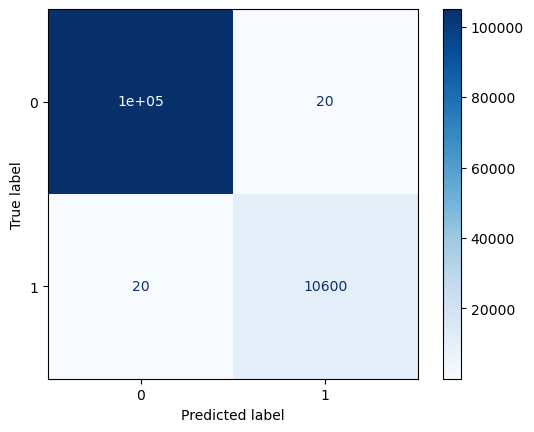

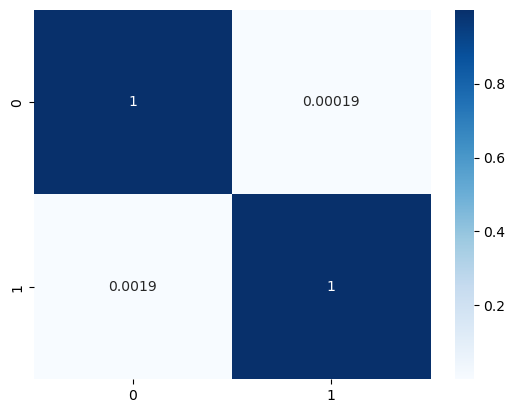

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.9996194627505924
 The recall score is 0.9988679245283019
 The f1 score is 0.9979264844486334
 The ROC AUC score is 0.998436269070877

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.98492585 1.         1.         0.97021815 0.98510908]

Mean cross validation score: 0.9880506164198165



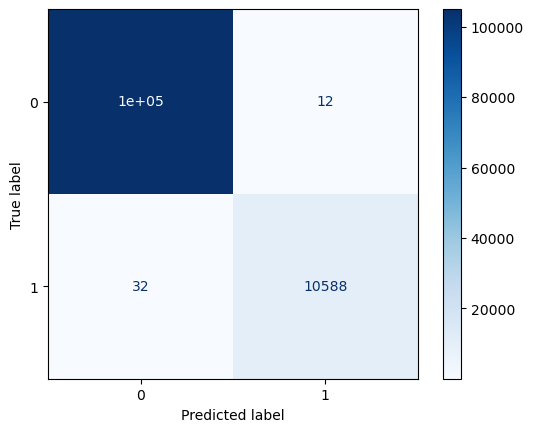

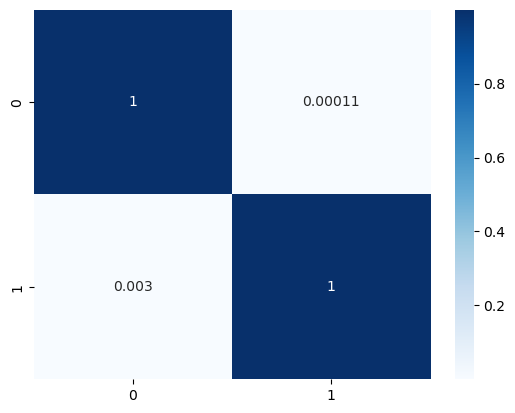

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.3077 val_loss=0.0000 scale=32.0000 norm=64.0000
The accuracy score is 0.9991264940411326
 The recall score is 0.9928778933558242
 The f1 score is 0.9952562115447842
 The ROC AUC score is 0.9984610914350764

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.99      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


[iter 0] loss=0.3083 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=32.0000 norm=64.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.3076 val_loss=0.0000 scale=64.0000 norm=128.0000
Cross validation score: [1.         0.98510908 0.95532723 0.95532723 0.97021815]

Mean cross validation score: 0.9731963368327005



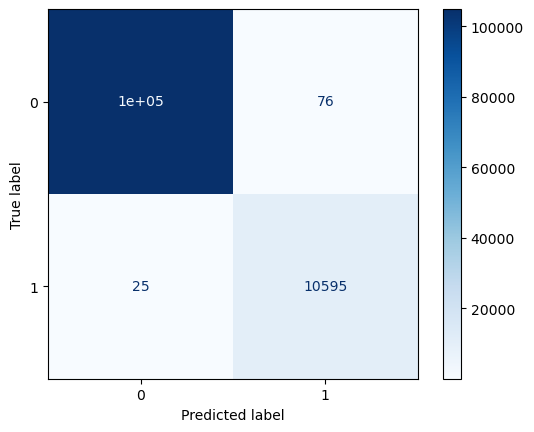

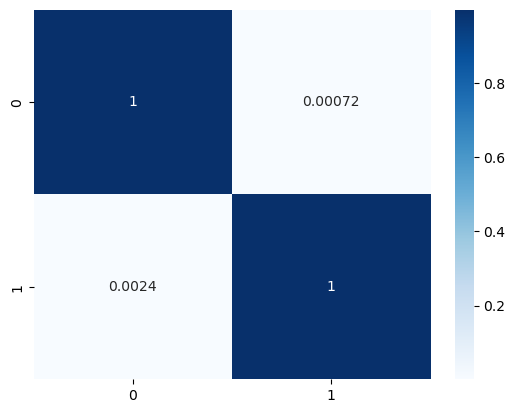

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()

The accuracy score is 0.9926746579489042
 The recall score is 0.965957852579384
 The f1 score is 0.9598711327995452
 The ROC AUC score is 0.9752304172879657

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.97      0.95      0.96     10620

    accuracy                           0.99    115626
   macro avg       0.98      0.98      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.89448098 0.88087261 0.89576353 0.82130891 0.80641799]

Mean cross validation score: 0.85976880380775



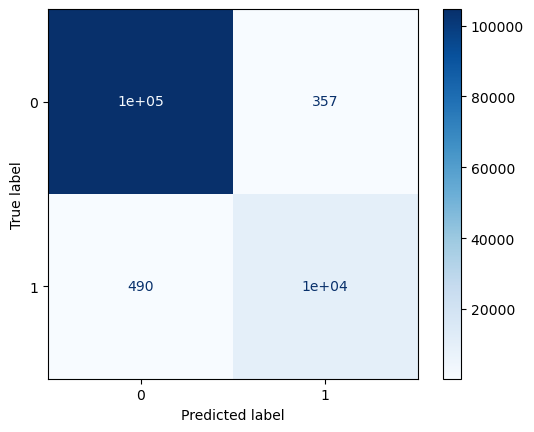

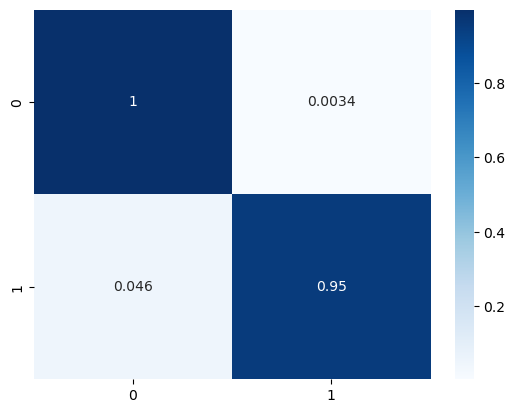

In [ ]:
mlp = dp.ANN(X_train, X_test, y_train, y_test)

mlp.fit()

## Random Forest Feature Selection

### SMOTE

#### Reduction

In [299]:
df = pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv') 
df = dp.OverallProcessor(df).clean2()
df = dp.OverallProcessor(df).smote()
df.shape

(1049752, 19)

In [300]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit2()

X_train.shape

(839801, 18)

In [301]:
df1 = df.drop(columns=['is_hazardous'])

xtpd = pd.DataFrame(X_test, columns=df1.columns)
xpd = pd.DataFrame(X_train, columns = df1.columns)
ypd = pd.DataFrame(y_train, columns = ['is_hazardous'])

zpd = pd.concat([xpd, ypd], axis = 1)
zpd

absolute_magnitude_h  relative_velocity.kilometers_per_hour  \
0                  -1.324807                               1.419934   
1                  -0.654360                               0.241261   
2                  -1.012400                              -0.005020   
3                  -0.124322                               0.137361   
4                  -0.455367                               0.787129   
...                      ...                                    ...   
839796              1.399101                              -0.823817   
839797             -0.015506                               0.328700   
839798              0.205636                               0.380503   
839799             -0.285884                              -0.430384   
839800              1.307836                              -0.994487   

        miss_distance.kilometers  estimated_diameter_min  \
0                      -0.099110               -0.961593   
1                       0.146027               -0.215514   
2                       0.023431                0.903606   
3                       0.548860                0.903606   
4                      -0.873196                0.036706   
...                          ...                     ...   
839796                 -0.889431                1.649686   
839797                 -0.675730                0.903606   
839798                 -0.698345                1.276646   
839799                 -0.624181               -0.441296   
839800                 -0.660001                0.530566   

        estimated_diameter_max  orbit_uncertainty  minimum_orbit_intersection  \
0                     1.453405          -1.523332                    1.102642   
1                    -0.463397          -1.333361                    0.545531   
2                     3.713997          -1.632228                    0.829790   
3                     0.291221          -0.005948                   -1.446792   
4                    -0.276029          -0.863401                    1.246198   
...                        ...                ...                         ...   
839796               -0.643910           0.738038                   -0.999337   
839797                1.056445           0.343789                    0.552542   
839798                0.617162           0.483684                    0.711828   
839799               -0.437858          -0.572924                    0.623229   
839800               -0.339563           0.982060                   -1.841955   

        jupiter_tisserand_invariant  eccentricity  semi_major_axis  \
0                          1.338306      2.134211         1.629591   
1                          1.309949      0.483444         1.152751   
2                          1.981525      1.133256        -0.237565   
3                         -0.224416      0.029451         0.457121   
4                          0.714784      0.041443         0.769246   
...                             ...           ...              ...   
839796                    -0.632027     -0.598487        -0.733743   
839797                    -0.490904     -0.223842         0.572750   
839798                    -0.570711      0.222725        -0.027890   
839799                     0.669675     -0.401079         0.343198   
839800                    -0.730612      0.149078         0.192962   

        inclination  ascending_node_longitude  perihelion_distance  \
0          0.331265                 -0.271922             1.332452   
1          1.306693                  1.852737             1.115430   
2          1.552924                 -0.797097             1.768696   
3          1.402942                 -1.561213            -0.503700   
4         -0.728730                  0.933009             0.885691   
...             ...                       ...                  ...   
839796     0.106952                  0.792692            -0.679877   
839797    -0.990866                  1.582237            -0.

In [302]:
rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rnd_clf.fit(xpd, ypd)

pred = rnd_clf.predict(X_test)
print(f'F1 score: {f1_score(pred, y_test, average="weighted")}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 score: 0.9999857109515524


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [303]:
rnd_clf.feature_importances_

array([0.10803846, 0.0027908 , 0.00079022, 0.05153826, 0.33890155,
       0.00353676, 0.00596942, 0.00503344, 0.00433103, 0.00144207,
       0.03007367, 0.00610733, 0.00668739, 0.0008644 , 0.00064748,
       0.10981544, 0.16367963, 0.15975267])

In [304]:
feature_importances = {name: score for name, score in zip(list(df1), rnd_clf.feature_importances_)}

feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

feature_importances_sorted.head(10)

estimated_diameter_max        0.338902
mean_anomaly                  0.163680
estimated_diameter_average    0.159753
perihelion_time               0.109815
absolute_magnitude_h          0.108038
estimated_diameter_min        0.051538
inclination                   0.030074
perihelion_distance           0.006687
ascending_node_longitude      0.006107
minimum_orbit_intersection    0.005969
dtype: float64

In [ ]:
columns = list(feature_importances_sorted.head(15).index)
columns

['estimated_diameter_max',
 'mean_anomaly',
 'estimated_diameter_average',
 'perihelion_time',
 'absolute_magnitude_h',
 'estimated_diameter_min',
 'inclination',
 'perihelion_distance',
 'ascending_node_longitude',
 'minimum_orbit_intersection']

In [306]:
X_train_reduced = xpd[columns].copy()
X_test_reduced = xtpd[columns].copy()

The accuracy score is 0.9362898962138785
 The recall score is 0.8870069860363747
 The f1 score is 0.9401205110528154
 The ROC AUC score is 0.9362732019666883

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    104948
           1       0.89      1.00      0.94    105003

    accuracy                           0.94    209951
   macro avg       0.94      0.94      0.94    209951
weighted avg       0.94      0.94      0.94    209951


Cross validation score: [0.74627443 0.74598714 0.74682067 0.74939271 0.74746368]

Mean cross validation score: 0.7471877266115526



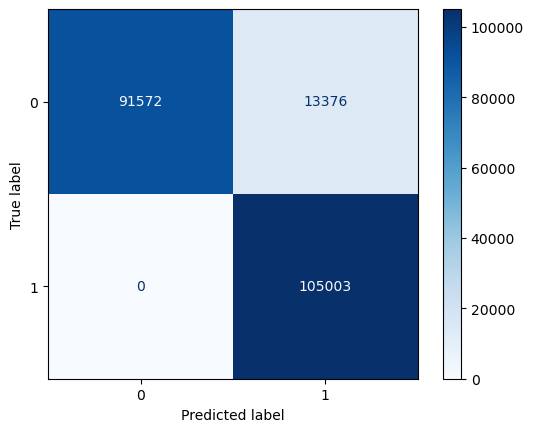

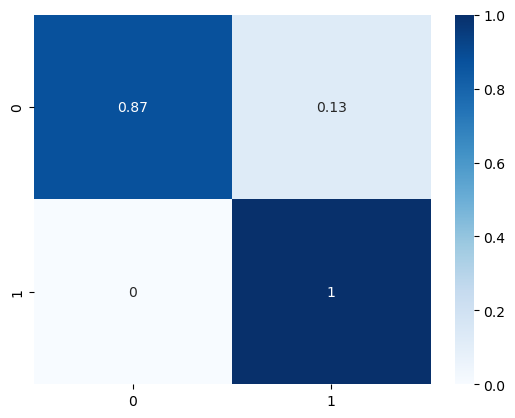

In [307]:
log_reg = dp.LogRegression(X_train_reduced, X_test_reduced, y_train, y_test)

log_reg.fit()

The accuracy score is 0.9999666588870737
 The recall score is 0.9999619062130967
 The f1 score is 0.9999666677777408
 The ROC AUC score is 0.9999666576370377

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99992855 0.99988092 0.99985711 1.         0.99992855]

Mean cross validation score: 0.9999190284247756



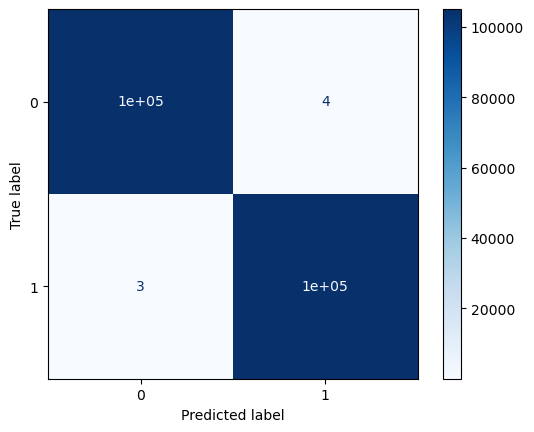

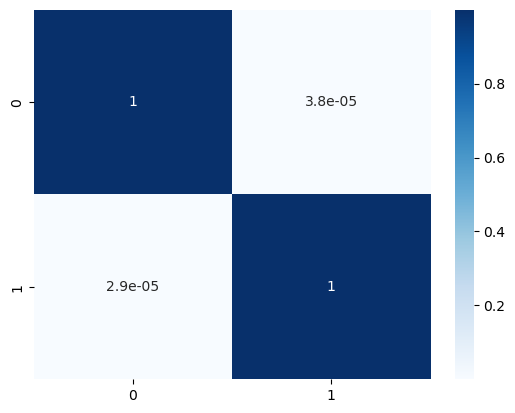

In [308]:
svm = dp.supportvm2(X_train_reduced, X_test_reduced, y_train, y_test)

svm.fit()

The accuracy score is 0.6967673409509838
 The recall score is 1.0
 The f1 score is 0.5649642617977068
 The ROC AUC score is 0.6968467567593307

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      1.00      0.77    104948
           1       1.00      0.39      0.56    105003

    accuracy                           0.70    209951
   macro avg       0.81      0.70      0.67    209951
weighted avg       0.81      0.70      0.67    209951


Cross validation score: [1.         1.         1.         0.95532723 0.98510908]

Mean cross validation score: 0.9880872608145335



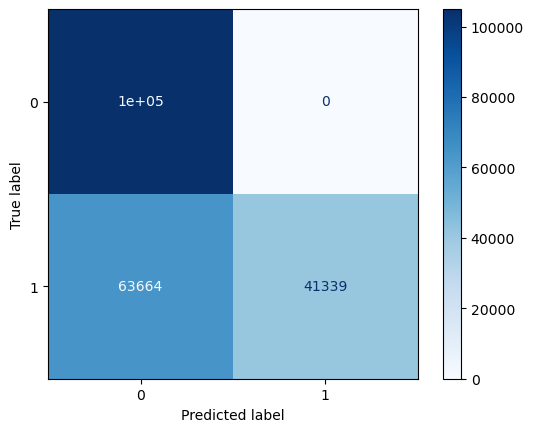

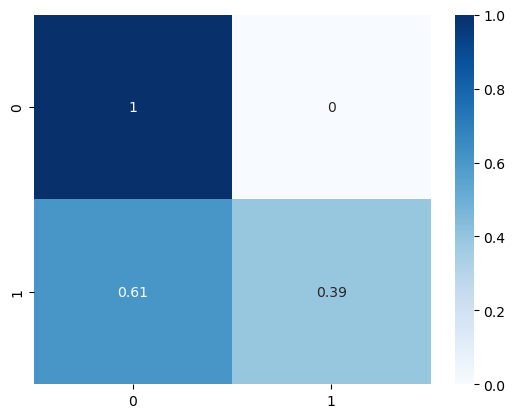

In [ ]:
random_forest = dp.RandomForest(X_train, X_test, y_train, y_test)

random_forest.fit()

The accuracy score is 0.7004253373406176
 The recall score is 1.0
 The f1 score is 0.5724559853171096
 The ROC AUC score is 0.700503795129663

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77    104948
           1       1.00      0.40      0.57    105003

    accuracy                           0.70    209951
   macro avg       0.81      0.70      0.67    209951
weighted avg       0.81      0.70      0.67    209951


Cross validation score: [0.93970342 0.98510908 0.9404363  0.95532723 0.95532723]

Mean cross validation score: 0.9551806504756326



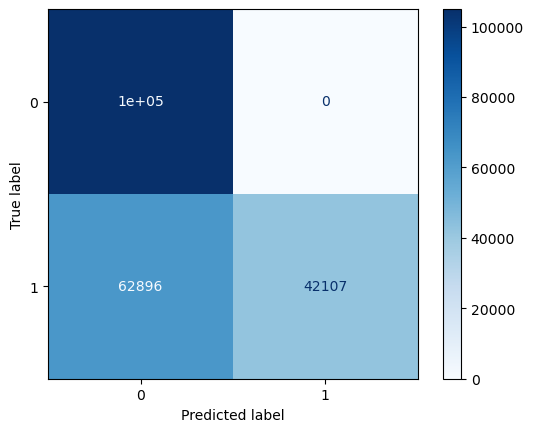

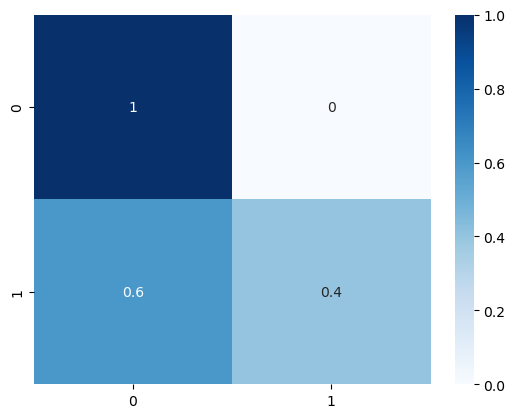

In [ ]:
xgboost = dp.xgbClassifier(X_train, X_test, y_train, y_test)

xgboost.fit()

The accuracy score is 0.6959719172568838
 The recall score is 1.0
 The f1 score is 0.5633247819394561
 The ROC AUC score is 0.6960515413845318

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      1.00      0.77    104948
           1       1.00      0.39      0.56    105003

    accuracy                           0.70    209951
   macro avg       0.81      0.70      0.67    209951
weighted avg       0.81      0.70      0.67    209951


Cross validation score: [1.         1.         0.95532723 0.98510908 0.98510908]

Mean cross validation score: 0.985109076018167



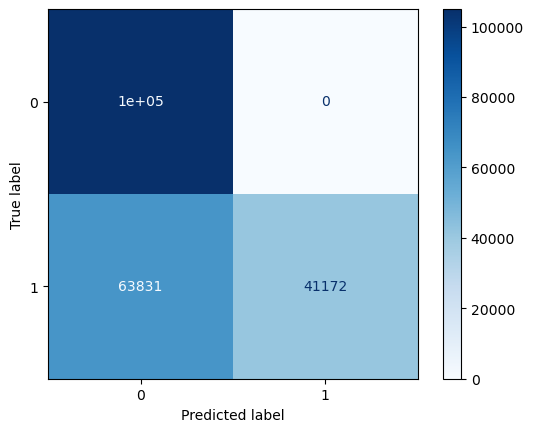

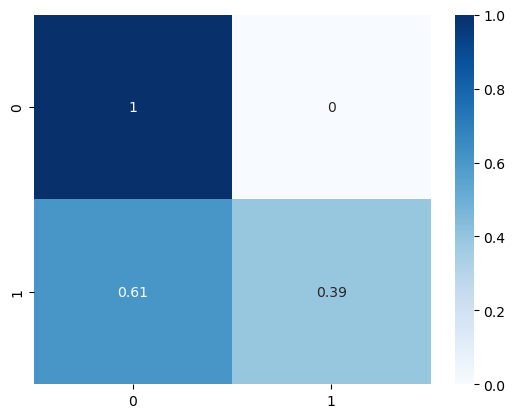

In [ ]:
gb = dp.GradientBoost(X_train, X_test, y_train, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.6962005420312358
 The recall score is 1.0
 The f1 score is 0.5637963931802794
 The ROC AUC score is 0.6962801062826777

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      1.00      0.77    104948
           1       1.00      0.39      0.56    105003

    accuracy                           0.70    209951
   macro avg       0.81      0.70      0.67    209951
weighted avg       0.81      0.70      0.67    209951




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.98492585 1.         1.         0.97021815 0.98510908]

Mean cross validation score: 0.9880506164198165



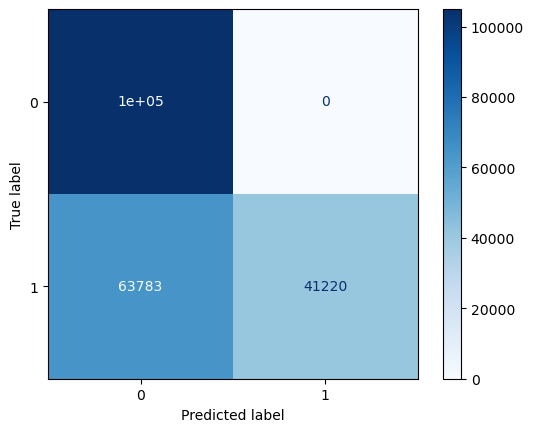

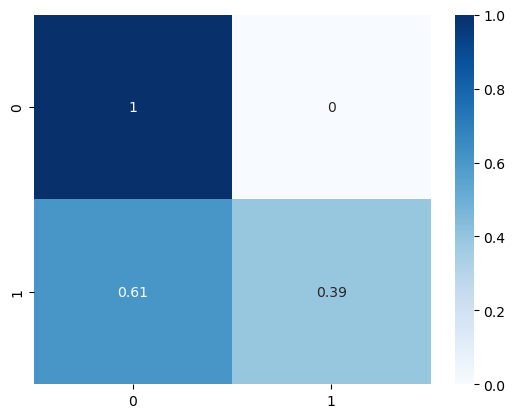

In [ ]:
ada = dp.AdaBoost(X_train, X_test, y_train, y_test)

ada.fit()

[iter 0] loss=0.3077 val_loss=0.0000 scale=32.0000 norm=64.0000
The accuracy score is 0.6802825421169701
 The recall score is 0.9997361338329199
 The f1 score is 0.5302692073533425
 The ROC AUC score is 0.680366250294322

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      1.00      0.76    104948
           1       1.00      0.36      0.53    105003

    accuracy                           0.68    209951
   macro avg       0.80      0.68      0.64    209951
weighted avg       0.80      0.68      0.64    209951


[iter 0] loss=0.3083 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=16.0000 norm=32.0000
[iter 0] loss=0.3076 val_loss=0.0000 scale=32.0000 norm=64.0000


/opt/anaconda3/lib/python3.12/site-packages/ngboost/distns/categorical.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.probs[Y, range(len(Y))])


[iter 0] loss=0.3076 val_loss=0.0000 scale=64.0000 norm=128.0000
Cross validation score: [1.         0.98510908 0.95532723 0.95532723 0.97021815]

Mean cross validation score: 0.9731963368327005



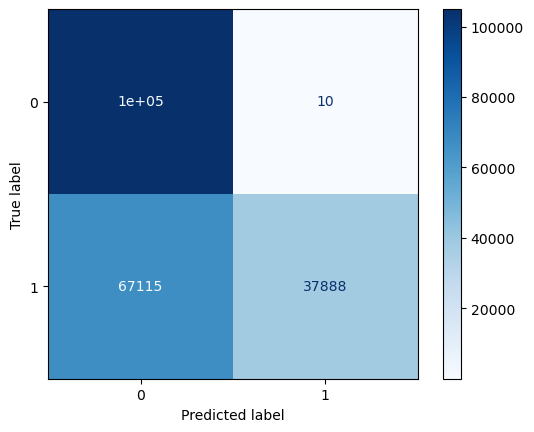

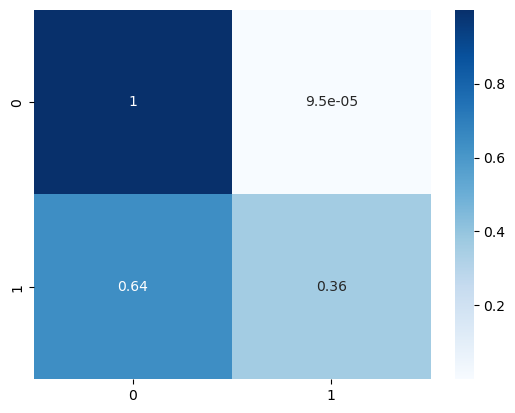

In [ ]:
ngb = dp.ngboost(X_train, X_test, y_train, y_test)

ngb.fit()